In [518]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [519]:
# Load .env enviroment variables
load_dotenv('api_keys.env')

True

In [520]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [521]:
# Import alpaca-py as alpaca
from alpaca.data.historical import CryptoHistoricalDataClient
from alpaca.data.requests import CryptoLatestQuoteRequest, CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime

In [522]:
# Declaring variable for client
client = CryptoHistoricalDataClient()

In [523]:
# Setting up params for request
request_params = CryptoLatestQuoteRequest(symbol_or_symbols="BTC/USD")

In [524]:
# Grabbing latest price with client
latest_quote = client.get_crypto_latest_quote(request_params)

In [525]:
# must use symbol to access even though it is single symbol
latest_quote["BTC/USD"].ask_price

27106.05

In [526]:
# Updating params for historical price data
request_params = CryptoBarsRequest(
                        symbol_or_symbols=["BTC/USD"],
                        timeframe=TimeFrame.Day,
                        start=datetime.strptime("2020-04-01", '%Y-%m-%d')
                        )

In [527]:
# Grabbing historical data
bars = client.get_crypto_bars(request_params)

In [528]:
# convert to dataframe
bars.df

open      high       low     close  \
symbol  timestamp                                                           
BTC/USD 2020-04-08 05:00:00+00:00   7314.00   7314.00   7314.00   7314.00   
        2020-04-14 05:00:00+00:00   7101.50   7101.50   7100.00   7100.00   
        2020-04-22 05:00:00+00:00   7118.50   7118.50   7118.50   7118.50   
        2020-04-28 05:00:00+00:00   7748.50   7836.00   7748.50   7836.00   
        2020-04-30 05:00:00+00:00   8829.00   8829.00   8653.00   8653.00   
...                                     ...       ...       ...       ...   
        2023-05-29 05:00:00+00:00  27961.07  28069.96  27536.59  27797.49   
        2023-05-30 05:00:00+00:00  27804.38  28071.05  27267.00  27278.28   
        2023-05-31 05:00:00+00:00  27275.00  27350.00  26645.16  26834.79   
        2023-06-01 05:00:00+00:00  26832.73  27170.62  26530.25  27075.75   
        2023-06-02 05:00:00+00:00  27075.71  27232.44  26864.00  27094.12   

                                       volume  trade_count          vwap  
symbol  timestamp                                                         
BTC/USD 2020-04-08 05:00:00+00:00     0.00010          1.0   7314.000000  
        2020-04-14 05:00:00+00:00     0.00020          2.0   7100.750000  
        2020-04-22 05:00:00+00:00     0.00010          1.0   7118.500000  
        2020-04-28 05:00:00+00:00     0.08400          2.0   7835.687500  
        2020-04-30 05:00:00+00:00     0.01340          3.0   8715.805970  
...                                       ...          ...           ...  
        2023-05-29 05:00:00+00:00  1528.69400      49362.0  27782.634766  
        2023-05-30 05:00:00+00:00  1920.65253      64873.0  27754.029141  
        2023-05-31 05:00:00+00:00  2411.83242     106121.0  27055.268134  
        2023-06-01 05:00:00+00:00  2346.80801      87236.0  26885.456521  
        2023-06-02 05:00:00+00:00   994.00593      41368.0  27058.288875  

[1121 rows x 7 columns]

In [529]:
# Setting as dataframe variable
btc_df = bars.df
btc_df

open      high       low     close  \
symbol  timestamp                                                           
BTC/USD 2020-04-08 05:00:00+00:00   7314.00   7314.00   7314.00   7314.00   
        2020-04-14 05:00:00+00:00   7101.50   7101.50   7100.00   7100.00   
        2020-04-22 05:00:00+00:00   7118.50   7118.50   7118.50   7118.50   
        2020-04-28 05:00:00+00:00   7748.50   7836.00   7748.50   7836.00   
        2020-04-30 05:00:00+00:00   8829.00   8829.00   8653.00   8653.00   
...                                     ...       ...       ...       ...   
        2023-05-29 05:00:00+00:00  27961.07  28069.96  27536.59  27797.49   
        2023-05-30 05:00:00+00:00  27804.38  28071.05  27267.00  27278.28   
        2023-05-31 05:00:00+00:00  27275.00  27350.00  26645.16  26834.79   
        2023-06-01 05:00:00+00:00  26832.73  27170.62  26530.25  27075.75   
        2023-06-02 05:00:00+00:00  27075.71  27232.44  26864.00  27094.12   

                                       volume  trade_count          vwap  
symbol  timestamp                                                         
BTC/USD 2020-04-08 05:00:00+00:00     0.00010          1.0   7314.000000  
        2020-04-14 05:00:00+00:00     0.00020          2.0   7100.750000  
        2020-04-22 05:00:00+00:00     0.00010          1.0   7118.500000  
        2020-04-28 05:00:00+00:00     0.08400          2.0   7835.687500  
        2020-04-30 05:00:00+00:00     0.01340          3.0   8715.805970  
...                                       ...          ...           ...  
        2023-05-29 05:00:00+00:00  1528.69400      49362.0  27782.634766  
        2023-05-30 05:00:00+00:00  1920.65253      64873.0  27754.029141  
        2023-05-31 05:00:00+00:00  2411.83242     106121.0  27055.268134  
        2023-06-01 05:00:00+00:00  2346.80801      87236.0  26885.456521  
        2023-06-02 05:00:00+00:00   994.00593      41368.0  27058.288875  

[1121 rows x 7 columns]

In [530]:
# Checking info
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1121 entries, ('BTC/USD', Timestamp('2020-04-08 05:00:00+0000', tz='UTC')) to ('BTC/USD', Timestamp('2023-06-02 05:00:00+0000', tz='UTC'))
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         1121 non-null   float64
 1   high         1121 non-null   float64
 2   low          1121 non-null   float64
 3   close        1121 non-null   float64
 4   volume       1121 non-null   float64
 5   trade_count  1121 non-null   float64
 6   vwap         1121 non-null   float64
dtypes: float64(7)
memory usage: 105.9+ KB


In [531]:
# Reset index to access symbol and timestamp as columns
btc_df = btc_df.reset_index()
btc_df.head()

symbol                 timestamp    open    high     low   close  volume  \
0  BTC/USD 2020-04-08 05:00:00+00:00  7314.0  7314.0  7314.0  7314.0  0.0001   
1  BTC/USD 2020-04-14 05:00:00+00:00  7101.5  7101.5  7100.0  7100.0  0.0002   
2  BTC/USD 2020-04-22 05:00:00+00:00  7118.5  7118.5  7118.5  7118.5  0.0001   
3  BTC/USD 2020-04-28 05:00:00+00:00  7748.5  7836.0  7748.5  7836.0  0.0840   
4  BTC/USD 2020-04-30 05:00:00+00:00  8829.0  8829.0  8653.0  8653.0  0.0134   

   trade_count        vwap  
0          1.0  7314.00000  
1          2.0  7100.75000  
2          1.0  7118.50000  
3          2.0  7835.68750  
4          3.0  8715.80597

In [532]:
# Revising time out of timestamp column
import datetime as dt
btc_df['timestamp'] = btc_df['timestamp'].dt.date
btc_df.head()

symbol   timestamp    open    high     low   close  volume  trade_count  \
0  BTC/USD  2020-04-08  7314.0  7314.0  7314.0  7314.0  0.0001          1.0   
1  BTC/USD  2020-04-14  7101.5  7101.5  7100.0  7100.0  0.0002          2.0   
2  BTC/USD  2020-04-22  7118.5  7118.5  7118.5  7118.5  0.0001          1.0   
3  BTC/USD  2020-04-28  7748.5  7836.0  7748.5  7836.0  0.0840          2.0   
4  BTC/USD  2020-04-30  8829.0  8829.0  8653.0  8653.0  0.0134          3.0   

         vwap  
0  7314.00000  
1  7100.75000  
2  7118.50000  
3  7835.68750  
4  8715.80597

In [533]:
# Setting up pivot to get subset of closing prices
btc_pivot = btc_df.pivot_table(values='close', index='timestamp', columns='symbol')
btc_pivot.head()

symbol      BTC/USD
timestamp          
2020-04-08   7314.0
2020-04-14   7100.0
2020-04-22   7118.5
2020-04-28   7836.0
2020-04-30   8653.0

In [534]:
# Checking for nulls
btc_pivot.isnull().sum()

symbol
BTC/USD    0
dtype: int64

In [535]:
# Running percentage change calculation and conversion
btc_daily = btc_pivot.pct_change()
btc_daily.head()

symbol       BTC/USD
timestamp           
2020-04-08       NaN
2020-04-14 -0.029259
2020-04-22  0.002606
2020-04-28  0.100794
2020-04-30  0.104262

In [536]:
# Recheck nulls
btc_daily.isnull().sum()

symbol
BTC/USD    1
dtype: int64

In [537]:
# Drop nulls
btc_daily = btc_daily.dropna()
btc_daily.head()

symbol       BTC/USD
timestamp           
2020-04-14 -0.029259
2020-04-22  0.002606
2020-04-28  0.100794
2020-04-30  0.104262
2020-05-01  0.018895

In [538]:
# Checking info
btc_daily.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1120 entries, 2020-04-14 to 2023-06-02
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BTC/USD  1120 non-null   float64
dtypes: float64(1)
memory usage: 17.5+ KB


In [539]:
# Setting up dependencies for stock price data
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest

In [540]:
# keys required for stock historical data client
stock_client = StockHistoricalDataClient(alpaca_api_key, alpaca_secret_key)

In [541]:
# params request for multiple tickers
multisymbol_request_params = StockBarsRequest(symbol_or_symbols=["SPY", "GLD", "TLT"],
                                              timeframe=TimeFrame.Day, 
                                              start=datetime.strptime("2020-04-08", '%Y-%m-%d')
                                             )

In [542]:
# pulling data
historical_quotes = stock_client.get_stock_bars(multisymbol_request_params)

In [543]:
# Display as dataframe
historical_quotes.df

open      high       low    close  \
symbol timestamp                                                        
GLD    2020-04-08 04:00:00+00:00  155.91  155.9400  154.5900  154.650   
       2020-04-09 04:00:00+00:00  158.08  159.0800  157.2100  158.580   
       2020-04-13 04:00:00+00:00  159.17  162.3800  158.6250  161.410   
       2020-04-14 04:00:00+00:00  162.73  164.4200  161.7800  162.660   
       2020-04-15 04:00:00+00:00  161.80  162.5400  160.8061  162.000   
...                                  ...       ...       ...      ...   
TLT    2023-05-26 04:00:00+00:00  100.12  101.1733  100.0000  101.090   
       2023-05-30 04:00:00+00:00  101.40  102.2400  101.2500  102.100   
       2023-05-31 04:00:00+00:00  101.99  103.1800  101.8700  102.990   
       2023-06-01 04:00:00+00:00  103.28  103.6300  102.6300  103.120   
       2023-06-02 04:00:00+00:00  103.00  103.0650  102.2500  102.305   

                                      volume  trade_count        vwap  
symbol timestamp                                                       
GLD    2020-04-08 04:00:00+00:00   7600804.0      60704.0  155.233884  
       2020-04-09 04:00:00+00:00  18123039.0     140239.0  158.255634  
       2020-04-13 04:00:00+00:00  20549213.0     140401.0  160.906373  
       2020-04-14 04:00:00+00:00  17095086.0     146336.0  163.197557  
       2020-04-15 04:00:00+00:00  12141890.0      95518.0  161.749049  
...                                      ...          ...         ...  
TLT    2023-05-26 04:00:00+00:00  16855799.0     100182.0  100.648808  
       2023-05-30 04:00:00+00:00  23129762.0     124598.0  101.850035  
       2023-05-31 04:00:00+00:00  23787034.0     128768.0  102.605426  
       2023-06-01 04:00:00+00:00  20737125.0     106620.0  103.068916  
       2023-06-02 04:00:00+00:00   7671516.0      50357.0  102.559744  

[2382 rows x 7 columns]

In [544]:
# Save as df variable
stock_df = historical_quotes.df
stock_df

open      high       low    close  \
symbol timestamp                                                        
GLD    2020-04-08 04:00:00+00:00  155.91  155.9400  154.5900  154.650   
       2020-04-09 04:00:00+00:00  158.08  159.0800  157.2100  158.580   
       2020-04-13 04:00:00+00:00  159.17  162.3800  158.6250  161.410   
       2020-04-14 04:00:00+00:00  162.73  164.4200  161.7800  162.660   
       2020-04-15 04:00:00+00:00  161.80  162.5400  160.8061  162.000   
...                                  ...       ...       ...      ...   
TLT    2023-05-26 04:00:00+00:00  100.12  101.1733  100.0000  101.090   
       2023-05-30 04:00:00+00:00  101.40  102.2400  101.2500  102.100   
       2023-05-31 04:00:00+00:00  101.99  103.1800  101.8700  102.990   
       2023-06-01 04:00:00+00:00  103.28  103.6300  102.6300  103.120   
       2023-06-02 04:00:00+00:00  103.00  103.0650  102.2500  102.305   

                                      volume  trade_count        vwap  
symbol timestamp                                                       
GLD    2020-04-08 04:00:00+00:00   7600804.0      60704.0  155.233884  
       2020-04-09 04:00:00+00:00  18123039.0     140239.0  158.255634  
       2020-04-13 04:00:00+00:00  20549213.0     140401.0  160.906373  
       2020-04-14 04:00:00+00:00  17095086.0     146336.0  163.197557  
       2020-04-15 04:00:00+00:00  12141890.0      95518.0  161.749049  
...                                      ...          ...         ...  
TLT    2023-05-26 04:00:00+00:00  16855799.0     100182.0  100.648808  
       2023-05-30 04:00:00+00:00  23129762.0     124598.0  101.850035  
       2023-05-31 04:00:00+00:00  23787034.0     128768.0  102.605426  
       2023-06-01 04:00:00+00:00  20737125.0     106620.0  103.068916  
       2023-06-02 04:00:00+00:00   7671516.0      50357.0  102.559744  

[2382 rows x 7 columns]

In [545]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2382 entries, ('GLD', Timestamp('2020-04-08 04:00:00+0000', tz='UTC')) to ('TLT', Timestamp('2023-06-02 04:00:00+0000', tz='UTC'))
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open         2382 non-null   float64
 1   high         2382 non-null   float64
 2   low          2382 non-null   float64
 3   close        2382 non-null   float64
 4   volume       2382 non-null   float64
 5   trade_count  2382 non-null   float64
 6   vwap         2382 non-null   float64
dtypes: float64(7)
memory usage: 176.0+ KB


In [546]:
# Reset index to access symbol and timestamp as columns
stock_df = stock_df.reset_index()
stock_df.head()

symbol                 timestamp    open    high       low   close  \
0    GLD 2020-04-08 04:00:00+00:00  155.91  155.94  154.5900  154.65   
1    GLD 2020-04-09 04:00:00+00:00  158.08  159.08  157.2100  158.58   
2    GLD 2020-04-13 04:00:00+00:00  159.17  162.38  158.6250  161.41   
3    GLD 2020-04-14 04:00:00+00:00  162.73  164.42  161.7800  162.66   
4    GLD 2020-04-15 04:00:00+00:00  161.80  162.54  160.8061  162.00   

       volume  trade_count        vwap  
0   7600804.0      60704.0  155.233884  
1  18123039.0     140239.0  158.255634  
2  20549213.0     140401.0  160.906373  
3  17095086.0     146336.0  163.197557  
4  12141890.0      95518.0  161.749049

In [547]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382 entries, 0 to 2381
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   symbol       2382 non-null   object             
 1   timestamp    2382 non-null   datetime64[ns, UTC]
 2   open         2382 non-null   float64            
 3   high         2382 non-null   float64            
 4   low          2382 non-null   float64            
 5   close        2382 non-null   float64            
 6   volume       2382 non-null   float64            
 7   trade_count  2382 non-null   float64            
 8   vwap         2382 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 167.6+ KB


In [548]:
# Revising time out of timestamp column
stock_df['timestamp'] = stock_df['timestamp'].dt.date
stock_df.head()

symbol   timestamp    open    high       low   close      volume  \
0    GLD  2020-04-08  155.91  155.94  154.5900  154.65   7600804.0   
1    GLD  2020-04-09  158.08  159.08  157.2100  158.58  18123039.0   
2    GLD  2020-04-13  159.17  162.38  158.6250  161.41  20549213.0   
3    GLD  2020-04-14  162.73  164.42  161.7800  162.66  17095086.0   
4    GLD  2020-04-15  161.80  162.54  160.8061  162.00  12141890.0   

   trade_count        vwap  
0      60704.0  155.233884  
1     140239.0  158.255634  
2     140401.0  160.906373  
3     146336.0  163.197557  
4      95518.0  161.749049

In [549]:
# Subset of SPY only
loc_df = stock_df.loc[(stock_df.symbol == 'SPY'), :]
loc_df.head()

symbol   timestamp    open      high       low   close       volume  \
794    SPY  2020-04-08  267.96  276.0000  265.2542  274.00  153774487.0   
795    SPY  2020-04-09  277.58  281.2000  275.4700  278.22  190283195.0   
796    SPY  2020-04-13  277.14  277.5100  271.4100  275.63  114868253.0   
797    SPY  2020-04-14  280.98  284.9000  275.5106  283.80  134143470.0   
798    SPY  2020-04-15  277.57  283.9407  275.4600  277.75  121779042.0   

     trade_count        vwap  
794     950859.0  271.051454  
795    1171999.0  278.251697  
796     752225.0  274.512847  
797     761246.0  282.089774  
798     711140.0  277.826041

In [550]:
# Pivot for SPY
spy_pivot = loc_df.pivot_table(values='close', index='timestamp', columns='symbol')
spy_pivot.head()

symbol         SPY
timestamp         
2020-04-08  274.00
2020-04-09  278.22
2020-04-13  275.63
2020-04-14  283.80
2020-04-15  277.75

In [551]:
# Checking info
spy_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 794 entries, 2020-04-08 to 2023-06-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     794 non-null    float64
dtypes: float64(1)
memory usage: 12.4+ KB


In [552]:
# Running percentage change calculation and conversion
spy_daily = spy_pivot.pct_change()
spy_daily.head()

symbol           SPY
timestamp           
2020-04-08       NaN
2020-04-09  0.015401
2020-04-13 -0.009309
2020-04-14  0.029641
2020-04-15 -0.021318

In [553]:
# Dropping nulls
spy_daily = spy_daily.dropna()
spy_daily.head()

symbol           SPY
timestamp           
2020-04-09  0.015401
2020-04-13 -0.009309
2020-04-14  0.029641
2020-04-15 -0.021318
2020-04-16  0.004356

In [554]:
# Subset of GLD only
gld_df = stock_df.loc[(stock_df.symbol == 'GLD'), :]
gld_df.head()

symbol   timestamp    open    high       low   close      volume  \
0    GLD  2020-04-08  155.91  155.94  154.5900  154.65   7600804.0   
1    GLD  2020-04-09  158.08  159.08  157.2100  158.58  18123039.0   
2    GLD  2020-04-13  159.17  162.38  158.6250  161.41  20549213.0   
3    GLD  2020-04-14  162.73  164.42  161.7800  162.66  17095086.0   
4    GLD  2020-04-15  161.80  162.54  160.8061  162.00  12141890.0   

   trade_count        vwap  
0      60704.0  155.233884  
1     140239.0  158.255634  
2     140401.0  160.906373  
3     146336.0  163.197557  
4      95518.0  161.749049

In [555]:
# Pivot for GLD
gld_pivot = gld_df.pivot_table(values='close', index='timestamp', columns='symbol')
gld_pivot.head()

symbol         GLD
timestamp         
2020-04-08  154.65
2020-04-09  158.58
2020-04-13  161.41
2020-04-14  162.66
2020-04-15  162.00

In [556]:
# Checking info
gld_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 794 entries, 2020-04-08 to 2023-06-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GLD     794 non-null    float64
dtypes: float64(1)
memory usage: 12.4+ KB


In [557]:
# Running percentage change calculation and conversion
gld_daily = gld_pivot.pct_change()
gld_daily.head()

symbol           GLD
timestamp           
2020-04-08       NaN
2020-04-09  0.025412
2020-04-13  0.017846
2020-04-14  0.007744
2020-04-15 -0.004058

In [558]:
# Dropping nulls
gld_daily = gld_daily.dropna()
gld_daily.head()

symbol           GLD
timestamp           
2020-04-09  0.025412
2020-04-13  0.017846
2020-04-14  0.007744
2020-04-15 -0.004058
2020-04-16 -0.001790

In [559]:
# Subset of TLT only
tlt_df = stock_df.loc[(stock_df.symbol == 'TLT'), :]
tlt_df.head()

symbol   timestamp    open    high     low   close      volume  \
1588    TLT  2020-04-08  165.11  166.19  164.13  165.09  10147077.0   
1589    TLT  2020-04-09  164.28  165.79  163.78  165.39  14260806.0   
1590    TLT  2020-04-13  164.75  165.71  163.88  163.88   8750297.0   
1591    TLT  2020-04-14  163.84  164.74  163.48  163.84   9019531.0   
1592    TLT  2020-04-15  166.80  168.60  166.74  168.18  10027752.0   

      trade_count        vwap  
1588      63686.0  165.217491  
1589      82515.0  164.996594  
1590      60771.0  164.679842  
1591      62051.0  164.073826  
1592      63827.0  167.874800

In [560]:
# Pivot for TLT
tlt_pivot = tlt_df.pivot_table(values='close', index='timestamp', columns='symbol')
tlt_pivot.head()

symbol         TLT
timestamp         
2020-04-08  165.09
2020-04-09  165.39
2020-04-13  163.88
2020-04-14  163.84
2020-04-15  168.18

In [561]:
# Checking info
tlt_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 794 entries, 2020-04-08 to 2023-06-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TLT     794 non-null    float64
dtypes: float64(1)
memory usage: 12.4+ KB


In [562]:
# Running percentage change calculation and conversion
tlt_daily = tlt_pivot.pct_change()
tlt_daily.head()

symbol           TLT
timestamp           
2020-04-08       NaN
2020-04-09  0.001817
2020-04-13 -0.009130
2020-04-14 -0.000244
2020-04-15  0.026489

In [563]:
# Dropping nulls
tlt_daily = tlt_daily.dropna()
tlt_daily.head()

symbol           TLT
timestamp           
2020-04-09  0.001817
2020-04-13 -0.009130
2020-04-14 -0.000244
2020-04-15  0.026489
2020-04-16  0.011357

In [564]:
# Running cumprod (cumulative product) function over BTC Daily Returns to calculate overall gain / loss
BTC_cumprod = (1 + btc_daily).cumprod()
BTC_prod_annotation = (BTC_cumprod.iloc[-1][0]*100).round().astype(int)
BTC_cumprod.head()

symbol       BTC/USD
timestamp           
2020-04-14  0.970741
2020-04-22  0.973270
2020-04-28  1.071370
2020-04-30  1.183074
2020-05-01  1.205428

In [565]:
# Running cumprod (cumulative product) function over SPY Daily Returns to calculate overall gain / loss
SPY_cumprod = (1 + spy_daily).cumprod()
SPY_prod_annotation = (SPY_cumprod.iloc[-1][0]*100).round().astype(int)
SPY_cumprod.head()

symbol           SPY
timestamp           
2020-04-09  1.015401
2020-04-13  1.005949
2020-04-14  1.035766
2020-04-15  1.013686
2020-04-16  1.018102

In [566]:
# Running cumprod (cumulative product) function over GLD Daily Returns to calculate overall gain / loss
GLD_cumprod = (1 + gld_daily).cumprod()
GLD_prod_annotation = (GLD_cumprod.iloc[-1][0]*100).round().astype(int)
GLD_cumprod.head()

symbol           GLD
timestamp           
2020-04-09  1.025412
2020-04-13  1.043712
2020-04-14  1.051794
2020-04-15  1.047527
2020-04-16  1.045651

In [567]:
# Running cumprod (cumulative product) function over TLT Daily Returns to calculate overall gain / loss
TLT_cumprod = (1 + tlt_daily).cumprod()
TLT_prod_annotation = (TLT_cumprod.iloc[-1][0]*100).round().astype(int)
TLT_cumprod.head()

symbol           TLT
timestamp           
2020-04-09  1.001817
2020-04-13  0.992671
2020-04-14  0.992428
2020-04-15  1.018717
2020-04-16  1.030287

In [568]:
# Running cumulative return against initial investment to obtain current market value of investment in BTC
initial_investment = 10000
btc_profit = initial_investment * BTC_cumprod
btc_annotation = btc_profit.iloc[-1][0].round().astype(int)
btc_profit.head()

symbol           BTC/USD
timestamp               
2020-04-14   9707.410446
2020-04-22   9732.704403
2020-04-28  10713.699754
2020-04-30  11830.735576
2020-05-01  12054.279464

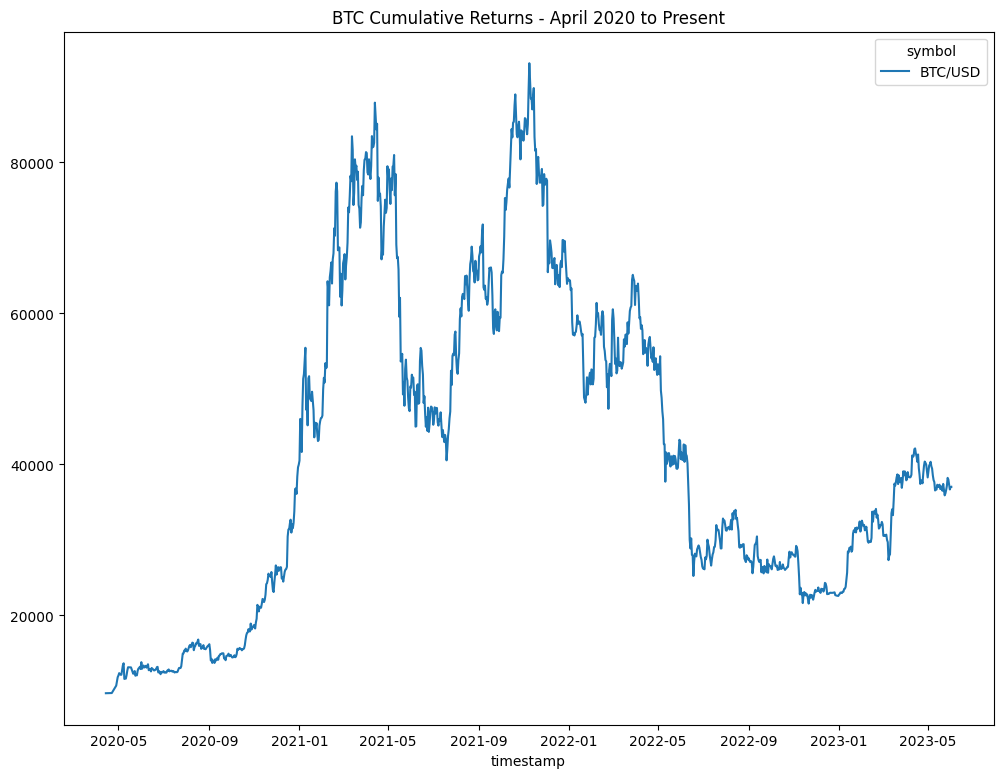

In [569]:
# Plot performance and save to Images
import matplotlib.pyplot as plt
btc_profit.plot(figsize=(12,9), legend=True, title="BTC Cumulative Returns - April 2020 to Present");
plt.savefig("Images/BTCCumulativeReturns.png")

In [570]:
# Running cumulative return against initial investment to obtain current market value of investment in SPY
spy_profit = initial_investment * SPY_cumprod
spy_annotation = spy_profit.iloc[-1][0].round().astype(int)
spy_profit.head()

symbol               SPY
timestamp               
2020-04-09  10154.014599
2020-04-13  10059.489051
2020-04-14  10357.664234
2020-04-15  10136.861314
2020-04-16  10181.021898

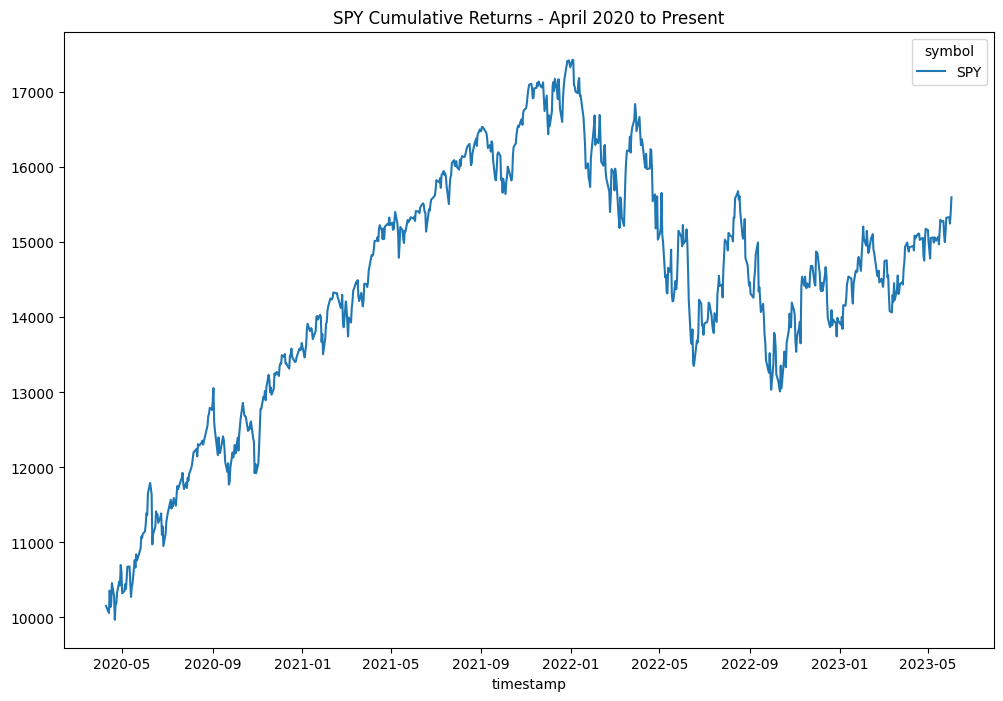

In [571]:
# Plot performance and save to Images
spy_profit.plot(figsize=(12,8), legend=True, title="SPY Cumulative Returns - April 2020 to Present");
plt.savefig("Images/SPYCumulativeReturns.png")

In [572]:
# Running cumulative return against initial investment to obtain current market value of investment in GLD
gld_profit = initial_investment * GLD_cumprod
gld_annotation = gld_profit.iloc[-1][0].round().astype(int)
gld_profit.head()

symbol               GLD
timestamp               
2020-04-09  10254.122211
2020-04-13  10437.116069
2020-04-14  10517.943744
2020-04-15  10475.266731
2020-04-16  10456.514711

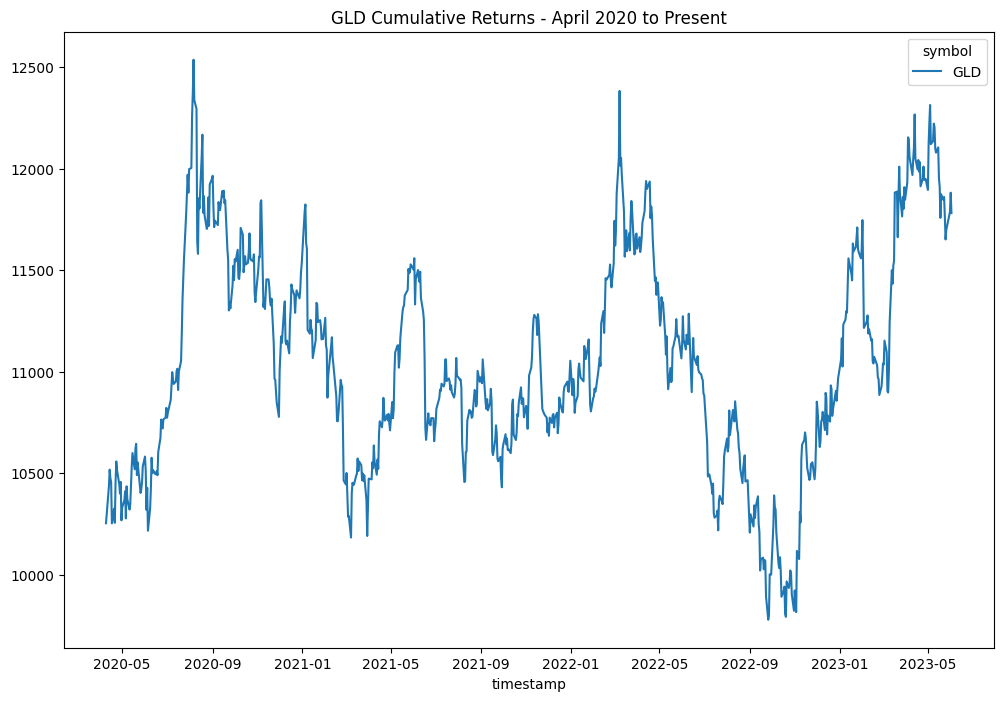

In [573]:
# Plot performance and save to Images
gld_profit.plot(figsize=(12,8), legend=True, title="GLD Cumulative Returns - April 2020 to Present");
plt.savefig("Images/GLDCumulativeReturns.png")

In [574]:
# Running cumulative return against initial investment to obtain current market value of investment in TLT
tlt_profit = initial_investment * TLT_cumprod
tlt_annotation = tlt_profit.iloc[-1][0].round().astype(int)
tlt_profit.head()

symbol               TLT
timestamp               
2020-04-09  10018.171906
2020-04-13   9926.706645
2020-04-14   9924.283724
2020-04-15  10187.170634
2020-04-16  10302.865104

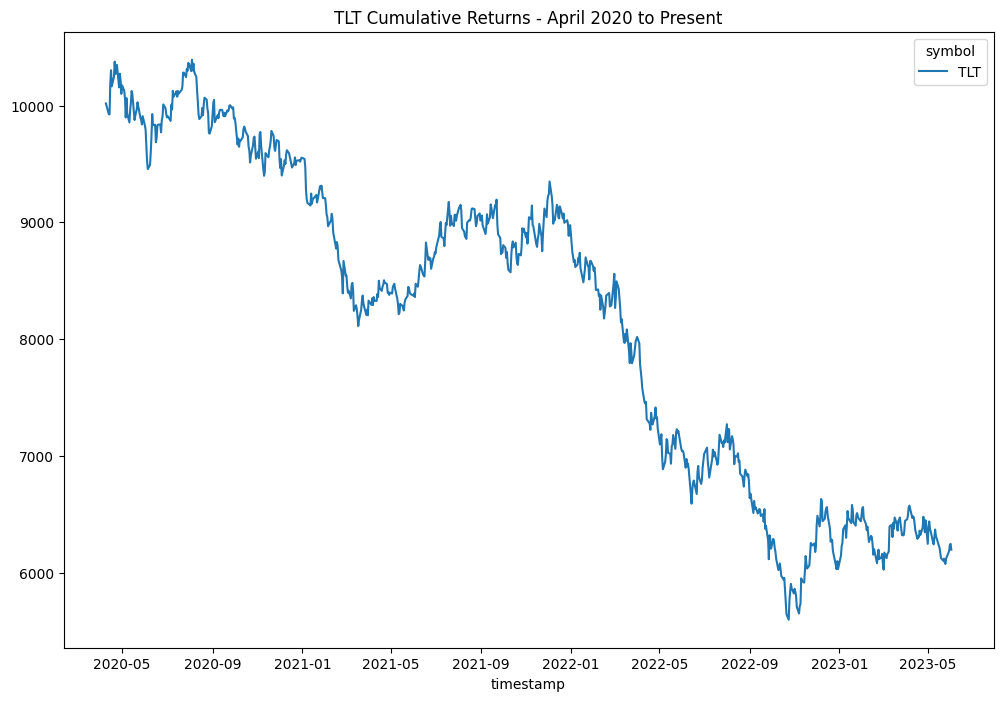

In [575]:
# Plot performance and save to Images
tlt_profit.plot(figsize=(12,8), legend=True, title="TLT Cumulative Returns - April 2020 to Present");
plt.savefig("Images/TLTCumulativeReturns.png")

In [576]:
# Creating date variables to use in plot
from datetime import date, timedelta
days_after_xlim = (date.today()+timedelta(days=88)).isoformat()

days_after_stocks = (date.today()+timedelta(days=2)).isoformat()

days_after_btc = (date.today()+timedelta(days=1)).isoformat()

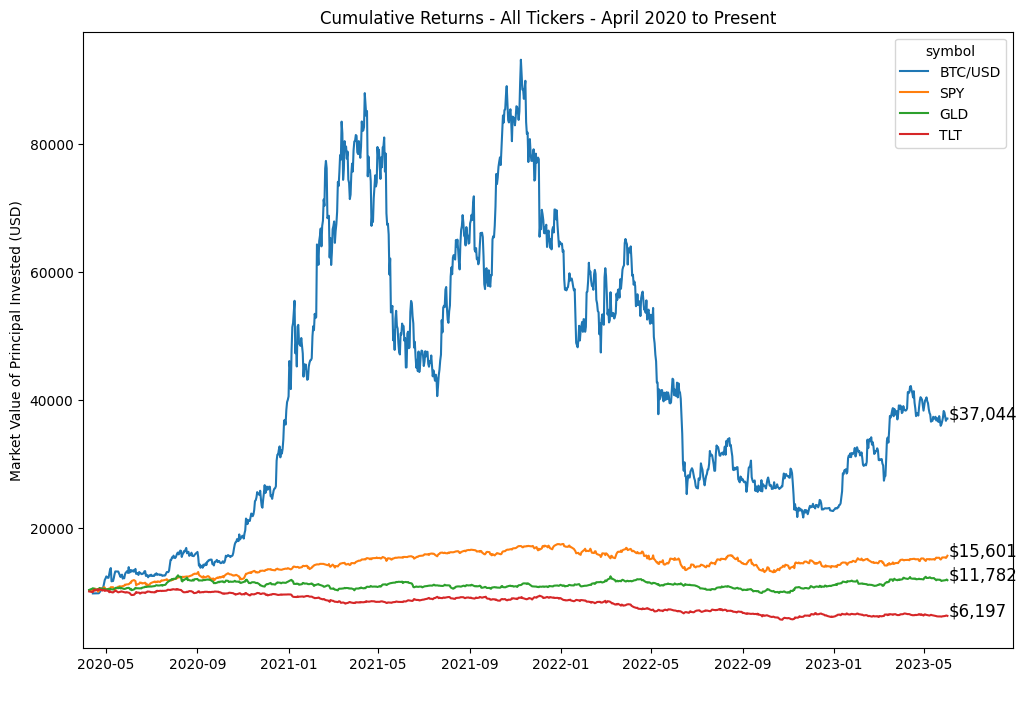

In [577]:
# Overlay of cumulative performances, $10k original investment
ax = btc_profit.plot(figsize=(12,8), legend=True, title="Cumulative Returns - All Tickers - April 2020 to Present")
spy_profit.plot(ax=ax, legend=True)
gld_profit.plot(ax=ax, legend=True)
tlt_profit.plot(ax=ax, legend=True)
ax.text(days_after_stocks, tlt_annotation, f"${tlt_annotation:,}", size=12)
ax.text(days_after_stocks, gld_annotation, f"${gld_annotation:,}", size=12)
ax.text(days_after_stocks, spy_annotation, f"${spy_annotation:,}", size=12)
ax.text(days_after_btc, btc_annotation, f"${btc_annotation:,}", size=12)
ax.set(ylabel='Market Value of Principal Invested (USD)',
       xlabel=' ')
ax.set_xlim('2020-04', days_after_xlim)
plt.savefig("Images/OverlayCumulativeReturns.png");

In [578]:
btc_profit.max()

symbol
BTC/USD    93136.450643
dtype: float64

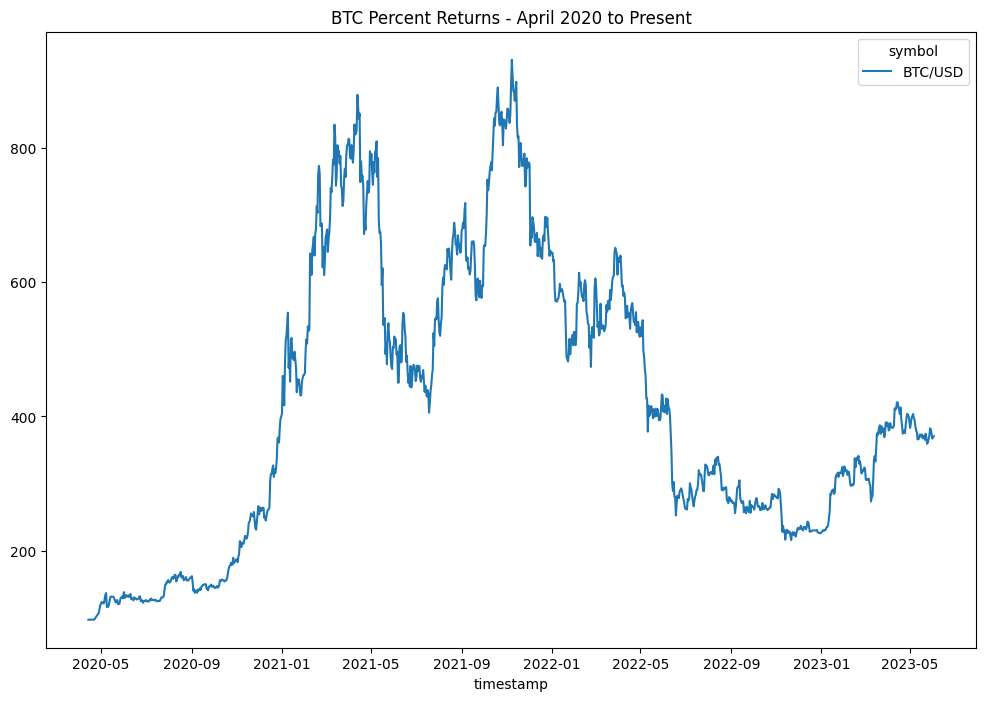

In [579]:
# Plot performance in percentage terms and save to Images
(BTC_cumprod*100).plot(figsize=(12,8), legend=True, title="BTC Percent Returns - April 2020 to Present");
plt.savefig("Images/BTCPercentReturns.png")

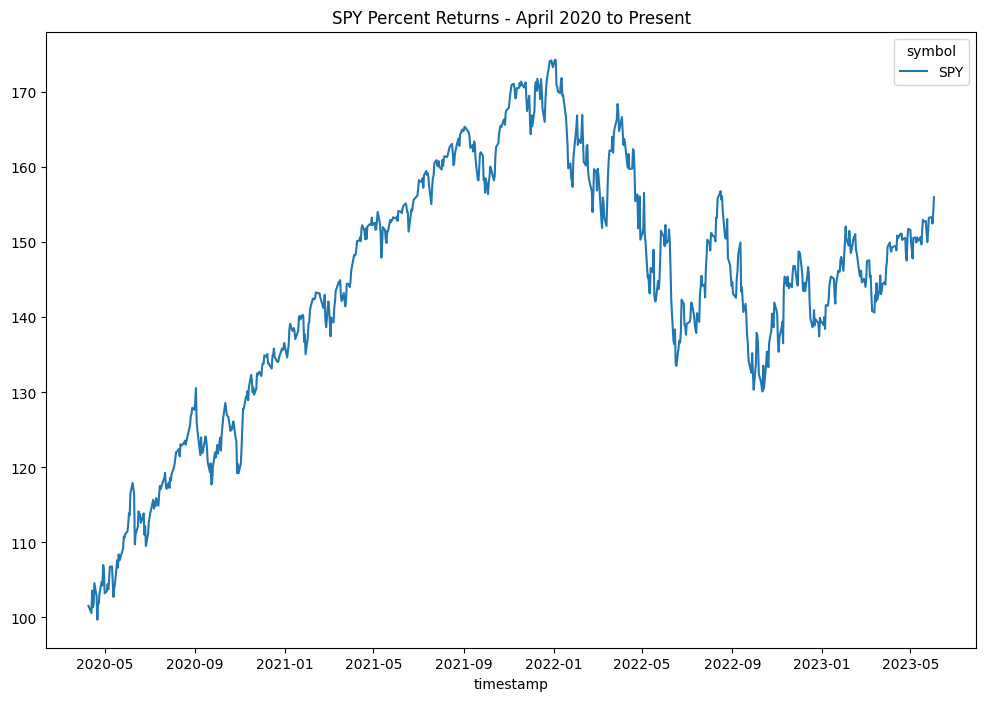

In [580]:
# Plot performance in percentage terms and save to Images
(SPY_cumprod*100).plot(figsize=(12,8), legend=True, title="SPY Percent Returns - April 2020 to Present");
plt.savefig("Images/SPYPercentReturns.png")

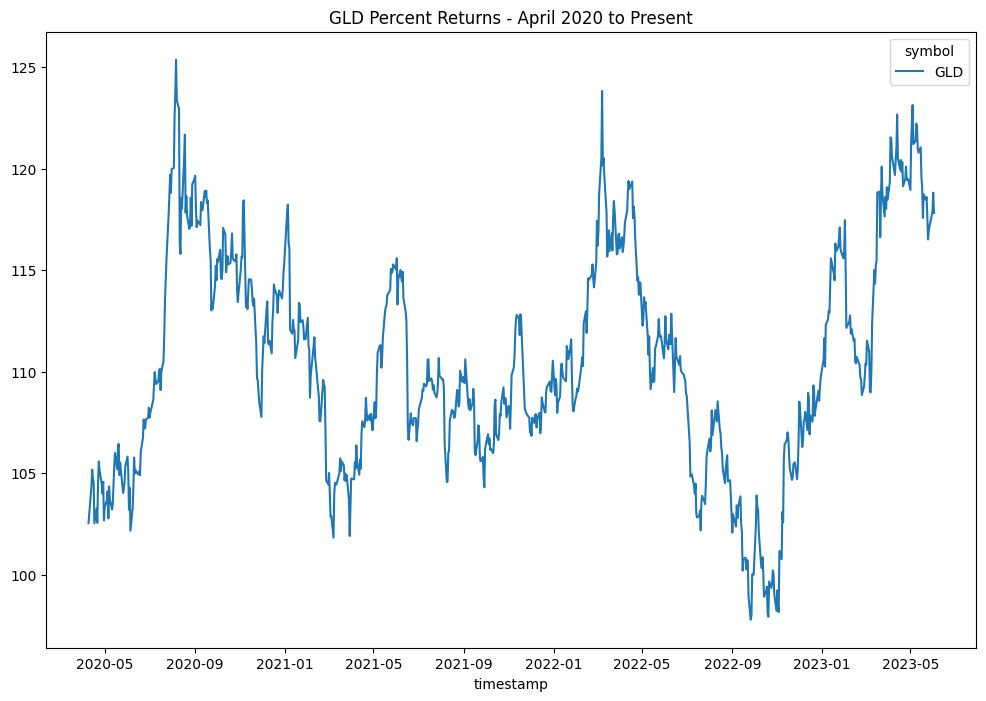

In [581]:
# Plot performance in percentage terms and save to Images
(GLD_cumprod*100).plot(figsize=(12,8), legend=True, title="GLD Percent Returns - April 2020 to Present");
plt.savefig("Images/GLDPercentReturns.png")

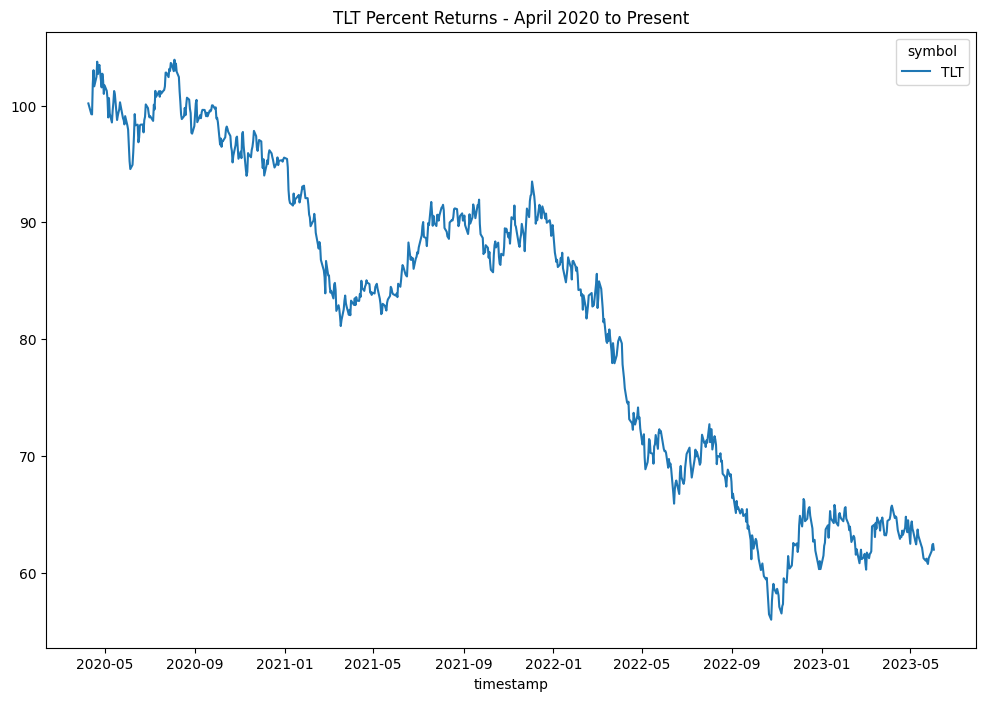

In [582]:
# Plot performance in percentage terms and save to Images
(TLT_cumprod*100).plot(figsize=(12,8), legend=True, title="TLT Percent Returns - April 2020 to Present");
plt.savefig("Images/TLTPercentReturns.png")

In [583]:
# Creating date variables to use in plot
from datetime import date, timedelta
days_after_xlim_pct = (date.today()+timedelta(days=70)).isoformat()

days_after_stocks_pct = (date.today()+timedelta(days=4)).isoformat()

days_after_btc_pct = (date.today()+timedelta(days=2)).isoformat()

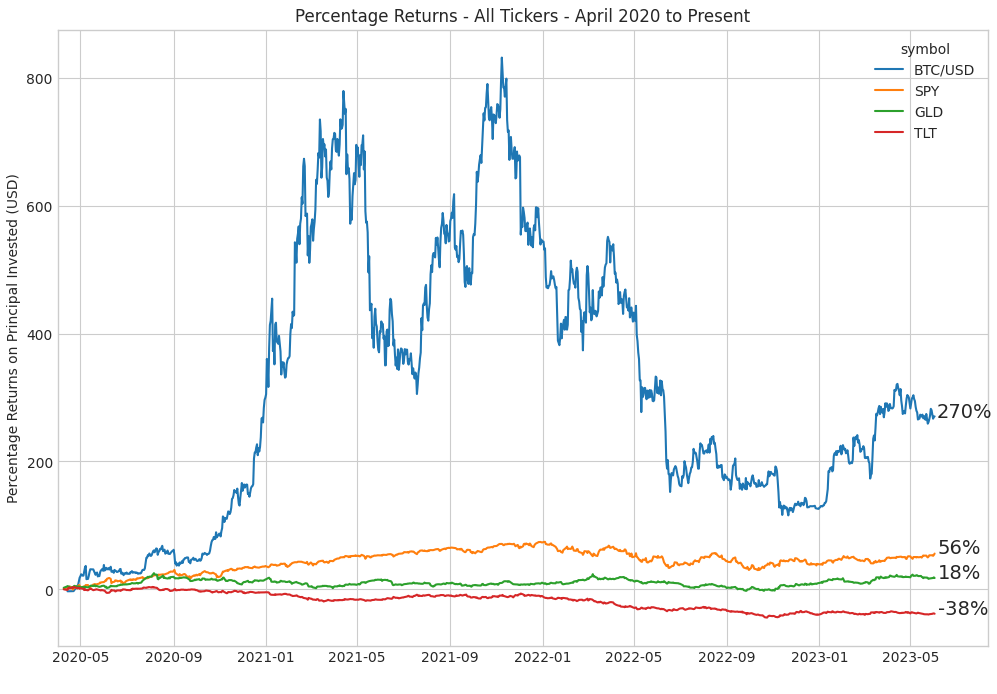

In [584]:
# Overlay of percentage returns 
with plt.style.context('seaborn-whitegrid'):
    ax = ((BTC_cumprod*100)-100).plot(figsize=(12,8), legend=True, title="Percentage Returns - All Tickers - April 2020 to Present")
    ((SPY_cumprod*100)-100).plot(ax=ax, legend=True)
    ((GLD_cumprod*100)-100).plot(ax=ax, legend=True)
    ((TLT_cumprod*100)-100).plot(ax=ax, legend=True)
    ax.text(days_after_stocks_pct, TLT_prod_annotation-100, f"{TLT_prod_annotation-100}%", size=14)
    ax.text(days_after_stocks_pct, GLD_prod_annotation-100, f"{GLD_prod_annotation-100}%", size=14)
    ax.text(days_after_stocks_pct, SPY_prod_annotation-100, f"{SPY_prod_annotation-100}%", size=14)
    ax.text(days_after_btc_pct, BTC_prod_annotation-100, f"{BTC_prod_annotation-100}%", size=14)
    ax.set(ylabel='Percentage Returns on Principal Invested (USD)',
           xlabel=' ')
    ax.set_xlim('2020-04', days_after_xlim_pct)
#     plt.legend(loc=(.93,.8625))
    plt.savefig("Images/OverlayPercentageReturns.png");

In [585]:
# Rechecking info
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1121 non-null   object 
 1   timestamp    1121 non-null   object 
 2   open         1121 non-null   float64
 3   high         1121 non-null   float64
 4   low          1121 non-null   float64
 5   close        1121 non-null   float64
 6   volume       1121 non-null   float64
 7   trade_count  1121 non-null   float64
 8   vwap         1121 non-null   float64
dtypes: float64(7), object(2)
memory usage: 78.9+ KB


In [586]:
# Shifting timestamp back to datetime to filter on month start dates
btc_df['timestamp'] = pd.to_datetime(btc_df['timestamp'])
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   symbol       1121 non-null   object        
 1   timestamp    1121 non-null   datetime64[ns]
 2   open         1121 non-null   float64       
 3   high         1121 non-null   float64       
 4   low          1121 non-null   float64       
 5   close        1121 non-null   float64       
 6   volume       1121 non-null   float64       
 7   trade_count  1121 non-null   float64       
 8   vwap         1121 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 78.9+ KB


In [587]:
# Filtering for month start dates
btc_monthly = btc_df[btc_df['timestamp'].dt.is_month_start] 
btc_monthly.head()

symbol  timestamp     open     high      low    close  volume  \
5    BTC/USD 2020-05-01   8826.5   8834.0   8716.0   8816.5  0.3007   
29   BTC/USD 2020-06-01   9568.5  10393.0   9515.0  10106.5  5.9507   
59   BTC/USD 2020-07-01   9129.5   9270.0   9129.5   9240.5  5.4679   
90   BTC/USD 2020-08-01  11619.5  12035.0  10594.5  11221.5  0.6674   
116  BTC/USD 2020-09-01  11805.5  12005.5  11805.5  11847.5  0.4049   

     trade_count          vwap  
5            4.0   8830.673595  
29          34.0   9979.759012  
59          59.0   9230.826688  
90          24.0  11656.094171  
116          9.0  11947.180168

In [588]:
# Grabbing subset of timestamp and closing prices 
btc_subset = btc_monthly[['timestamp', 'close']]
btc_subset.head()

timestamp    close
5   2020-05-01   8816.5
29  2020-06-01  10106.5
59  2020-07-01   9240.5
90  2020-08-01  11221.5
116 2020-09-01  11847.5

In [589]:
# Resetting index
btc_reset = btc_subset.reset_index(drop=True)
btc_reset.head()

timestamp    close
0 2020-05-01   8816.5
1 2020-06-01  10106.5
2 2020-07-01   9240.5
3 2020-08-01  11221.5
4 2020-09-01  11847.5

In [590]:
# Setting timestamp column to index to prep for pct_change
btc_index = btc_reset.set_index('timestamp')
btc_index.head()

close
timestamp          
2020-05-01   8816.5
2020-06-01  10106.5
2020-07-01   9240.5
2020-08-01  11221.5
2020-09-01  11847.5

In [591]:
# Calculating month over month pct change
btc_chg = btc_index.pct_change()
btc_chg.head()

close
timestamp           
2020-05-01       NaN
2020-06-01  0.146317
2020-07-01 -0.085687
2020-08-01  0.214382
2020-09-01  0.055786

In [592]:
# Rechecking info
btc_chg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38 entries, 2020-05-01 to 2023-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   37 non-null     float64
dtypes: float64(1)
memory usage: 608.0 bytes


In [593]:
# Convert index back to string to prep for plotting
btc_chg.index = btc_chg.index.strftime("%Y-%m-%d")
btc_chg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 2020-05-01 to 2023-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   37 non-null     float64
dtypes: float64(1)
memory usage: 608.0+ bytes


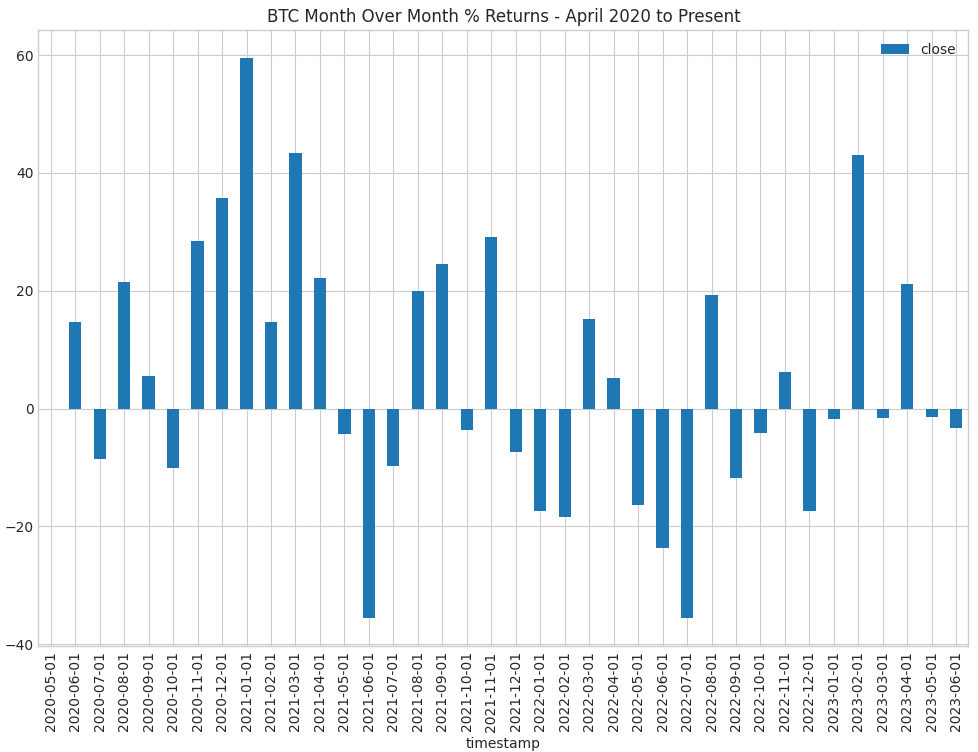

In [594]:
# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (btc_chg*100).plot(kind='bar', figsize=(12,8), legend=True, title="BTC Month Over Month % Returns - April 2020 to Present");
    plt.savefig("Images/BTCMonthlyPercentReturns.png")

In [595]:
# Prep SPY dataframe
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382 entries, 0 to 2381
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       2382 non-null   object 
 1   timestamp    2382 non-null   object 
 2   open         2382 non-null   float64
 3   high         2382 non-null   float64
 4   low          2382 non-null   float64
 5   close        2382 non-null   float64
 6   volume       2382 non-null   float64
 7   trade_count  2382 non-null   float64
 8   vwap         2382 non-null   float64
dtypes: float64(7), object(2)
memory usage: 167.6+ KB


In [596]:
# Shifting timestamp back to datetime to filter on month start dates
stock_df['timestamp'] = pd.to_datetime(stock_df['timestamp'])
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382 entries, 0 to 2381
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   symbol       2382 non-null   object        
 1   timestamp    2382 non-null   datetime64[ns]
 2   open         2382 non-null   float64       
 3   high         2382 non-null   float64       
 4   low          2382 non-null   float64       
 5   close        2382 non-null   float64       
 6   volume       2382 non-null   float64       
 7   trade_count  2382 non-null   float64       
 8   vwap         2382 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 167.6+ KB


In [597]:
stock_df

symbol  timestamp    open      high       low    close      volume  \
0       GLD 2020-04-08  155.91  155.9400  154.5900  154.650   7600804.0   
1       GLD 2020-04-09  158.08  159.0800  157.2100  158.580  18123039.0   
2       GLD 2020-04-13  159.17  162.3800  158.6250  161.410  20549213.0   
3       GLD 2020-04-14  162.73  164.4200  161.7800  162.660  17095086.0   
4       GLD 2020-04-15  161.80  162.5400  160.8061  162.000  12141890.0   
...     ...        ...     ...       ...       ...      ...         ...   
2377    TLT 2023-05-26  100.12  101.1733  100.0000  101.090  16855799.0   
2378    TLT 2023-05-30  101.40  102.2400  101.2500  102.100  23129762.0   
2379    TLT 2023-05-31  101.99  103.1800  101.8700  102.990  23787034.0   
2380    TLT 2023-06-01  103.28  103.6300  102.6300  103.120  20737125.0   
2381    TLT 2023-06-02  103.00  103.0650  102.2500  102.305   7671516.0   

      trade_count        vwap  
0         60704.0  155.233884  
1        140239.0  158.255634  
2        140401.0  160.906373  
3        146336.0  163.197557  
4         95518.0  161.749049  
...           ...         ...  
2377     100182.0  100.648808  
2378     124598.0  101.850035  
2379     128768.0  102.605426  
2380     106620.0  103.068916  
2381      50357.0  102.559744  

[2382 rows x 9 columns]

In [598]:
stock_index = stock_df.set_index('timestamp')
stock_index

symbol    open      high       low    close      volume  \
timestamp                                                            
2020-04-08    GLD  155.91  155.9400  154.5900  154.650   7600804.0   
2020-04-09    GLD  158.08  159.0800  157.2100  158.580  18123039.0   
2020-04-13    GLD  159.17  162.3800  158.6250  161.410  20549213.0   
2020-04-14    GLD  162.73  164.4200  161.7800  162.660  17095086.0   
2020-04-15    GLD  161.80  162.5400  160.8061  162.000  12141890.0   
...           ...     ...       ...       ...      ...         ...   
2023-05-26    TLT  100.12  101.1733  100.0000  101.090  16855799.0   
2023-05-30    TLT  101.40  102.2400  101.2500  102.100  23129762.0   
2023-05-31    TLT  101.99  103.1800  101.8700  102.990  23787034.0   
2023-06-01    TLT  103.28  103.6300  102.6300  103.120  20737125.0   
2023-06-02    TLT  103.00  103.0650  102.2500  102.305   7671516.0   

            trade_count        vwap  
timestamp                            
2020-04-08      60704.0  155.233884  
2020-04-09     140239.0  158.255634  
2020-04-13     140401.0  160.906373  
2020-04-14     146336.0  163.197557  
2020-04-15      95518.0  161.749049  
...                 ...         ...  
2023-05-26     100182.0  100.648808  
2023-05-30     124598.0  101.850035  
2023-05-31     128768.0  102.605426  
2023-06-01     106620.0  103.068916  
2023-06-02      50357.0  102.559744  

[2382 rows x 8 columns]

In [599]:
stock_index['2021-06-30':'2021-07-02']

symbol    open     high       low   close      volume  trade_count  \
timestamp                                                                       
2021-06-30    GLD  164.57  166.100  164.2900  165.63   7954916.0      55215.0   
2021-07-01    GLD  166.65  166.880  165.5000  166.20   7427387.0      50788.0   
2021-07-02    GLD  167.35  167.715  166.4000  167.29   7872766.0      52311.0   
2021-06-30    SPY  427.21  428.780  427.1800  428.06  64702769.0     315392.0   
2021-07-01    SPY  428.87  430.600  428.8000  430.43  52968992.0     315119.0   
2021-07-02    SPY  431.67  434.100  430.5218  433.72  57503965.0     312260.0   
2021-06-30    TLT  144.25  144.930  144.0700  144.35  15707427.0      76777.0   
2021-07-01    TLT  143.98  144.310  143.5300  144.17  10767196.0      55429.0   
2021-07-02    TLT  144.23  145.040  144.1100  145.04   9648629.0      52006.0   

                  vwap  
timestamp               
2021-06-30  165.379047  
2021-07-01  166.141960  
2021-07-02  167.181069  
2021-06-30  428.035998  
2021-07-01  429.721484  
2021-07-02  432.842859  
2021-06-30  144.486788  
2021-07-01  143.845345  
2021-07-02  144.737576

In [600]:
# Grouping GLD by business month start; nth isolates by symbol
gld_group_df = stock_index.groupby(pd.Grouper(freq='BMS')).nth(0)
gld_group_df.head()

symbol      open    high     low   close      volume  trade_count  \
timestamp                                                                      
2020-04-01    GLD  155.9100  155.94  154.59  154.65   7600804.0      60704.0   
2020-05-01    GLD  157.9500  160.45  157.80  159.78  10914334.0      87024.0   
2020-06-01    GLD  162.9235  163.74  162.39  163.66   8155048.0      60202.0   
2020-07-01    GLD  167.0500  167.06  165.34  166.62  13214759.0      86821.0   
2020-08-03    GLD  185.0500  185.82  184.20  185.64  12896999.0      93696.0   

                  vwap  
timestamp               
2020-04-01  155.233884  
2020-05-01  159.380639  
2020-06-01  163.323352  
2020-07-01  166.229189  
2020-08-03  185.228945

In [601]:
# Filtering first and last months due to incomplete data
gld_iloc = gld_group_df.iloc[1:-1]
gld_iloc.head()

symbol      open    high     low   close      volume  trade_count  \
timestamp                                                                      
2020-05-01    GLD  157.9500  160.45  157.80  159.78  10914334.0      87024.0   
2020-06-01    GLD  162.9235  163.74  162.39  163.66   8155048.0      60202.0   
2020-07-01    GLD  167.0500  167.06  165.34  166.62  13214759.0      86821.0   
2020-08-03    GLD  185.0500  185.82  184.20  185.64  12896999.0      93696.0   
2020-09-01    GLD  186.9900  186.99  184.33  185.05  10689058.0      75982.0   

                  vwap  
timestamp               
2020-05-01  159.380639  
2020-06-01  163.323352  
2020-07-01  166.229189  
2020-08-03  185.228945  
2020-09-01  185.384520

In [602]:
# Grouping SPY by business month start; nth isolates by symbol
spy_group_df = stock_index.groupby(pd.Grouper(freq='BMS')).nth(1)
spy_group_df.head()

symbol    open      high       low   close       volume  \
timestamp                                                            
2020-04-01    SPY  267.96  276.0000  265.2542  274.00  153774487.0   
2020-05-01    SPY  285.31  290.6572  281.5200  282.83  125180028.0   
2020-06-01    SPY  303.62  306.2050  303.0600  305.45   56679836.0   
2020-07-01    SPY  309.54  311.8900  309.0700  310.57   72474858.0   
2020-08-03    SPY  328.32  329.6200  327.7300  328.67   53078112.0   

            trade_count        vwap  
timestamp                            
2020-04-01     950859.0  271.051454  
2020-05-01     639987.0  284.092832  
2020-06-01     316834.0  305.036356  
2020-07-01     418495.0  310.486119  
2020-08-03     288003.0  328.658795

In [603]:
# Filtering first and last months due to incomplete data
spy_iloc = spy_group_df.iloc[1:-1]
spy_iloc.head()

symbol    open      high     low   close       volume  trade_count  \
timestamp                                                                       
2020-05-01    SPY  285.31  290.6572  281.52  282.83  125180028.0     639987.0   
2020-06-01    SPY  303.62  306.2050  303.06  305.45   56679836.0     316834.0   
2020-07-01    SPY  309.54  311.8900  309.07  310.57   72474858.0     418495.0   
2020-08-03    SPY  328.32  329.6200  327.73  328.67   53078112.0     288003.0   
2020-09-01    SPY  350.21  352.7100  349.24  352.68   54999325.0     295183.0   

                  vwap  
timestamp               
2020-05-01  284.092832  
2020-06-01  305.036356  
2020-07-01  310.486119  
2020-08-03  328.658795  
2020-09-01  351.086724

In [604]:
# Grouping TLT by business month start; nth isolates by symbol
tlt_group_df = stock_index.groupby(pd.Grouper(freq='BMS')).nth(2)
tlt_group_df.head()

symbol    open    high     low   close      volume  trade_count  \
timestamp                                                                    
2020-04-01    TLT  165.11  166.19  164.13  165.09  10147077.0      63686.0   
2020-05-01    TLT  167.50  168.11  166.44  167.95  10209421.0      52918.0   
2020-06-01    TLT  162.10  162.44  161.67  162.28  13353301.0      54793.0   
2020-07-01    TLT  162.81  163.56  162.15  163.42  13181262.0      66576.0   
2020-08-03    TLT  169.24  169.99  168.97  169.95   9067756.0      61181.0   

                  vwap  
timestamp               
2020-04-01  165.217491  
2020-05-01  167.362331  
2020-06-01  162.363115  
2020-07-01  163.014043  
2020-08-03  169.514329

In [605]:
# Filtering first and last months due to incomplete data
tlt_iloc = tlt_group_df.iloc[1:-1]
tlt_iloc.head()

symbol    open    high     low   close      volume  trade_count  \
timestamp                                                                    
2020-05-01    TLT  167.50  168.11  166.44  167.95  10209421.0      52918.0   
2020-06-01    TLT  162.10  162.44  161.67  162.28  13353301.0      54793.0   
2020-07-01    TLT  162.81  163.56  162.15  163.42  13181262.0      66576.0   
2020-08-03    TLT  169.24  169.99  168.97  169.95   9067756.0      61181.0   
2020-09-01    TLT  161.76  164.07  161.18  163.86  10587634.0      58232.0   

                  vwap  
timestamp               
2020-05-01  167.362331  
2020-06-01  162.363115  
2020-07-01  163.014043  
2020-08-03  169.514329  
2020-09-01  163.138871

In [606]:
# Revising column names to prep for join
dict = {'close':'tlt_close'}

tlt_iloc = tlt_iloc.rename(columns=dict)


spy_dict = {'close':'spy_close'}

spy_iloc = spy_iloc.rename(columns=spy_dict)


gld_dict = {'close':'gld_close'}

gld_iloc = gld_iloc.rename(columns=gld_dict)
gld_iloc



symbol      open      high       low  gld_close      volume  \
timestamp                                                                
2020-05-01    GLD  157.9500  160.4500  157.8000     159.78  10914334.0   
2020-06-01    GLD  162.9235  163.7400  162.3900     163.66   8155048.0   
2020-07-01    GLD  167.0500  167.0600  165.3400     166.62  13214759.0   
2020-08-03    GLD  185.0500  185.8200  184.2000     185.64  12896999.0   
2020-09-01    GLD  186.9900  186.9900  184.3300     185.05  10689058.0   
2020-10-01    GLD  178.7100  179.5000  178.0375     178.70  10380333.0   
2020-11-02    GLD  177.4499  177.9250  177.1301     177.91   6498368.0   
2020-12-01    GLD  169.7600  170.4800  169.3000     170.19  13555209.0   
2021-01-01    GLD  181.9700  182.4000  180.9550     182.32  14308436.0   
2021-02-01    GLD  175.0200  175.2600  174.0600     174.23   9235082.0   
2021-03-01    GLD  163.0300  163.3500  161.1600     161.53  13828347.0   
2021-04-01    GLD  161.5600  162.1100  161.2800     161.98   7104695.0   
2021-05-03    GLD  167.6100  168.4300  167.4100     167.81   9013396.0   
2021-06-01    GLD  178.7600  178.8500  177.1900     177.90   9143250.0   
2021-07-01    GLD  166.6500  166.8800  165.5000     166.20   7427387.0   
2021-08-02    GLD  169.3300  170.2450  169.1000     169.61  10766410.0   
2021-09-01    GLD  169.9400  170.0000  169.1600     169.70   4752563.0   
2021-10-01    GLD  164.2700  164.9600  163.8850     164.59   6649876.0   
2021-11-01    GLD  167.3800  167.8400  166.9100     167.52   4969004.0   
2021-12-01    GLD  166.8400  167.4700  166.0600     166.16   7820795.0   
2022-01-03    GLD  168.8600  169.0100  168.0000     168.33   9014203.0   
2022-02-01    GLD  168.5700  168.8500  167.8700     168.23   9756471.0   
2022-03-01    GLD  179.0456  181.7600  179.0300     181.62  21859243.0   
2022-04-01    GLD  179.5501  180.4599  178.9800     179.50  13027125.0   
2022-05-02    GLD  173.6121  174.6500  172.9850     173.63  14237636.0   
2022-06-01    GLD  172.2099  172.5300  171.3900     172.23   6938929.0   
2022-07-01    GLD  167.1300  168.6800  166.9600     168.32  11377331.0   
2022-08-01    GLD  164.9800  165.4100  164.4100     165.03   4660218.0   
2022-09-01    GLD  158.1700  158.3900  157.3200     157.87   7384400.0   
2022-10-03    GLD  155.4380  158.4800  155.2300     158.43  10348997.0   
2022-11-01    GLD  153.8200  153.9800  152.8700     153.46   4599737.0   
2022-12-01    GLD  167.4800  167.9500  166.9750     167.84   8232886.0   
2023-01-02    GLD  171.3200  172.0900  170.0200     171.06   7979721.0   
2023-02-01    GLD  179.7500  181.7300  178.6300     181.67   7996342.0   
2023-03-01    GLD  170.9500  171.4900  170.4700     170.76   6590684.0   
2023-04-03    GLD  183.8500  185.0350  183.3200     184.54   9206828.0   
2023-05-01    GLD  186.0500  186.2200  183.9100     183.97   7997881.0   

            trade_count        vwap  
timestamp                            
2020-05-01      87024.0  159.380639  
2020-06-01      60202.0  163.323352  
2020-07-01      86821.0  166.229189  
2020-08-03      93696.0  185.228945  
2020-09-01      75982.0  185.384520  
2020-10-01      65577.0  178.903733  
2020-11-02      55161.0  177.626697  
2020-12-01      87946.0  169.921532  
2021-01-01     102693.0  181.929522  
2021-02-01      66775.0  174.612395  
2021-03-01     102912.0  162.159329  
2021-04-01      52967.0  161.759341  
2021-05-03      67434.0  167.845715  
2021-06-01      67595.0  178.022479  
2021-07-01      50788.0  166.141960  
2021-08-02      60007.0  169.726678  
2021-09-01      37218.0  169.625454  
2021-10-01      55418.0  164.438331  
2021-11-01      42298.0  167.485529  
2021-12-01      62574.0  166.605337  
2022-01-03      67681.0  168.403580  
2022-02-01      70364.0  168.335275  
2022-03-01     162731.0  180.521167  
2022-04-01      77799.0  179.714366  
2022-05-02     108493.0  173.798444  
2022-06-01      39584.0  172.031163  
2022-07-01      71249.0  167.938735  
2022-08-01      33304.

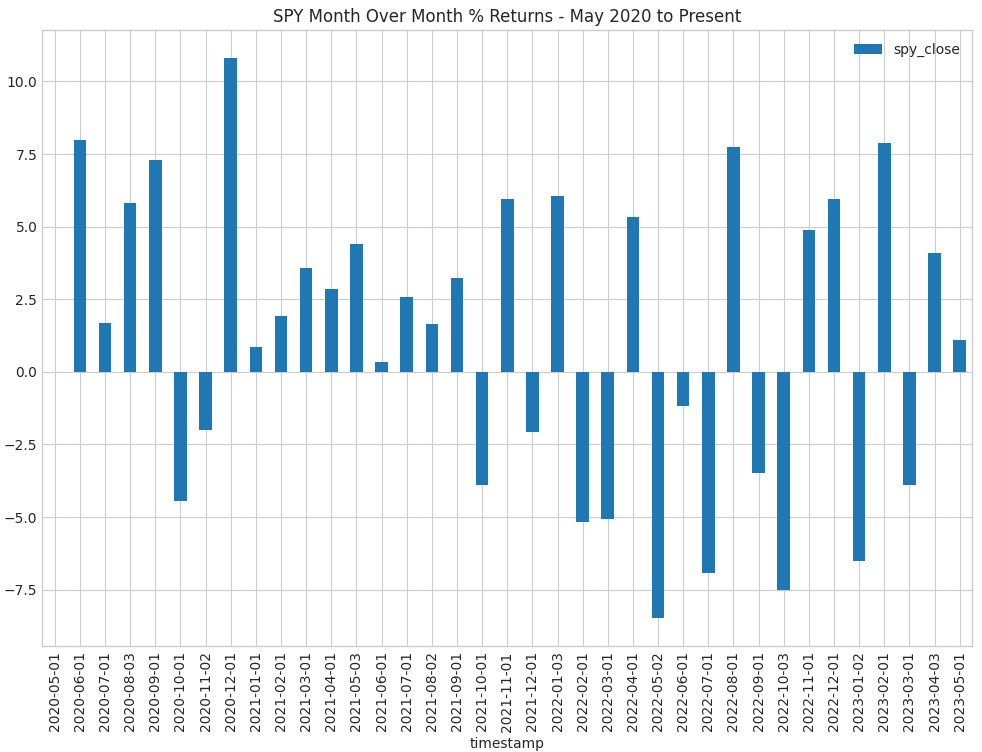

In [607]:
# Grabbing subset of SPY timestamp and closing prices 
spy_close = spy_iloc['spy_close']
spy_close

# Calculating pct change
spy_pct = spy_close.pct_change()

# Convert index back to string to prep for plotting
spy_pct.index = spy_pct.index.strftime("%Y-%m-%d")

# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (spy_pct*100).plot(kind='bar', figsize=(12,8), legend=True, title="SPY Month Over Month % Returns - May 2020 to Present");
    plt.savefig("Images/SPYMonthlyPercentReturns.png")

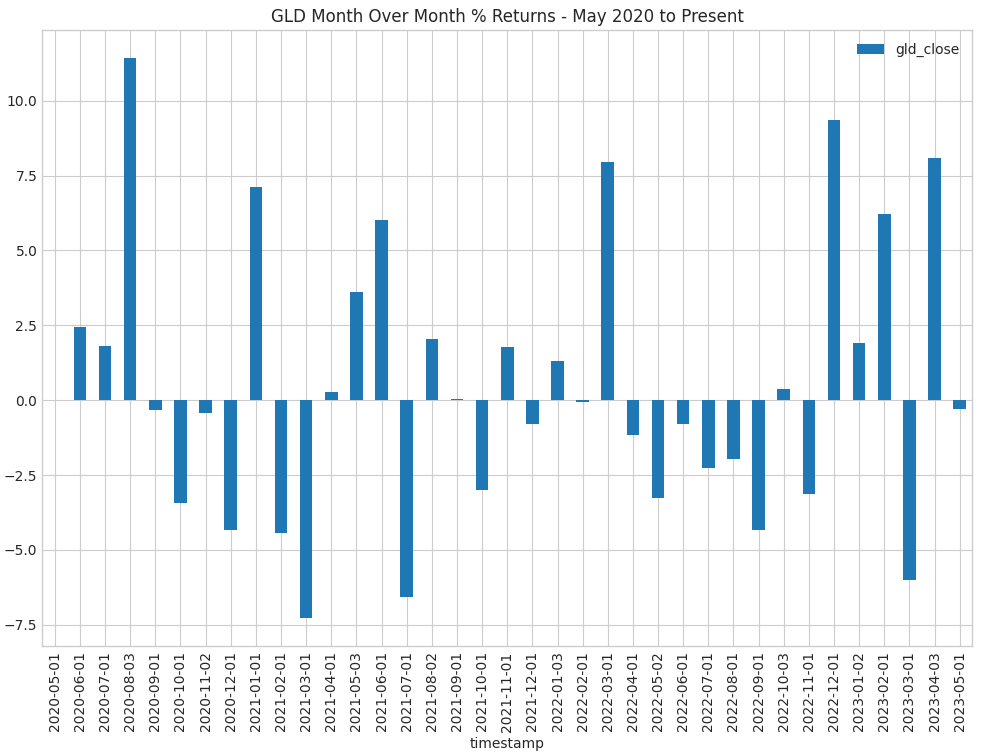

In [608]:
# Grabbing subset of GLD timestamp and closing prices 
gld_close = gld_iloc['gld_close']

# Calculating pct change
gld_pct = gld_close.pct_change()

# Convert index back to string to prep for plotting
gld_pct.index = gld_pct.index.strftime("%Y-%m-%d")

# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (gld_pct*100).plot(kind='bar', figsize=(12,8), legend=True, title="GLD Month Over Month % Returns - May 2020 to Present");
    plt.savefig("Images/GLDMonthlyPercentReturns.png")

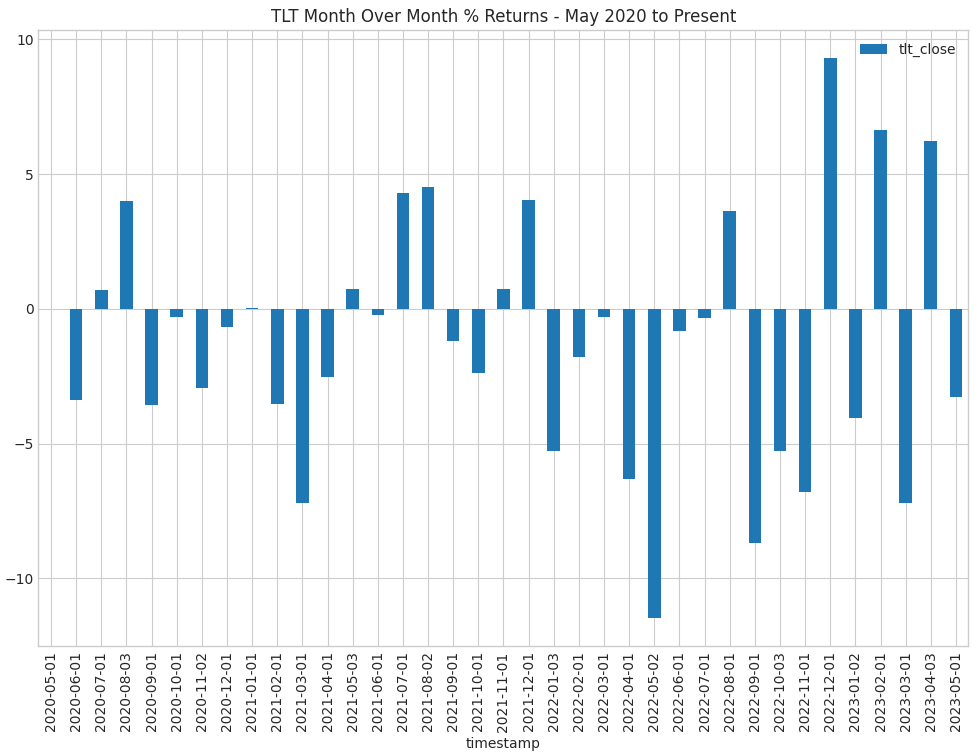

In [609]:
# Grabbing subset of TLT timestamp and closing prices 
tlt_close = tlt_iloc['tlt_close']

# Calculating pct change
tlt_pct = tlt_close.pct_change()

# Convert index back to string to prep for plotting
tlt_pct.index = tlt_pct.index.strftime("%Y-%m-%d")

# Plot performance in month over month percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (tlt_pct*100).plot(kind='bar', figsize=(12,8), legend=True, title="TLT Month Over Month % Returns - May 2020 to Present");
    plt.savefig("Images/TLTMonthlyPercentReturns.png")

In [610]:
btc_chg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 2020-05-01 to 2023-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   37 non-null     float64
dtypes: float64(1)
memory usage: 608.0+ bytes


In [611]:
tlt_pct.info()

<class 'pandas.core.series.Series'>
Index: 37 entries, 2020-05-01 to 2023-05-01
Series name: tlt_close
Non-Null Count  Dtype  
--------------  -----  
36 non-null     float64
dtypes: float64(1)
memory usage: 592.0+ bytes


In [612]:
spy_pct.shape

(37,)

In [613]:
gld_pct.shape

(37,)

In [614]:
df_concat = pd.concat([tlt_pct, spy_pct, gld_pct], axis=1)
df_concat

tlt_close  spy_close  gld_close
timestamp                                  
2020-05-01        NaN        NaN        NaN
2020-06-01  -0.033760   0.079977   0.024283
2020-07-01   0.007025   0.016762   0.018086
2020-08-03   0.039958   0.058280   0.114152
2020-09-01  -0.035834   0.073052  -0.003178
2020-10-01  -0.003051  -0.044545  -0.034315
2020-11-02  -0.029261  -0.020120  -0.004421
2020-12-01  -0.006810   0.107968  -0.043393
2021-01-01   0.000254   0.008556   0.071273
2021-02-01  -0.035166   0.019107  -0.044373
2021-03-01  -0.071974   0.035663  -0.072892
2021-04-01  -0.025167   0.028709   0.002786
2021-05-03   0.007345   0.043908   0.035992
2021-06-01  -0.002238   0.003515   0.060128
2021-07-01   0.043123   0.025639  -0.065767
2021-08-02   0.045086   0.016635   0.020517
2021-09-01  -0.011814   0.032473   0.000531
2021-10-01  -0.023776  -0.038867  -0.030112
2021-11-01   0.007499   0.059414   0.017802
2021-12-01   0.040290  -0.020737  -0.008118
2022-01-03  -0.052777   0.060400   0.013060
2022-02-01  -0.017879  -0.051831  -0.000594
2022-03-01  -0.002964  -0.050712   0.079593
2022-04-01  -0.063128   0.053351  -0.011673
2022-05-02  -0.114821  -0.084872  -0.032702
2022-06-01  -0.008193  -0.011798  -0.008063
2022-07-01  -0.003442  -0.069216  -0.022702
2022-08-01   0.036436   0.077458  -0.019546
2022-09-01  -0.086971  -0.034934  -0.043386
2022-10-03  -0.052646  -0.075198   0.003547
2022-11-01  -0.067996   0.048853  -0.031370
2022-12-01   0.092901   0.059451   0.093705
2023-01-02  -0.040658  -0.065197   0.019185
2023-02-01   0.066233   0.078725   0.062025
2023-03-01  -0.072194  -0.039094  -0.060054
2023-04-03   0.062070   0.041065   0.080698
2023-05-01  -0.032552   0.011096  -0.003089

In [615]:
btc_chg.shape

(38, 1)

In [616]:
btc_re = btc_chg.iloc[0:-1]
btc_re

close
timestamp           
2020-05-01       NaN
2020-06-01  0.146317
2020-07-01 -0.085687
2020-08-01  0.214382
2020-09-01  0.055786
2020-10-01 -0.100696
2020-11-01  0.284715
2020-12-01  0.357868
2021-01-01  0.594222
2021-02-01  0.147177
2021-03-01  0.434132
2021-04-01  0.220784
2021-05-01 -0.042849
2021-06-01 -0.355676
2021-07-01 -0.098060
2021-08-01  0.199408
2021-09-01  0.244711
2021-10-01 -0.037009
2021-11-01  0.291715
2021-12-01 -0.073966
2022-01-01 -0.173802
2022-02-01 -0.183169
2022-03-01  0.152741
2022-04-01  0.051325
2022-05-01 -0.163191
2022-06-01 -0.235826
2022-07-01 -0.355927
2022-08-01  0.192689
2022-09-01 -0.118534
2022-10-01 -0.041121
2022-11-01  0.061301
2022-12-01 -0.174473
2023-01-01 -0.017344
2023-02-01  0.430958
2023-03-01 -0.015211
2023-04-01  0.211112
2023-05-01 -0.014184

In [617]:
all_concat = pd.concat([df_concat, btc_re], axis=1)
all_concat

tlt_close  spy_close  gld_close     close
timestamp                                            
2020-05-01        NaN        NaN        NaN       NaN
2020-06-01  -0.033760   0.079977   0.024283  0.146317
2020-07-01   0.007025   0.016762   0.018086 -0.085687
2020-08-03   0.039958   0.058280   0.114152       NaN
2020-09-01  -0.035834   0.073052  -0.003178  0.055786
2020-10-01  -0.003051  -0.044545  -0.034315 -0.100696
2020-11-02  -0.029261  -0.020120  -0.004421       NaN
2020-12-01  -0.006810   0.107968  -0.043393  0.357868
2021-01-01   0.000254   0.008556   0.071273  0.594222
2021-02-01  -0.035166   0.019107  -0.044373  0.147177
2021-03-01  -0.071974   0.035663  -0.072892  0.434132
2021-04-01  -0.025167   0.028709   0.002786  0.220784
2021-05-03   0.007345   0.043908   0.035992       NaN
2021-06-01  -0.002238   0.003515   0.060128 -0.355676
2021-07-01   0.043123   0.025639  -0.065767 -0.098060
2021-08-02   0.045086   0.016635   0.020517       NaN
2021-09-01  -0.011814   0.032473   0.000531  0.244711
2021-10-01  -0.023776  -0.038867  -0.030112 -0.037009
2021-11-01   0.007499   0.059414   0.017802  0.291715
2021-12-01   0.040290  -0.020737  -0.008118 -0.073966
2022-01-03  -0.052777   0.060400   0.013060       NaN
2022-02-01  -0.017879  -0.051831  -0.000594 -0.183169
2022-03-01  -0.002964  -0.050712   0.079593  0.152741
2022-04-01  -0.063128   0.053351  -0.011673  0.051325
2022-05-02  -0.114821  -0.084872  -0.032702       NaN
2022-06-01  -0.008193  -0.011798  -0.008063 -0.235826
2022-07-01  -0.003442  -0.069216  -0.022702 -0.355927
2022-08-01   0.036436   0.077458  -0.019546  0.192689
2022-09-01  -0.086971  -0.034934  -0.043386 -0.118534
2022-10-03  -0.052646  -0.075198   0.003547       NaN
2022-11-01  -0.067996   0.048853  -0.031370  0.061301
2022-12-01   0.092901   0.059451   0.093705 -0.174473
2023-01-02  -0.040658  -0.065197   0.019185       NaN
2023-02-01   0.066233   0.078725   0.062025  0.430958
2023-03-01  -0.072194  -0.039094  -0.060054 -0.015211
2023-04-03   0.062070   0.041065   0.080698       NaN
2023-05-01  -0.032552   0.011096  -0.003089 -0.014184
2020-08-01        NaN        NaN        NaN  0.214382
2020-11-01        NaN        NaN        NaN  0.284715
2021-05-01        NaN        NaN        NaN -0.042849
2021-08-01        NaN        NaN        NaN  0.199408
2022-01-01        NaN        NaN        NaN -0.173802
2022-05-01        NaN        NaN        NaN -0.163191
2022-10-01        NaN        NaN        NaN -0.041121
2023-01-01        NaN        NaN        NaN -0.017344
2023-04-01        NaN        NaN        NaN  0.211112

In [618]:
# !pip install scipy

The correlation between both factors is 0.14


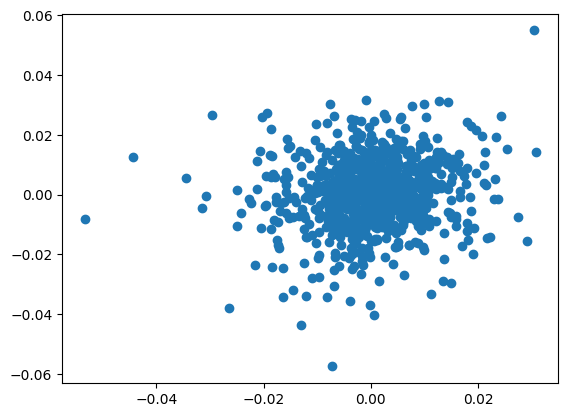

In [619]:
import scipy.stats as st
plt.scatter(gld_daily['GLD'], spy_daily['SPY'])
plt.show
correlation = st.pearsonr(gld_daily['GLD'], spy_daily['SPY'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [620]:
correlation

PearsonRResult(statistic=0.13626726058172195, pvalue=0.00011848666241363149)

The correlation between both factors is -0.07


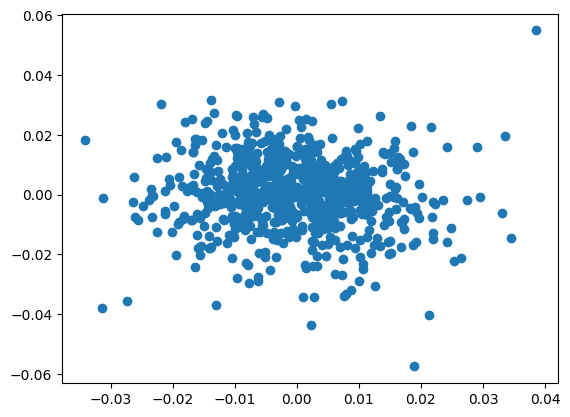

In [621]:
plt.scatter(tlt_daily['TLT'], spy_daily['SPY'])
plt.show
correlation_tlt = st.pearsonr(tlt_daily['TLT'], spy_daily['SPY'])
print(f"The correlation between both factors is {round(correlation_tlt[0],2)}")

In [622]:
correlation_tlt

PearsonRResult(statistic=-0.07061364668290444, pvalue=0.046829003417548636)

The correlation between both factors is 0.29


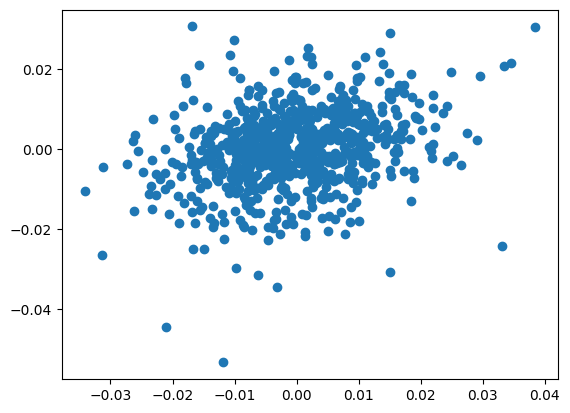

In [623]:
plt.scatter(tlt_daily['TLT'], gld_daily['GLD'])
plt.show
correlation_gld = st.pearsonr(tlt_daily['TLT'], gld_daily['GLD'])
print(f"The correlation between both factors is {round(correlation_gld[0],2)}")

In [624]:
correlation_gld

PearsonRResult(statistic=0.2859397481514928, pvalue=2.1846649294829387e-16)

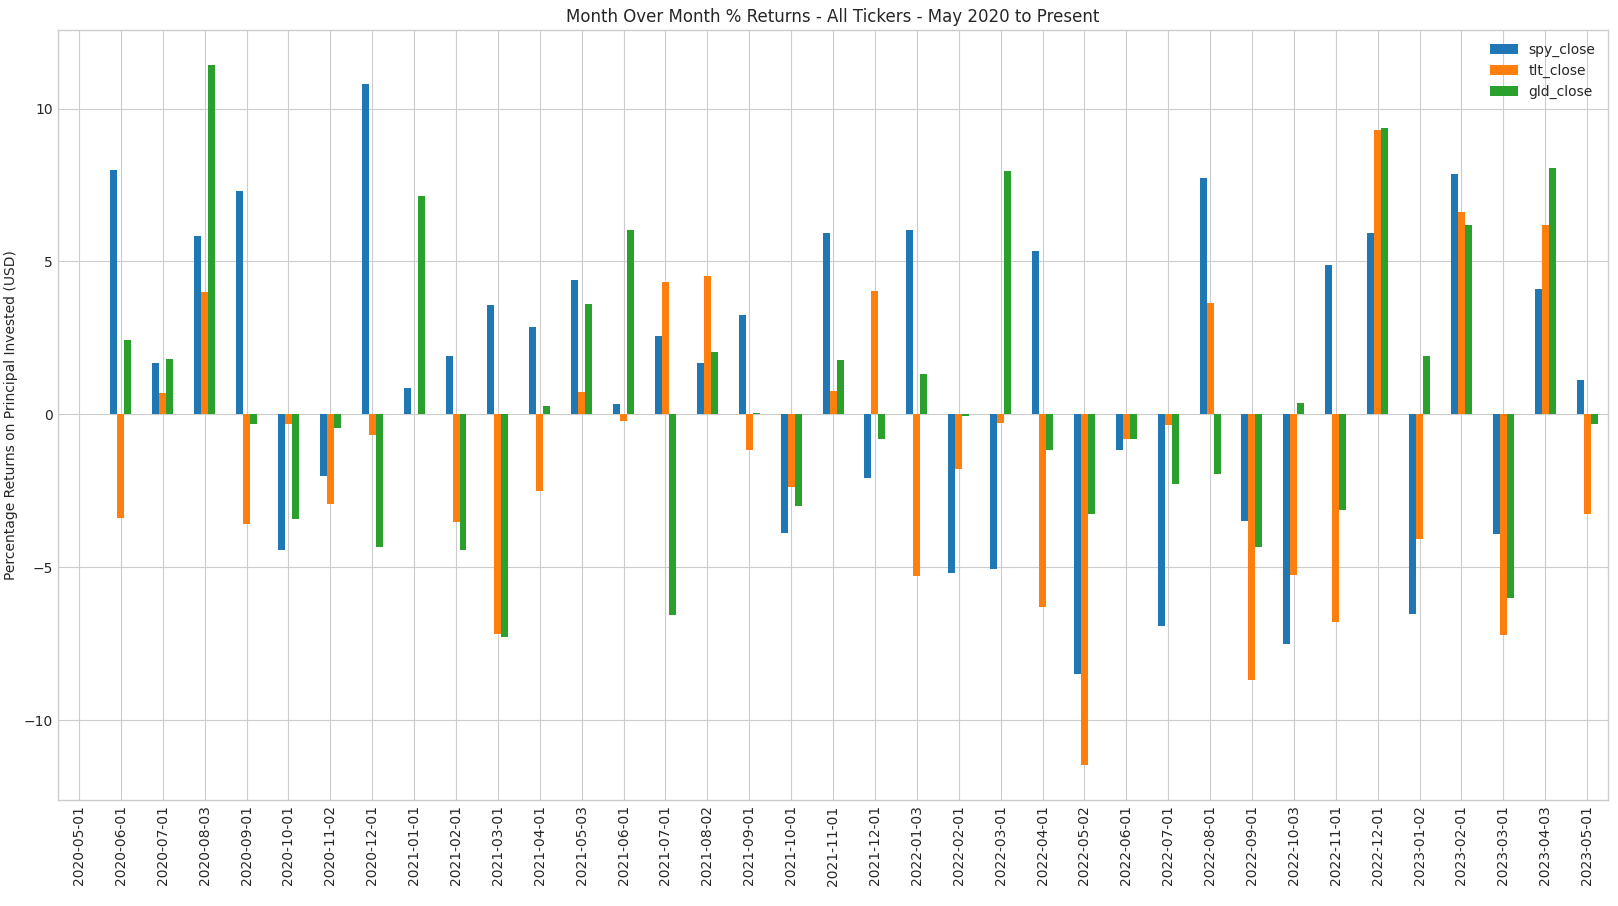

In [625]:
# Overlay of percentage returns 
with plt.style.context('seaborn-whitegrid'):
    ax = (df_concat*100).plot(y=['spy_close','tlt_close','gld_close'], kind='bar', figsize=(20,10), legend=True, title="Month Over Month % Returns - All Tickers - May 2020 to Present");
#     (spy_pct*100).plot(ax=ax, legend=True)
#     (gld_pct*100).plot(ax=ax, legend=True)
#     (tlt_pct*100).plot(ax=ax, legend=True)

    ax.set(ylabel='Percentage Returns on Principal Invested (USD)',
           xlabel=' ')
#     ax.set_xlim('2020-04', days_after_xlim_pct)
#     plt.legend(loc=(.93,.8625))
    plt.savefig("Images/OverlayMoMPercentageReturns.png");

In [626]:
tlt_pct.max()

0.09290069236333576

In [627]:
gld_pct.max()

0.11415196254951376

In [628]:
spy_pct.max()

0.10796813955601303

In [629]:
tlt_pct.min()

-0.11482096993503543

In [630]:
gld_pct.min()

-0.0728921540492452

In [631]:
spy_pct.min()

-0.084871500485737

In [632]:
btc_chg.max()

close    0.594222
dtype: float64

In [633]:
btc_chg.min()

close   -0.355927
dtype: float64

In [634]:
# max_df = pd.DataFrame

In [635]:
# max_df.columns = [['gld_max','spy_max','tlt_max']]
# max_df

In [636]:
# max_df['gld_max'] = gld_pct.max()
# max_df

In [637]:
stock_df

symbol  timestamp    open      high       low    close      volume  \
0       GLD 2020-04-08  155.91  155.9400  154.5900  154.650   7600804.0   
1       GLD 2020-04-09  158.08  159.0800  157.2100  158.580  18123039.0   
2       GLD 2020-04-13  159.17  162.3800  158.6250  161.410  20549213.0   
3       GLD 2020-04-14  162.73  164.4200  161.7800  162.660  17095086.0   
4       GLD 2020-04-15  161.80  162.5400  160.8061  162.000  12141890.0   
...     ...        ...     ...       ...       ...      ...         ...   
2377    TLT 2023-05-26  100.12  101.1733  100.0000  101.090  16855799.0   
2378    TLT 2023-05-30  101.40  102.2400  101.2500  102.100  23129762.0   
2379    TLT 2023-05-31  101.99  103.1800  101.8700  102.990  23787034.0   
2380    TLT 2023-06-01  103.28  103.6300  102.6300  103.120  20737125.0   
2381    TLT 2023-06-02  103.00  103.0650  102.2500  102.305   7671516.0   

      trade_count        vwap  
0         60704.0  155.233884  
1        140239.0  158.255634  
2        140401.0  160.906373  
3        146336.0  163.197557  
4         95518.0  161.749049  
...           ...         ...  
2377     100182.0  100.648808  
2378     124598.0  101.850035  
2379     128768.0  102.605426  
2380     106620.0  103.068916  
2381      50357.0  102.559744  

[2382 rows x 9 columns]

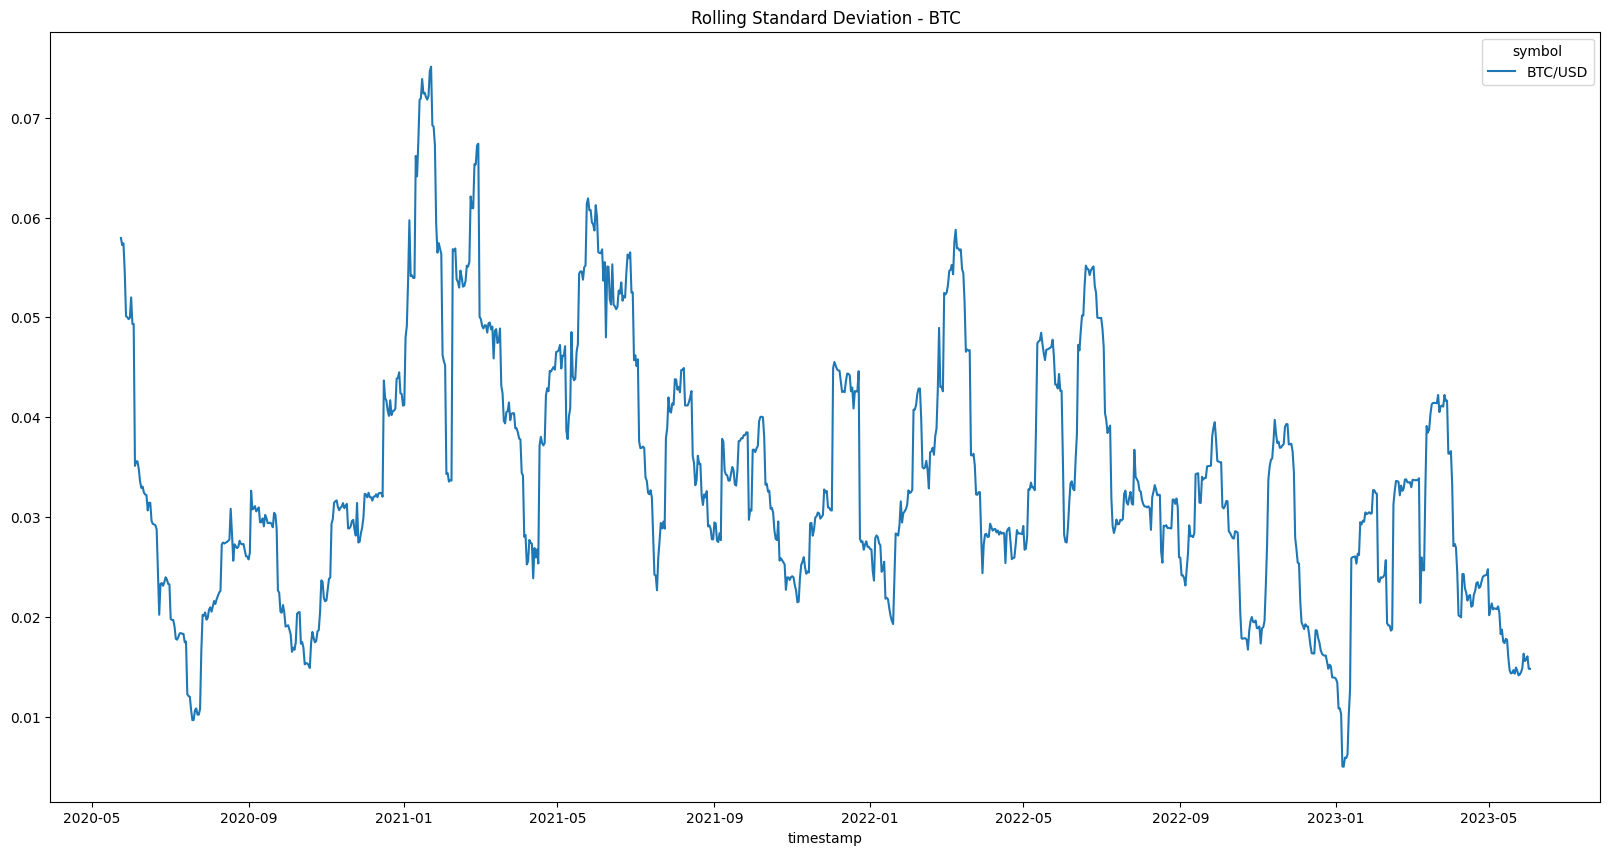

In [638]:
# Calculate the rolling standard deviation for BTC using a 21-day window
btc_rolling = btc_daily.rolling(window=21).std().plot(figsize=(20,10), legend=True, title="Rolling Standard Deviation - BTC")

# Plot the rolling standard deviation
btc_rolling;
plt.savefig("Images/RollingSTD_alpaca.png")

In [639]:
# !pip install yfinance

In [640]:
import yfinance as yf

btc_data = yf.Ticker("BTC-USD")

hist = btc_data.history(period="11y")

hist

Open          High           Low  \
Date                                                                  
2014-09-17 00:00:00+00:00    465.864014    468.174011    452.421997   
2014-09-18 00:00:00+00:00    456.859985    456.859985    413.104004   
2014-09-19 00:00:00+00:00    424.102997    427.834991    384.532013   
2014-09-20 00:00:00+00:00    394.673004    423.295990    389.882996   
2014-09-21 00:00:00+00:00    408.084991    412.425995    393.181000   
...                                 ...           ...           ...   
2023-05-29 00:00:00+00:00  28075.591797  28432.039062  27563.876953   
2023-05-30 00:00:00+00:00  27745.123047  28044.759766  27588.501953   
2023-05-31 00:00:00+00:00  27700.529297  27831.677734  26866.453125   
2023-06-01 00:00:00+00:00  27218.412109  27346.105469  26671.720703   
2023-06-02 00:00:00+00:00  26816.748047  27198.091797  26574.644531   

                                  Close       Volume  Dividends  Stock Splits  
Date                                                                           
2014-09-17 00:00:00+00:00    457.334015     21056800        0.0           0.0  
2014-09-18 00:00:00+00:00    424.440002     34483200        0.0           0.0  
2014-09-19 00:00:00+00:00    394.795990     37919700        0.0           0.0  
2014-09-20 00:00:00+00:00    408.903992     36863600        0.0           0.0  
2014-09-21 00:00:00+00:00    398.821014     26580100        0.0           0.0  
...                                 ...          ...        ...           ...  
2023-05-29 00:00:00+00:00  27745.884766  15181308984        0.0           0.0  
2023-05-30 00:00:00+00:00  27702.349609  13251081851        0.0           0.0  
2023-05-31 00:00:00+00:00  27219.658203  15656371534        0.0           0.0  
2023-06-01 00:00:00+00:00  26819.972656  14678970415        0.0           0.0  
2023-06-02 00:00:00+00:00  27071.044922  15519698944        0.0           0.0  

[3181 rows x 7 columns]

In [641]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3181 entries, 2014-09-17 00:00:00+00:00 to 2023-06-02 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3181 non-null   float64
 1   High          3181 non-null   float64
 2   Low           3181 non-null   float64
 3   Close         3181 non-null   float64
 4   Volume        3181 non-null   int64  
 5   Dividends     3181 non-null   float64
 6   Stock Splits  3181 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 198.8 KB


In [642]:
hist_reset = hist.reset_index()
hist_reset

Date          Open          High           Low  \
0    2014-09-17 00:00:00+00:00    465.864014    468.174011    452.421997   
1    2014-09-18 00:00:00+00:00    456.859985    456.859985    413.104004   
2    2014-09-19 00:00:00+00:00    424.102997    427.834991    384.532013   
3    2014-09-20 00:00:00+00:00    394.673004    423.295990    389.882996   
4    2014-09-21 00:00:00+00:00    408.084991    412.425995    393.181000   
...                        ...           ...           ...           ...   
3176 2023-05-29 00:00:00+00:00  28075.591797  28432.039062  27563.876953   
3177 2023-05-30 00:00:00+00:00  27745.123047  28044.759766  27588.501953   
3178 2023-05-31 00:00:00+00:00  27700.529297  27831.677734  26866.453125   
3179 2023-06-01 00:00:00+00:00  27218.412109  27346.105469  26671.720703   
3180 2023-06-02 00:00:00+00:00  26816.748047  27198.091797  26574.644531   

             Close       Volume  Dividends  Stock Splits  
0       457.334015     21056800        0.0           0.0  
1       424.440002     34483200        0.0           0.0  
2       394.795990     37919700        0.0           0.0  
3       408.903992     36863600        0.0           0.0  
4       398.821014     26580100        0.0           0.0  
...            ...          ...        ...           ...  
3176  27745.884766  15181308984        0.0           0.0  
3177  27702.349609  13251081851        0.0           0.0  
3178  27219.658203  15656371534        0.0           0.0  
3179  26819.972656  14678970415        0.0           0.0  
3180  27071.044922  15519698944        0.0           0.0  

[3181 rows x 8 columns]

In [643]:
hist_reset['Date'] = hist_reset['Date'].dt.date
hist_reset.head()

Date        Open        High         Low       Close    Volume  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  21056800   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  34483200   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  37919700   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  36863600   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  26580100   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0

In [644]:
# Grabbing subset of timestamp and closing prices 
btc_sub = hist_reset[['Date', 'Close']].set_index('Date')
btc_sub.head()

Close
Date                  
2014-09-17  457.334015
2014-09-18  424.440002
2014-09-19  394.795990
2014-09-20  408.903992
2014-09-21  398.821014

In [645]:
# Calculating month over month pct change
btc_c = btc_sub.pct_change()
btc_c.head()

Close
Date                
2014-09-17       NaN
2014-09-18 -0.071926
2014-09-19 -0.069843
2014-09-20  0.035735
2014-09-21 -0.024659

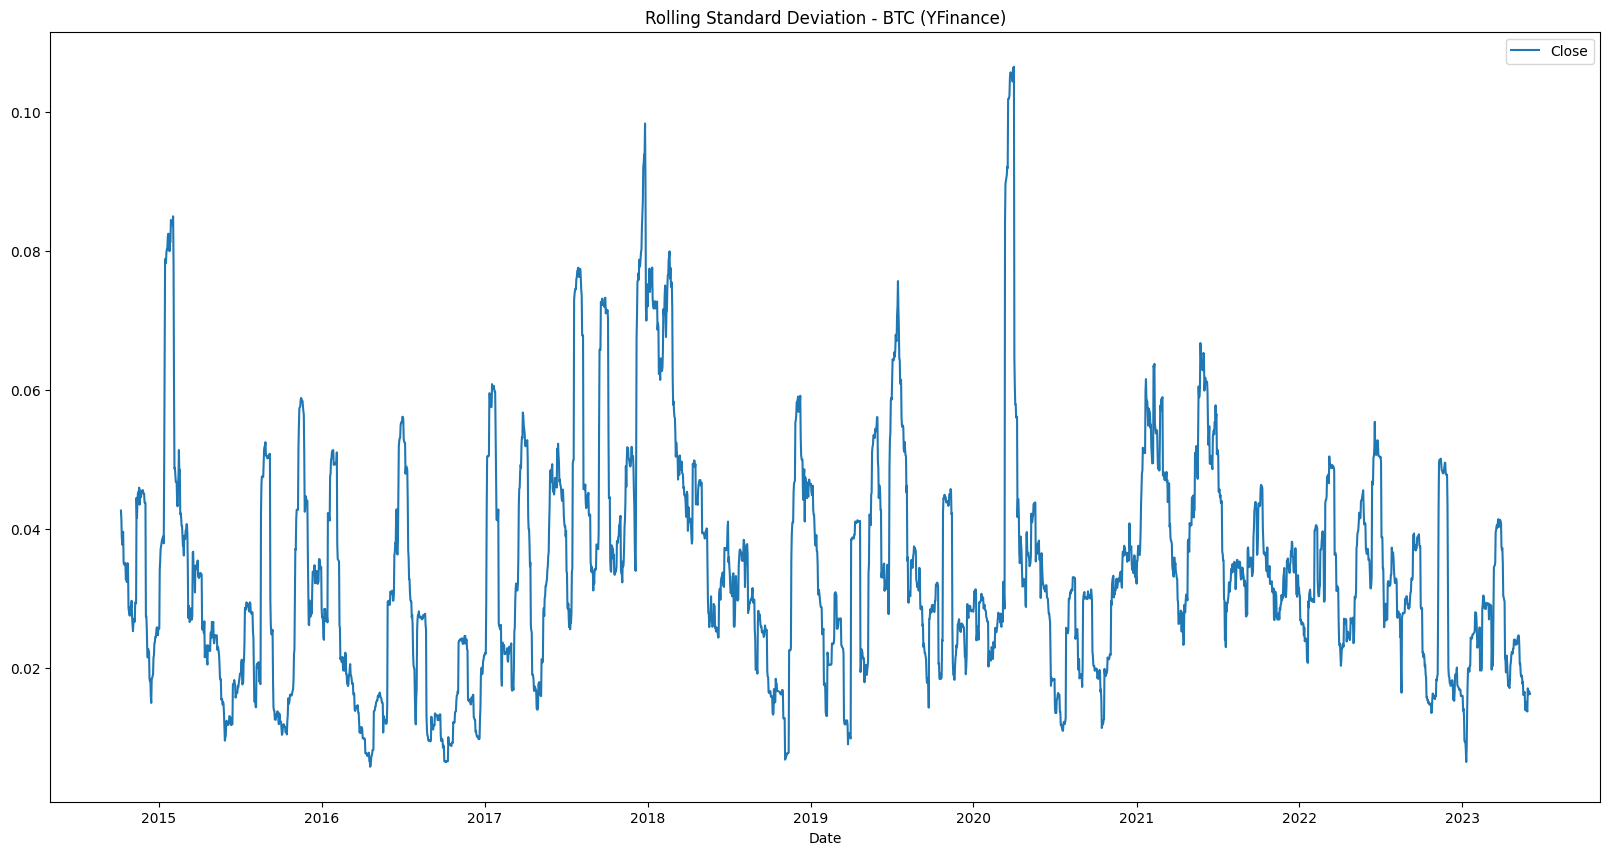

In [646]:
# Calculate the rolling standard deviation for BTC using a 21-day window
btc_roll = btc_c.rolling(window=21).std().plot(figsize=(20,10), legend=True, title="Rolling Standard Deviation - BTC (YFinance)")

# Plot the rolling standard deviation
btc_roll;
plt.savefig("Images/RollingSTD_yfinance.png")

In [647]:
yf_data = yf.download("BTC-USD", start="2011-01-01", end="2012-01-01")
yf_data

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BTC-USD: Data doesn't exist for startDate = 1293840000, endDate = 1325376000


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []

In [648]:
# !pip install quandl

In [649]:
import quandl


In [650]:
# Save API Key for Quandl to Access
# quandl.save_key("api_key")
# print(quandl.ApiConfig.api_key)

In [651]:
# Import API Key securely
quandl.read_key()

In [652]:
# Grabbing BTC Data from Quandl
data_q = quandl.get('BCHAIN/MKPRU')  # Format is: `DATABASE_CODE/DATASET_CODE`
data_q

Value
Date                
2009-01-02      0.00
2009-01-03      0.00
2009-01-04      0.00
2009-01-05      0.00
2009-01-06      0.00
...              ...
2023-05-29  28082.70
2023-05-30  27744.66
2023-05-31  27704.00
2023-06-01  27213.71
2023-06-02  26814.77

[5265 rows x 1 columns]

In [653]:
data_q.isnull().sum()

Value    0
dtype: int64

In [654]:
# Calculating month over month pct change
btc_q = data_q.pct_change()
btc_q

Value
Date                
2009-01-02       NaN
2009-01-03       NaN
2009-01-04       NaN
2009-01-05       NaN
2009-01-06       NaN
...              ...
2023-05-29  0.045008
2023-05-30 -0.012037
2023-05-31 -0.001466
2023-06-01 -0.017697
2023-06-02 -0.014660

[5265 rows x 1 columns]

In [655]:
btc_qna = btc_q.dropna()
btc_qna

Value
Date                
2010-08-16       inf
2010-08-17 -1.000000
2010-08-18       inf
2010-08-19 -0.030523
2010-08-20  0.049475
...              ...
2023-05-29  0.045008
2023-05-30 -0.012037
2023-05-31 -0.001466
2023-06-01 -0.017697
2023-06-02 -0.014660

[4674 rows x 1 columns]

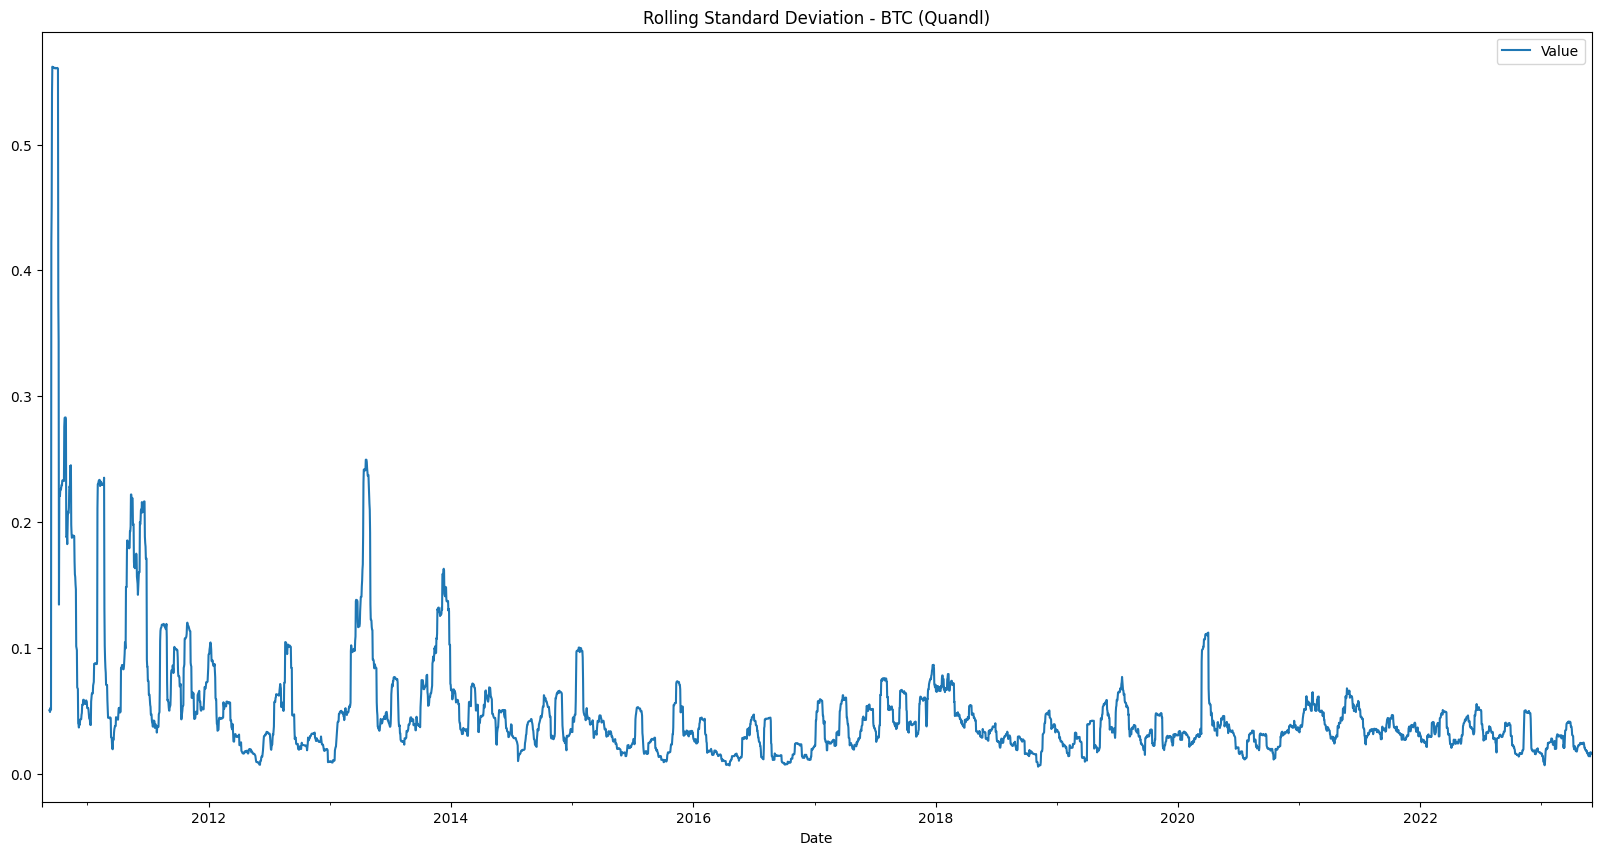

In [656]:
# Calculate the rolling standard deviation for BTC using a 21-day window
btc_rolled = btc_qna.rolling(window=21).std().plot(figsize=(20,10), legend=True, title="Rolling Standard Deviation - BTC (Quandl)")

# Plot the rolling standard deviation
btc_rolled;
plt.savefig("Images/RollingSTD_quandl.png")

In [657]:
data_slice = data_q['2010-09-15':'2023']
data_slice.head()

Value
Date                
2010-09-15  0.061900
2010-09-16  0.150000
2010-09-17  0.060900
2010-09-18  0.062599
2010-09-19  0.060000

In [658]:
# Calculating month over month pct change
btc_cambio = data_slice.pct_change()
btc_cambio.head()

Value
Date                
2010-09-15       NaN
2010-09-16  1.423263
2010-09-17 -0.594000
2010-09-18  0.027898
2010-09-19 -0.041518

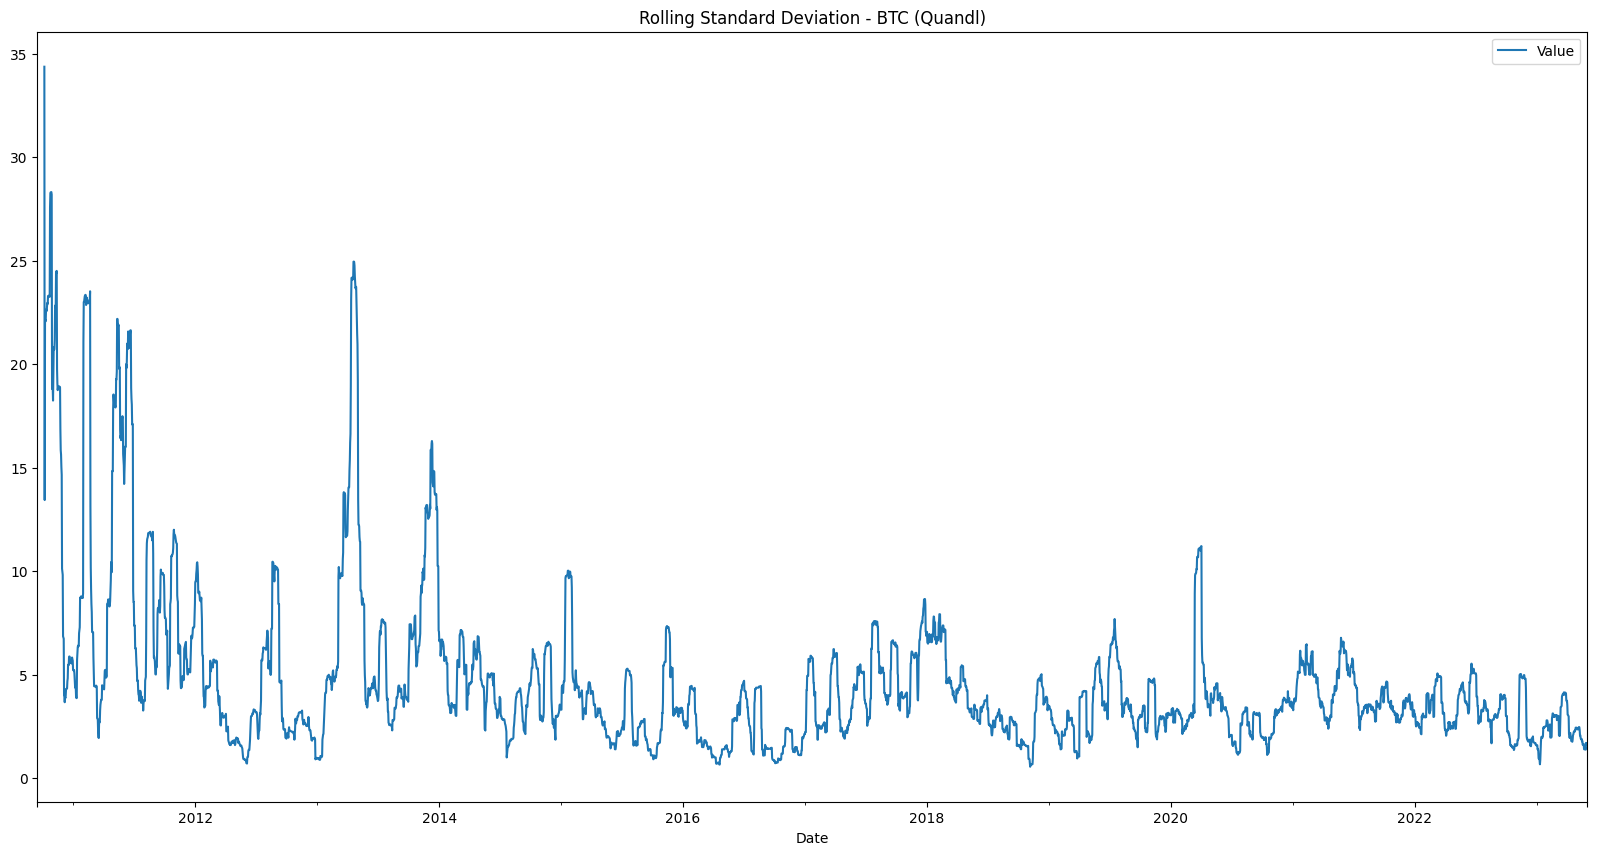

In [659]:
# Calculate the rolling standard deviation for BTC using a 21-day window
btc_rolls = (btc_cambio*100).rolling(window=21).std().plot(figsize=(20,10), legend=True, title="Rolling Standard Deviation - BTC (Quandl)")

# Plot the rolling standard deviation
btc_rolls;
plt.savefig("Images/RollingSTD_quandl_sept.png")

In [660]:
# Grabbing last 30 days
btc_last_30 = btc_df.tail(30)
btc_last_30.head()

symbol  timestamp      open      high       low     close      volume  \
1091  BTC/USD 2023-05-04  29151.48  29591.80  28700.00  29284.95  6218.31082   
1092  BTC/USD 2023-05-05  29288.42  29912.14  28820.00  29517.24  5798.31466   
1093  BTC/USD 2023-05-06  29517.24  29618.00  28500.00  29075.99  4244.21423   
1094  BTC/USD 2023-05-07  29075.99  29389.88  28820.75  28854.43  4516.99249   
1095  BTC/USD 2023-05-08  28857.50  28923.57  27669.40  28187.28  6996.74993   

      trade_count          vwap  
1091     139711.0  29071.495296  
1092     121069.0  29459.141699  
1093      90299.0  29082.977135  
1094      92117.0  29130.332211  
1095     136347.0  28166.902116

In [661]:
# Subset of timestamp and close
btc_30 = btc_last_30[['timestamp','close']]
btc_30.head()

timestamp     close
1091 2023-05-04  29284.95
1092 2023-05-05  29517.24
1093 2023-05-06  29075.99
1094 2023-05-07  28854.43
1095 2023-05-08  28187.28

In [662]:
# Setting timestamp as index
btc_30_index = btc_30.set_index('timestamp')
btc_30_index.head()

close
timestamp           
2023-05-04  29284.95
2023-05-05  29517.24
2023-05-06  29075.99
2023-05-07  28854.43
2023-05-08  28187.28

In [663]:
# Running daily percentage change
btc_last_pct = btc_30_index.pct_change()
btc_last_pct.head()

close
timestamp           
2023-05-04       NaN
2023-05-05  0.007932
2023-05-06 -0.014949
2023-05-07 -0.007620
2023-05-08 -0.023121

In [664]:
# Checking info
btc_last_pct.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2023-05-04 to 2023-06-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   29 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


In [665]:
# Convert index back to string to prep for plotting
btc_last_pct.index = btc_last_pct.index.strftime("%Y-%m-%d")
btc_last_pct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 2023-05-04 to 2023-06-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   29 non-null     float64
dtypes: float64(1)
memory usage: 480.0+ bytes


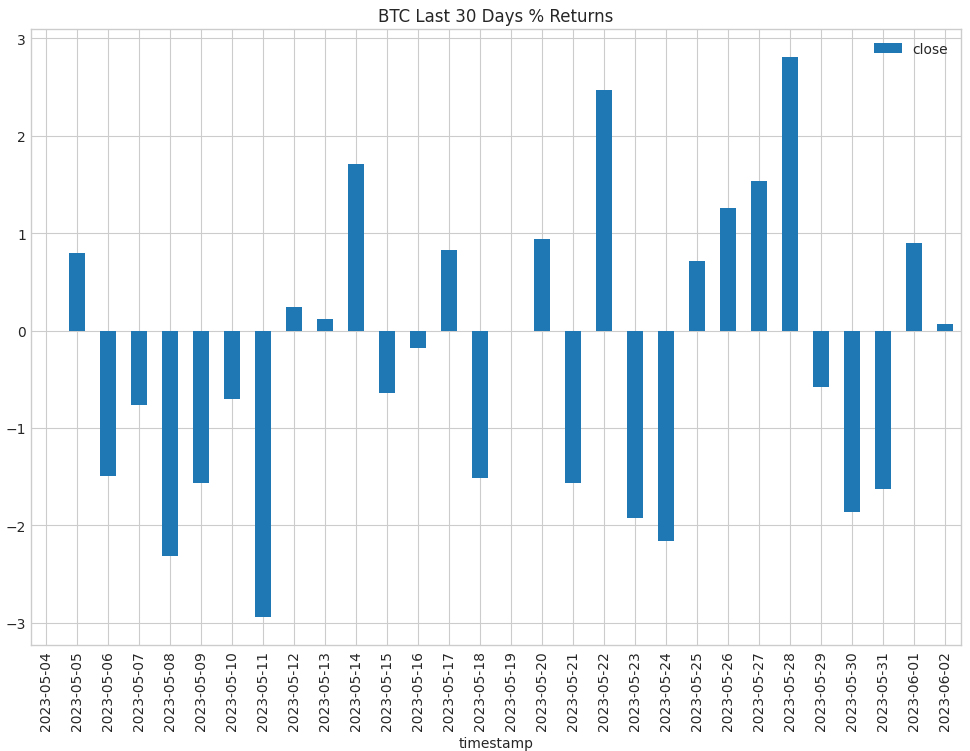

In [666]:
# Plot performance in last 30 days percentage change and save to Images
with plt.style.context('seaborn-whitegrid'):
    (btc_last_pct*100).plot(kind='bar', figsize=(12,8), legend=True, title="BTC Last 30 Days % Returns");
    plt.savefig("Images/BTCDailyPercentReturns.png")

In [667]:
import plotly.express as px

In [668]:
# Comparing Plotly
fig = px.bar(btc_last_pct*100, 
  y="close",
  x=btc_last_pct.index,
  title="BTC Last 30 Days % Returns",
  template="simple_white",
  labels={"close": "Daily Change (%)"},
  width=900, 
  height=800,
            )

fig.update_xaxes(title_text='Days', dtick="d1")

fig.update_layout(title_x=0.5, xaxis_tickformat='%d-%b')

# fig.write_image("Images/plotly_btc_last_30.png")

In [669]:
btc_nov_low = btc_df.set_index('timestamp')
btc_nov_low.head()

symbol    open    high     low   close  volume  trade_count  \
timestamp                                                                  
2020-04-08  BTC/USD  7314.0  7314.0  7314.0  7314.0  0.0001          1.0   
2020-04-14  BTC/USD  7101.5  7101.5  7100.0  7100.0  0.0002          2.0   
2020-04-22  BTC/USD  7118.5  7118.5  7118.5  7118.5  0.0001          1.0   
2020-04-28  BTC/USD  7748.5  7836.0  7748.5  7836.0  0.0840          2.0   
2020-04-30  BTC/USD  8829.0  8829.0  8653.0  8653.0  0.0134          3.0   

                  vwap  
timestamp               
2020-04-08  7314.00000  
2020-04-14  7100.75000  
2020-04-22  7118.50000  
2020-04-28  7835.68750  
2020-04-30  8715.80597

In [670]:
btc_seit = btc_nov_low['close']
btc_seit.head()

timestamp
2020-04-08    7314.0
2020-04-14    7100.0
2020-04-22    7118.5
2020-04-28    7836.0
2020-04-30    8653.0
Name: close, dtype: float64

In [671]:
btc_nov_index = btc_seit['2022-11-21':]
btc_nov_index.head()

timestamp
2022-11-21    15781.17
2022-11-22    16445.38
2022-11-23    16638.24
2022-11-24    16347.57
2022-11-25    16615.59
Name: close, dtype: float64

In [672]:
# btc_365.min()

In [673]:
# btc_365[btc_365['close'] == 15781.17]

In [674]:
btc_nov_pct = btc_nov_index.pct_change()
btc_nov_pct.head()

timestamp
2022-11-21         NaN
2022-11-22    0.042089
2022-11-23    0.011727
2022-11-24   -0.017470
2022-11-25    0.016395
Name: close, dtype: float64

In [675]:
# Up off November lows
btc_nov_cumprod = (1 + btc_nov_pct).cumprod()
# btc_prod_annotation = (btc_nov_cumprod.iloc[-1][0]*100).round().astype(int)
btc_nov_round = round((btc_nov_cumprod*100)-100,2)
btc_nov_round.head()

timestamp
2022-11-21     NaN
2022-11-22    4.21
2022-11-23    5.43
2022-11-24    3.59
2022-11-25    5.29
Name: close, dtype: float64

In [676]:
# Plotly - BTC off November lows line chart
fig = px.line(btc_nov_round, 
  y="close",
  x=btc_nov_round.index,
  title="BTC - % Returns Off November Lows",
  template="simple_white",
  labels={"close": "Percentage Change"},
  width=900, 
  height=800,
            )

fig.update_xaxes(title_text='')

fig.update_layout(title_x=0.5)

# fig.add_annotation( # add a text callout with arrow
#     text="92%!!!", x="2023-04-11", y=97, arrowhead=1, showarrow=True
# )

# fig.write_image("Images/plotly_btc_off_nov_low.png")

In [677]:
new_q = data_q['2010-08-18':]
new_q

Value
Date                  
2010-08-18      0.0688
2010-08-19      0.0667
2010-08-20      0.0700
2010-08-21      0.0664
2010-08-22      0.0660
...                ...
2023-05-29  28082.7000
2023-05-30  27744.6600
2023-05-31  27704.0000
2023-06-01  27213.7100
2023-06-02  26814.7700

[4672 rows x 1 columns]

In [678]:
btc_alltime_pct = new_q.pct_change()
btc_alltime_pct.head()

Value
Date                
2010-08-18       NaN
2010-08-19 -0.030523
2010-08-20  0.049475
2010-08-21 -0.051429
2010-08-22 -0.006024

In [679]:
# All Time Returns
btc_alltime_cumprod = (1 + btc_alltime_pct).cumprod()
# btc_prod_annotation = (btc_nov_cumprod.iloc[-1][0]*100).round().astype(int)
btc_alltime_round = round((btc_alltime_cumprod*100)-100,2)
btc_alltime_round.tail()

Value
Date                   
2023-05-29  40817777.91
2023-05-30  40326440.70
2023-05-31  40267341.86
2023-06-01  39554711.05
2023-06-02  38974856.40

In [680]:
new_2010 = data_q['2010-08-18':'2010-12-31']
new_2010.head()

Value
Date              
2010-08-18  0.0688
2010-08-19  0.0667
2010-08-20  0.0700
2010-08-21  0.0664
2010-08-22  0.0660

In [681]:
btc_2010_pct = new_2010.pct_change()
btc_2010_pct.head()

Value
Date                
2010-08-18       NaN
2010-08-19 -0.030523
2010-08-20  0.049475
2010-08-21 -0.051429
2010-08-22 -0.006024

In [682]:
# 2010 Returns
btc_2010_cumprod = (1 + btc_2010_pct).cumprod()
# btc_prod_annotation = (btc_nov_cumprod.iloc[-1][0]*100).round().astype(int)
btc_2010_round = round((btc_2010_cumprod*100)-100,2)
btc_2010_round.head()

Value
Date             
2010-08-18    NaN
2010-08-19  -3.05
2010-08-20   1.74
2010-08-21  -3.49
2010-08-22  -4.07

In [683]:
new_q

Value
Date                  
2010-08-18      0.0688
2010-08-19      0.0667
2010-08-20      0.0700
2010-08-21      0.0664
2010-08-22      0.0660
...                ...
2023-05-29  28082.7000
2023-05-30  27744.6600
2023-05-31  27704.0000
2023-06-01  27213.7100
2023-06-02  26814.7700

[4672 rows x 1 columns]

In [684]:
new_q.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4672 entries, 2010-08-18 to 2023-06-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   4672 non-null   float64
dtypes: float64(1)
memory usage: 73.0 KB


In [685]:
new_q_pct = new_q.pct_change()*100
new_q_pct.head()

Value
Date                
2010-08-18       NaN
2010-08-19 -3.052326
2010-08-20  4.947526
2010-08-21 -5.142857
2010-08-22 -0.602410

In [686]:
round(new_q_pct.describe(),2)

Value
count  4671.00
mean      0.49
std       7.11
min     -64.63
25%      -1.48
50%       0.05
75%       1.93
max     191.67

In [687]:
fig_daily = px.box(new_q_pct, 
  x="Value", 
  title="Distribution of Daily % Returns Box Plot")

fig_daily.update_xaxes(title_text='Daily % Change')

fig_daily.update_layout(title_x=0.5)

In [688]:
# make count of positive and negative dailies to see breakdown
new_q_pos = new_q_pct[new_q_pct['Value'] > 0].count()
new_q_pos

Value    2405
dtype: int64

In [689]:
new_q_neg = new_q_pct[new_q_pct['Value'] < 0].count()
new_q_neg

Value    2230
dtype: int64

In [690]:
new_q_pos / new_q_neg

Value    1.078475
dtype: float64

In [691]:
new_q_pie = [new_q_pos,new_q_neg]
new_q_pie

[Value    2405
 dtype: int64,
 Value    2230
 dtype: int64]

In [692]:
new_q_pct_loc = new_q_pct.loc[new_q_pct['Value'] > 0,:]
new_q_pct_loc

Value
Date                
2010-08-20  4.947526
2010-08-23  6.060606
2010-08-26  5.264741
2010-08-30  8.283333
2010-09-02  5.666667
...              ...
2023-05-24  1.390020
2023-05-26  0.569407
2023-05-27  0.915690
2023-05-28  0.574257
2023-05-29  4.500844

[2405 rows x 1 columns]

In [693]:
# pos = []
# neg = []

# for x in new_q_pct['Value']:
#     if x > 0:
#         pos.append(x)
#     else:
#         neg.append(x)
    

    
# pos

In [694]:
# pie_df = pd.DataFrame({'Pos_Values': [pos], 'Neg_Values': [neg]})
# pie_df

In [695]:
# # Comparing Plotly
# fig_pie = px.pie(pie_df)

# fig_pie
# #   y="Value",
# #   x=yearly_pct.index,
# #   title="BTC Annual % Returns",
# #   template="simple_white",
# #   labels={"Value": "Annual Change (%)"},
# #   width=900, 
# #   height=600,
# #             )

# # fig.update_xaxes(title_text='Year End')

# # fig.update_layout(title_x=0.5)

# # fig.write_image("Images/plotly_btc_last_30.png")

In [696]:
# make subplots of daily % change box plots grouped by year to see the evolution over time

In [697]:
new_reset = new_q.reset_index()
new_reset.head()

Date   Value
0 2010-08-18  0.0688
1 2010-08-19  0.0667
2 2010-08-20  0.0700
3 2010-08-21  0.0664
4 2010-08-22  0.0660

In [698]:
new_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4672 entries, 0 to 4671
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4672 non-null   datetime64[ns]
 1   Value   4672 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 73.1 KB


In [699]:
# Count of trading days per year
new_group = new_reset['Value'].groupby(new_reset['Date'].dt.year).count()
new_group

Date
2010    136
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    153
Name: Value, dtype: int64

In [700]:
# Attempting to get groupby year and pct change on value column but wasn't really working, found solution
# below with resample and apply
new_reset.groupby(new_reset['Date'].dt.year)['Value'].pct_change()

0            NaN
1      -0.030523
2       0.049475
3      -0.051429
4      -0.006024
          ...   
4667    0.045008
4668   -0.012037
4669   -0.001466
4670   -0.017697
4671   -0.014660
Name: Value, Length: 4672, dtype: float64

In [701]:
yearly = new_q.resample('A').apply(lambda x: x[-1])
yearly

Value
Date                    
2010-12-31      0.299998
2011-12-31      4.470000
2012-12-31     13.570000
2013-12-31    746.900000
2014-12-31    315.700000
2015-12-31    428.230000
2016-12-31    958.120000
2017-12-31  14165.575000
2018-12-31   3791.545833
2019-12-31   7219.600000
2020-12-31  28856.590000
2021-12-31  47132.960000
2022-12-31  16599.690000
2023-12-31  26814.770000

In [702]:
yearly_pct = round(yearly.pct_change(),2)
yearly_pct

Value
Date             
2010-12-31    NaN
2011-12-31  13.90
2012-12-31   2.04
2013-12-31  54.04
2014-12-31  -0.58
2015-12-31   0.36
2016-12-31   1.24
2017-12-31  13.78
2018-12-31  -0.73
2019-12-31   0.90
2020-12-31   3.00
2021-12-31   0.63
2022-12-31  -0.65
2023-12-31   0.62

In [703]:
# Comparing Plotly
fig_annual = px.bar(yearly_pct, 
  y="Value",
#   x=yearly_pct.index,
  text_auto='.0%', #show individual % values
  title="BTC Annual % Returns",
  template="simple_white",
  labels={"Value": "Annual Change (%)"},
  width=900, 
  height=600,
            )

fig_annual.update_xaxes(title_text='Year End')

fig_annual.update_layout(title_x=0.5, yaxis={
        'tickformat': '.0%' #update y axis with numbers as %
    })

fig_annual.update_traces(textangle=0, textposition="outside", cliponaxis=False)

# fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)

today = dt.date.today()

# HOW TO ADD A FOOTNOTE TO BOTTOM LEFT OF PAGE
fig_annual.add_annotation(
    text = (f"@jordangilmartin / {today}<br>Source: Quandl"),
    showarrow=False,
    x = 0,
    y = -0.15,
    xref='paper',
    yref='paper', 
    xanchor='left',
    yanchor='bottom',
    xshift=-1,
    yshift=-5,
#     , font=dict(size=10, color="grey")
    align="left",
    )


# fig_annual.write_image("Images/plotly_btc_last_30.png")

In [704]:
yearly_pct_slice = yearly_pct[:-1]
yearly_pct_slice

Value
Date             
2010-12-31    NaN
2011-12-31  13.90
2012-12-31   2.04
2013-12-31  54.04
2014-12-31  -0.58
2015-12-31   0.36
2016-12-31   1.24
2017-12-31  13.78
2018-12-31  -0.73
2019-12-31   0.90
2020-12-31   3.00
2021-12-31   0.63
2022-12-31  -0.65

In [705]:
yearly_pct_slice_tail = yearly_pct.tail(5)
yearly_pct_slice_tail

Value
Date             
2019-12-31   0.90
2020-12-31   3.00
2021-12-31   0.63
2022-12-31  -0.65
2023-12-31   0.62

In [706]:
# Comparing Plotly
fig_last_5_years = px.bar(yearly_pct_slice_tail, 
  y="Value",
  x=['2019','2020','2021','2022','2023'],
  text_auto='.0%', #show individual % values
  title="BTC Annual % Returns - Last 5 Years",
  template="simple_white",
  labels={"Value": "Annual Change (%)"},
  width=900, 
  height=600,
            )

fig_last_5_years.update_xaxes(title_text='')

fig_last_5_years.update_layout(title_x=0.5, yaxis={
        'tickformat': '.0%' #update y axis with numbers as %
    })

fig_last_5_years.update_layout(bargap=0.25) #Create more space between bars, bars slim down automatically

today = dt.date.today()

# HOW TO ADD A FOOTNOTE TO BOTTOM LEFT OF PAGE
fig_last_5_years.add_annotation(
    text = (f"@jordangilmartin / {today}<br>Source: Quandl"),
    showarrow=False,
    x = 0,
    y = -0.15,
    xref='paper',
    yref='paper', 
    xanchor='left',
    yanchor='bottom',
    xshift=-1,
    yshift=-5,
#     , font=dict(size=10, color="grey")
    align="left",
    )

# fig_last_5_years.write_image("Images/plotly_btc_last_5_years.png")

In [707]:
# # Filtering for month start dates
# btc_monthly = btc_df[btc_df['timestamp'].dt.is_month_start] 
# btc_monthly

In [708]:
# Grabbing month end using resample and apply
monthly = new_q.resample('BM').apply(lambda x: x[-1])
monthly

Value
Date                    
2010-08-31      0.064900
2010-09-30      0.061999
2010-10-29      0.191900
2010-11-30      0.280000
2010-12-31      0.299998
...                  ...
2023-02-28  23497.620000
2023-03-31  28033.060000
2023-04-28  29480.350000
2023-05-31  27704.000000
2023-06-30  26814.770000

[155 rows x 1 columns]

In [709]:
monthly_pct = round(monthly.pct_change()*100,2)
monthly_pct.head()

Value
Date              
2010-08-31     NaN
2010-09-30   -4.47
2010-10-29  209.52
2010-11-30   45.91
2010-12-31    7.14

In [710]:
round(monthly_pct.describe(),2)

Value
count  154.00
mean    16.01
std     54.51
min    -38.77
25%    -10.55
50%      5.20
75%     25.32
max    398.97

In [711]:
fig_box_monthly = px.box(monthly_pct[:'2023-04-30'], 
  x="Value",
  title="Bitcoin Box Plot - Distribution of Monthly % Returns Since 2010")

fig_box_monthly.update_xaxes(title_text='Monthly % Change')

fig_box_monthly.update_layout(title_x=0.5)

fig_box_monthly.add_annotation( # add a text callout with arrow
    text="2013", x=158, y=.05, arrowhead=1, showarrow=True
)

fig_box_monthly.add_annotation( # add a text callout with arrow
    text="2010", x=207, y=-.05, arrowhead=1, showarrow=True, ax=-10, ay=30
)

fig_box_monthly.add_annotation( # add a text callout with arrow
    text="2013", x=214, y=.05, arrowhead=1, showarrow=True, 
)

fig_box_monthly.add_annotation( # add a text callout with arrow
    text="2011", x=231, y=-.05, arrowhead=1, showarrow=True, ax=-10, ay=30
)

fig_box_monthly.add_annotation( # add a text callout with arrow
    text="2011", x=251, y=.05, arrowhead=1, showarrow=True, 
)

fig_box_monthly.add_annotation( # add a text callout with arrow
    text="2013", x=396, y=.05, arrowhead=1, showarrow=True, 
)

fig_box_monthly.add_annotation( # add a text callout with arrow
    text="<b>Outliers All Occurred 10+ Years Ago<b>", x=250, y=.3, showarrow=False
)

today = dt.date.today()

# HOW TO ADD A FOOTNOTE TO BOTTOM LEFT OF PAGE
fig_box_monthly.add_annotation(
    text = (f"@j_conor_g / {today}<br>Source: Quandl"),
    showarrow=False,
    x = 0,
    y = -0.15,
    xref='paper',
    yref='paper', 
    xanchor='left',
    yanchor='bottom',
    xshift=-1,
    yshift=-5,
#     , font=dict(size=10, color="grey")
    align="left",
    )



# fig_box_monthly.write_image("Images/plotly_btc_monthly_returns_dist.png")

In [712]:
# Checking dates of monthly outliers
monthly_sort = monthly_pct.sort_values('Value', ascending=False)
monthly_sort.head(10)

Value
Date              
2013-11-29  398.97
2011-05-31  253.05
2011-04-29  232.51
2011-01-31  216.67
2010-10-29  209.52
2013-03-29  160.91
2011-06-30   81.02
2017-05-31   71.71
2013-02-28   63.75
2013-10-31   60.02

In [713]:
# Grouping GLD by business month start; nth isolates by symbol
gld_group_df = stock_index.groupby(pd.Grouper(freq='BMS')).nth(0)
gld_group_df.head()

symbol      open    high     low   close      volume  trade_count  \
timestamp                                                                      
2020-04-01    GLD  155.9100  155.94  154.59  154.65   7600804.0      60704.0   
2020-05-01    GLD  157.9500  160.45  157.80  159.78  10914334.0      87024.0   
2020-06-01    GLD  162.9235  163.74  162.39  163.66   8155048.0      60202.0   
2020-07-01    GLD  167.0500  167.06  165.34  166.62  13214759.0      86821.0   
2020-08-03    GLD  185.0500  185.82  184.20  185.64  12896999.0      93696.0   

                  vwap  
timestamp               
2020-04-01  155.233884  
2020-05-01  159.380639  
2020-06-01  163.323352  
2020-07-01  166.229189  
2020-08-03  185.228945

In [714]:
gld_test = stock_index.groupby('symbol').nth(0)
gld_test

open    high       low   close       volume  trade_count        vwap
symbol                                                                        
GLD     155.91  155.94  154.5900  154.65    7600804.0      60704.0  155.233884
SPY     267.96  276.00  265.2542  274.00  153774487.0     950859.0  271.051454
TLT     165.11  166.19  164.1300  165.09   10147077.0      63686.0  165.217491

In [715]:
gld_loc = stock_index.loc[stock_index['symbol'] == 'GLD',:]
gld_loc[gld_loc.index == '2020-04-30']

symbol    open    high     low  close      volume  trade_count  \
timestamp                                                                   
2020-04-30    GLD  160.22  160.82  158.13  158.8  13633483.0     107884.0   

                  vwap  
timestamp               
2020-04-30  159.269773

In [716]:
gld_monthly2 = gld_loc.resample('BM').apply(lambda x: x[-1])
gld_monthly2.head()

symbol    open      high      low   close      volume  trade_count  \
timestamp                                                                       
2020-04-30    GLD  160.22  160.8200  158.130  158.80  13633483.0     107884.0   
2020-05-29    GLD  162.58  163.4000  162.320  162.91  12584009.0      70183.0   
2020-06-30    GLD  166.31  167.9906  166.185  167.37  12762597.0      84161.0   
2020-07-31    GLD  184.51  185.7501  184.165  185.56  15885010.0     107782.0   
2020-08-31    GLD  184.79  185.5300  184.280  184.82  10251152.0      71796.0   

                  vwap  
timestamp               
2020-04-30  159.269773  
2020-05-29  162.852059  
2020-06-30  167.268997  
2020-07-31  185.142863  
2020-08-31  184.986839

In [717]:
spy_loc = stock_index.loc[stock_index['symbol'] == 'SPY',:]
spy_loc[spy_loc.index == '2020-04-30']

symbol    open      high     low   close       volume  trade_count  \
timestamp                                                                       
2020-04-30    SPY  291.71  293.3239  288.59  290.63  123003721.0     650783.0   

                  vwap  
timestamp               
2020-04-30  290.584103

In [718]:
spy_monthly2 = spy_loc.resample('BM').apply(lambda x: x[-1])
spy_monthly2.head()

symbol    open      high     low     close       volume  \
timestamp                                                            
2020-04-30    SPY  291.71  293.3239  288.59  290.6300  123003721.0   
2020-05-29    SPY  302.46  304.9600  299.47  304.4900  119265702.0   
2020-06-30    SPY  304.01  310.2000  303.82  308.9400  113444772.0   
2020-07-31    SPY  325.90  326.6300  321.33  326.4000   85211555.0   
2020-08-31    SPY  350.35  351.3000  349.06  349.8206   66099183.0   

            trade_count        vwap  
timestamp                            
2020-04-30     650783.0  290.584103  
2020-05-29     667925.0  302.753666  
2020-06-30     523384.0  307.462538  
2020-07-31     448876.0  324.494578  
2020-08-31     322309.0  350.256348

In [719]:
tlt_loc = stock_index.loc[stock_index['symbol'] == 'TLT',:]
tlt_loc[tlt_loc.index == '2020-04-30']

symbol    open    high     low   close      volume  trade_count  \
timestamp                                                                    
2020-04-30    TLT  168.74  169.23  166.71  166.74  11606074.0      62765.0   

                  vwap  
timestamp               
2020-04-30  167.875507

In [720]:
tlt_monthly2 = tlt_loc.resample('BM').apply(lambda x: x[-1])
tlt_monthly2.head()

symbol    open      high      low   close      volume  trade_count  \
timestamp                                                                       
2020-04-30    TLT  168.74  169.2300  166.710  166.74  11606074.0      62765.0   
2020-05-29    TLT  162.71  164.0900  162.355  163.59  14662054.0      75454.0   
2020-06-30    TLT  165.23  165.2900  163.480  163.93  14841678.0      79244.0   
2020-07-31    TLT  170.15  171.4554  169.940  171.00   8886264.0      57269.0   
2020-08-31    TLT  161.60  163.2500  161.560  162.19  11388108.0      75800.0   

                  vwap  
timestamp               
2020-04-30  167.875507  
2020-05-29  163.264590  
2020-06-30  164.132873  
2020-07-31  170.685787  
2020-08-31  162.449506

In [721]:
# Revising column names to prep for join

gld_dict2 = {'close':'GLD'}

gld_monthly2 = gld_monthly2.rename(columns=gld_dict2)
gld_monthly2


tlt_dict2 = {'close':'TLT'}

tlt_monthly2 = tlt_monthly2.rename(columns=tlt_dict2)


spy_dict2 = {'close':'SPY'}

spy_monthly2 = spy_monthly2.rename(columns=spy_dict2)
spy_monthly2.head()


symbol    open      high     low       SPY       volume  \
timestamp                                                            
2020-04-30    SPY  291.71  293.3239  288.59  290.6300  123003721.0   
2020-05-29    SPY  302.46  304.9600  299.47  304.4900  119265702.0   
2020-06-30    SPY  304.01  310.2000  303.82  308.9400  113444772.0   
2020-07-31    SPY  325.90  326.6300  321.33  326.4000   85211555.0   
2020-08-31    SPY  350.35  351.3000  349.06  349.8206   66099183.0   

            trade_count        vwap  
timestamp                            
2020-04-30     650783.0  290.584103  
2020-05-29     667925.0  302.753666  
2020-06-30     523384.0  307.462538  
2020-07-31     448876.0  324.494578  
2020-08-31     322309.0  350.256348

In [722]:
new_q

Value
Date                  
2010-08-18      0.0688
2010-08-19      0.0667
2010-08-20      0.0700
2010-08-21      0.0664
2010-08-22      0.0660
...                ...
2023-05-29  28082.7000
2023-05-30  27744.6600
2023-05-31  27704.0000
2023-06-01  27213.7100
2023-06-02  26814.7700

[4672 rows x 1 columns]

In [723]:
data_q

Value
Date                
2009-01-02      0.00
2009-01-03      0.00
2009-01-04      0.00
2009-01-05      0.00
2009-01-06      0.00
...              ...
2023-05-29  28082.70
2023-05-30  27744.66
2023-05-31  27704.00
2023-06-01  27213.71
2023-06-02  26814.77

[5265 rows x 1 columns]

In [724]:
btc_resamp = data_q['2020-04-01':]
btc_resamp.head()

Value
Date               
2020-04-01  6428.28
2020-04-02  6652.87
2020-04-03  6809.11
2020-04-04  6741.67
2020-04-05  6871.69

In [725]:
btc_resamp2 = btc_resamp.resample('BM').apply(lambda x: x[-1])
btc_resamp2.tail()

Value
Date                
2023-02-28  23497.62
2023-03-31  28033.06
2023-04-28  29480.35
2023-05-31  27704.00
2023-06-30  26814.77

In [726]:
btc_dict2 = {'Value':'BTC'}

btc_resamp2 = btc_resamp2.rename(columns=btc_dict2)
btc_resamp2.head()

BTC
Date                
2020-04-30   8777.63
2020-05-29   9569.21
2020-06-30   9185.35
2020-07-31  11114.93
2020-08-31  11707.78

In [727]:
# Testing concat of gld and btc after resample, seems to work now
new_concat = pd.concat([btc_resamp2, gld_monthly2, spy_monthly2, tlt_monthly2], axis=1)
new_concat.tail()

BTC  symbol     open     high     low       GLD     volume  \
2023-02-28  23497.62     GLD  168.781  170.250  168.59  169.7800  6762197.0   
2023-03-31  28033.06     GLD  184.110  184.420  182.80  183.2200  7553499.0   
2023-04-28  29480.35     GLD  184.790  185.380  184.17  184.8000  6308223.0   
2023-05-31  27704.00     GLD  182.390  183.445  182.10  182.3200  8497893.0   
2023-06-30  26814.77     GLD  183.530  183.560  182.15  182.2099  3559320.0   

            trade_count        vwap  symbol  ...  trade_count        vwap  \
2023-02-28      49710.0  169.643931     SPY  ...     601272.0  397.419803   
2023-03-31      64073.0  183.503531     SPY  ...     690249.0  407.199127   
2023-04-28      50918.0  184.783307     SPY  ...     592226.0  414.377425   
2023-05-31      74220.0  182.673120     SPY  ...     665148.0  418.014552   
2023-06-30      35052.0  182.682100     SPY  ...     320331.0  425.893035   

            symbol    open     high      low      TLT      volume  \
2023-02-28     TLT  100.57  101.720  100.280  101.710  14956342.0   
2023-03-31     TLT  105.35  106.560  105.075  106.370  22338075.0   
2023-04-28     TLT  106.21  106.760  105.860  106.460  23824193.0   
2023-05-31     TLT  101.99  103.180  101.870  102.990  23787034.0   
2023-06-30     TLT  103.00  103.065  102.250  102.305   7671516.0   

            trade_count        vwap  
2023-02-28     100754.0  101.091431  
2023-03-31     125397.0  105.921266  
2023-04-28     128162.0  106.340339  
2023-05-31     128768.0  102.605426  
2023-06-30      50357.0  102.559744  

[5 rows x 25 columns]

In [728]:
new_concat = new_concat.dropna()
new_concat.tail()

BTC  symbol     open     high     low       GLD     volume  \
2023-02-28  23497.62     GLD  168.781  170.250  168.59  169.7800  6762197.0   
2023-03-31  28033.06     GLD  184.110  184.420  182.80  183.2200  7553499.0   
2023-04-28  29480.35     GLD  184.790  185.380  184.17  184.8000  6308223.0   
2023-05-31  27704.00     GLD  182.390  183.445  182.10  182.3200  8497893.0   
2023-06-30  26814.77     GLD  183.530  183.560  182.15  182.2099  3559320.0   

            trade_count        vwap  symbol  ...  trade_count        vwap  \
2023-02-28      49710.0  169.643931     SPY  ...     601272.0  397.419803   
2023-03-31      64073.0  183.503531     SPY  ...     690249.0  407.199127   
2023-04-28      50918.0  184.783307     SPY  ...     592226.0  414.377425   
2023-05-31      74220.0  182.673120     SPY  ...     665148.0  418.014552   
2023-06-30      35052.0  182.682100     SPY  ...     320331.0  425.893035   

            symbol    open     high      low      TLT      volume  \
2023-02-28     TLT  100.57  101.720  100.280  101.710  14956342.0   
2023-03-31     TLT  105.35  106.560  105.075  106.370  22338075.0   
2023-04-28     TLT  106.21  106.760  105.860  106.460  23824193.0   
2023-05-31     TLT  101.99  103.180  101.870  102.990  23787034.0   
2023-06-30     TLT  103.00  103.065  102.250  102.305   7671516.0   

            trade_count        vwap  
2023-02-28     100754.0  101.091431  
2023-03-31     125397.0  105.921266  
2023-04-28     128162.0  106.340339  
2023-05-31     128768.0  102.605426  
2023-06-30      50357.0  102.559744  

[5 rows x 25 columns]

In [729]:
latest_quote["BTC/USD"].ask_price

27106.05

In [730]:
new_concat_cols = new_concat[['BTC','GLD','SPY','TLT']]
new_concat_cols.head()

BTC     GLD       SPY     TLT
2020-04-30   8777.63  158.80  290.6300  166.74
2020-05-29   9569.21  162.91  304.4900  163.59
2020-06-30   9185.35  167.37  308.9400  163.93
2020-07-31  11114.93  185.56  326.4000  171.00
2020-08-31  11707.78  184.82  349.8206  162.19

In [731]:
new_concat_slice = new_concat_cols[:'2023-04-30']
new_concat_slice.tail()

BTC     GLD     SPY     TLT
2022-12-30  16630.49  169.64  382.43   99.56
2023-01-31  22836.09  179.41  406.48  107.17
2023-02-28  23497.62  169.78  396.26  101.71
2023-03-31  28033.06  183.22  409.39  106.37
2023-04-28  29480.35  184.80  415.93  106.46

In [732]:
new_concat_pct = new_concat_slice.pct_change()
new_concat_pct.tail()

BTC       GLD       SPY       TLT
2022-12-30  0.012035  0.029306 -0.061936 -0.030858
2023-01-31  0.373146  0.057593  0.062887  0.076436
2023-02-28  0.028969 -0.053676 -0.025143 -0.050947
2023-03-31  0.193017  0.079161  0.033135  0.045817
2023-04-28  0.051628  0.008624  0.015975  0.000846

In [733]:
concat_three_mos = new_concat_pct.tail(3)
concat_three_mos

BTC       GLD       SPY       TLT
2023-02-28  0.028969 -0.053676 -0.025143 -0.050947
2023-03-31  0.193017  0.079161  0.033135  0.045817
2023-04-28  0.051628  0.008624  0.015975  0.000846

In [734]:
# Comparing Plotly
fig_3mos = px.bar(concat_three_mos, 
  y=["BTC","GLD","SPY","TLT"],
  x=['Feb 28','Mar 31','Apr 28'],
#   x=concat_three_mos.index,
  barmode='group',
  text_auto='.0%', #show individual % values
  title="Last 3 Mos % Returns",
  template="simple_white",
  labels={"value": "Monthly Change (%)"},
  width=950, 
  height=600,
#   range_x=['2023-01-01','2023-04-30']
            )

fig_3mos.update_xaxes(title_text='')

# fig_3mos.update_xaxes(title_text='', dtick='M1', tickformat="%b %e \n%Y")

fig_3mos.update_layout(title_x=0.5,legend_title_text='Tickers', yaxis={
        'tickformat': '.0%' #update y axis with numbers as %
    })

today = dt.date.today()

# HOW TO ADD A FOOTNOTE TO BOTTOM LEFT OF PAGE
fig_3mos.add_annotation(
    text = (f"@jordangilmartin / {today}<br>Source: Alpaca, Quandl"),
    showarrow=False,
    x = 0,
    y = -0.15,
    xref='paper',
    yref='paper', 
    xanchor='left',
    yanchor='bottom',
    xshift=-1,
    yshift=-5,
#     , font=dict(size=10, color="grey")
    align="left",
    )

# fig_3mos.write_image("Images/last_three_mos.png")

In [735]:
concat_four_mos = new_concat_pct.tail(4)
concat_four_mos

BTC       GLD       SPY       TLT
2023-01-31  0.373146  0.057593  0.062887  0.076436
2023-02-28  0.028969 -0.053676 -0.025143 -0.050947
2023-03-31  0.193017  0.079161  0.033135  0.045817
2023-04-28  0.051628  0.008624  0.015975  0.000846

In [736]:
mcglone_four = concat_four_mos[['BTC','GLD']]
mcglone_four

BTC       GLD
2023-01-31  0.373146  0.057593
2023-02-28  0.028969 -0.053676
2023-03-31  0.193017  0.079161
2023-04-28  0.051628  0.008624

In [737]:
# Comparing Plotly
fig_4mos = px.bar(mcglone_four, 
  y=["BTC","GLD"],
  x=['Jan 31','Feb 28','Mar 31','Apr 28'],
#   x=concat_three_mos.index,
  barmode='group',
  text_auto='.0%', #show individual % values
  title="Bitcoin vs Gold - Last 4 Mos % Returns",
  template="simple_white",
  labels={"value": "Monthly Change (%)"},
  width=950, 
  height=600,
#   range_x=['2023-01-01','2023-04-30']
            )

fig_4mos.update_xaxes(title_text='')

# fig_3mos.update_xaxes(title_text='', dtick='M1', tickformat="%b %e \n%Y")

fig_4mos.update_layout(title_x=0.5,legend_title_text='Tickers', yaxis={
        'tickformat': '.0%' #update y axis with numbers as %
    })

today = dt.date.today()

# HOW TO ADD A FOOTNOTE TO BOTTOM LEFT OF PAGE
fig_4mos.add_annotation(
    text = (f"@j_conor_g / {today}<br>Source: Alpaca, Quandl"),
    showarrow=False,
    x = 0,
    y = -0.15,
    xref='paper',
    yref='paper', 
    xanchor='left',
    yanchor='bottom',
    xshift=-1,
    yshift=-5,
#     , font=dict(size=10, color="grey")
    align="left",
    )

# fig_4mos.write_image("Images/mcglone_last_four_mos.png")

In [738]:
new_concat['BTC_SPY'] = new_concat['BTC']/new_concat['SPY']
new_concat.head()

BTC  symbol    open      high      low     GLD      volume  \
2020-04-30   8777.63     GLD  160.22  160.8200  158.130  158.80  13633483.0   
2020-05-29   9569.21     GLD  162.58  163.4000  162.320  162.91  12584009.0   
2020-06-30   9185.35     GLD  166.31  167.9906  166.185  167.37  12762597.0   
2020-07-31  11114.93     GLD  184.51  185.7501  184.165  185.56  15885010.0   
2020-08-31  11707.78     GLD  184.79  185.5300  184.280  184.82  10251152.0   

           trade_count        vwap  symbol  ...        vwap  symbol    open  \
2020-04-30    107884.0  159.269773     SPY  ...  290.584103     TLT  168.74   
2020-05-29     70183.0  162.852059     SPY  ...  302.753666     TLT  162.71   
2020-06-30     84161.0  167.268997     SPY  ...  307.462538     TLT  165.23   
2020-07-31    107782.0  185.142863     SPY  ...  324.494578     TLT  170.15   
2020-08-31     71796.0  184.986839     SPY  ...  350.256348     TLT  161.60   

                high      low     TLT      volume trade_count        vwap  \
2020-04-30  169.2300  166.710  166.74  11606074.0     62765.0  167.875507   
2020-05-29  164.0900  162.355  163.59  14662054.0     75454.0  163.264590   
2020-06-30  165.2900  163.480  163.93  14841678.0     79244.0  164.132873   
2020-07-31  171.4554  169.940  171.00   8886264.0     57269.0  170.685787   
2020-08-31  163.2500  161.560  162.19  11388108.0     75800.0  162.449506   

              BTC_SPY  
2020-04-30  30.202078  
2020-05-29  31.427009  
2020-06-30  29.731825  
2020-07-31  34.053094  
2020-08-31  33.467955  

[5 rows x 26 columns]

In [739]:
new_concat['BTC_GLD'] = new_concat['BTC']/new_concat['GLD']
new_concat.head()

BTC  symbol    open      high      low     GLD      volume  \
2020-04-30   8777.63     GLD  160.22  160.8200  158.130  158.80  13633483.0   
2020-05-29   9569.21     GLD  162.58  163.4000  162.320  162.91  12584009.0   
2020-06-30   9185.35     GLD  166.31  167.9906  166.185  167.37  12762597.0   
2020-07-31  11114.93     GLD  184.51  185.7501  184.165  185.56  15885010.0   
2020-08-31  11707.78     GLD  184.79  185.5300  184.280  184.82  10251152.0   

            trade_count        vwap  symbol  ...  symbol    open      high  \
2020-04-30     107884.0  159.269773     SPY  ...     TLT  168.74  169.2300   
2020-05-29      70183.0  162.852059     SPY  ...     TLT  162.71  164.0900   
2020-06-30      84161.0  167.268997     SPY  ...     TLT  165.23  165.2900   
2020-07-31     107782.0  185.142863     SPY  ...     TLT  170.15  171.4554   
2020-08-31      71796.0  184.986839     SPY  ...     TLT  161.60  163.2500   

                low     TLT      volume  trade_count        vwap    BTC_SPY  \
2020-04-30  166.710  166.74  11606074.0      62765.0  167.875507  30.202078   
2020-05-29  162.355  163.59  14662054.0      75454.0  163.264590  31.427009   
2020-06-30  163.480  163.93  14841678.0      79244.0  164.132873  29.731825   
2020-07-31  169.940  171.00   8886264.0      57269.0  170.685787  34.053094   
2020-08-31  161.560  162.19  11388108.0      75800.0  162.449506  33.467955   

              BTC_GLD  
2020-04-30  55.274748  
2020-05-29  58.739243  
2020-06-30  54.880504  
2020-07-31  59.899386  
2020-08-31  63.346932  

[5 rows x 27 columns]

In [740]:
btc_spy_slice = new_concat[['BTC','GLD','SPY','TLT','BTC_SPY','BTC_GLD']]
btc_spy_slice.head()

BTC     GLD       SPY     TLT    BTC_SPY    BTC_GLD
2020-04-30   8777.63  158.80  290.6300  166.74  30.202078  55.274748
2020-05-29   9569.21  162.91  304.4900  163.59  31.427009  58.739243
2020-06-30   9185.35  167.37  308.9400  163.93  29.731825  54.880504
2020-07-31  11114.93  185.56  326.4000  171.00  34.053094  59.899386
2020-08-31  11707.78  184.82  349.8206  162.19  33.467955  63.346932

In [741]:
btc_spy_slice.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39 entries, 2020-04-30 to 2023-06-30
Freq: BM
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BTC      39 non-null     float64
 1   GLD      39 non-null     float64
 2   SPY      39 non-null     float64
 3   TLT      39 non-null     float64
 4   BTC_SPY  39 non-null     float64
 5   BTC_GLD  39 non-null     float64
dtypes: float64(6)
memory usage: 3.2 KB


In [742]:
# Plotly - BTC:SPY Line Chart
fig_ratio = px.line(btc_spy_slice, 
  y="BTC_SPY",
#   x=btc_nov_round.index,
  title="Ratio of BTC:SPY ",
  template="simple_white",
  labels={"BTC_SPY": "BTC:SPY Ratio"},
  width=900, 
  height=800,
            )

fig_ratio.update_xaxes(title_text='',dtick='M3', tickformat="%b\n%Y")

fig_ratio.update_layout(title_x=0.5)

# fig.add_annotation( # add a text callout with arrow
#     text="92%!!!", x="2023-04-10", y=94, arrowhead=1, showarrow=True
# )

# fig.write_image("Images/plotly_btc_off_nov_low.png")

In [743]:
# Plotly - BTC:GLD Line Chart
fig_ratio = px.line(btc_spy_slice, 
  y="BTC_GLD",
#   x=btc_nov_round.index,
  title="Ratio of BTC:GLD",
  template="simple_white",
  labels={"BTC_GLD": "BTC:GLD Ratio"},
  width=900, 
  height=800,
            )

fig_ratio.update_xaxes(title_text='',dtick='M3', tickformat="%b\n%Y")

fig_ratio.update_layout(title_x=0.5)

# fig.add_annotation( # add a text callout with arrow
#     text="92%!!!", x="2023-04-10", y=94, arrowhead=1, showarrow=True
# )

# fig.write_image("Images/plotly_btc_off_nov_low.png")

The correlation between both factors is -0.08


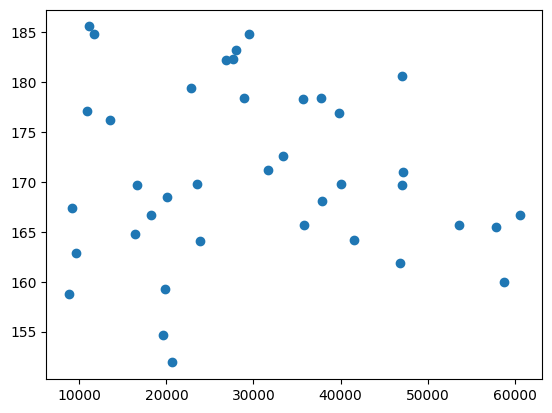

In [744]:
plt.scatter(btc_spy_slice['BTC'], btc_spy_slice['GLD'])
plt.show
correlation_btc = st.pearsonr(btc_spy_slice['BTC'], btc_spy_slice['GLD'])
print(f"The correlation between both factors is {round(correlation_btc[0],2)}")

In [745]:
correlation_btc

PearsonRResult(statistic=-0.08453785610379674, pvalue=0.6088752992759383)

The correlation between both factors is 0.78


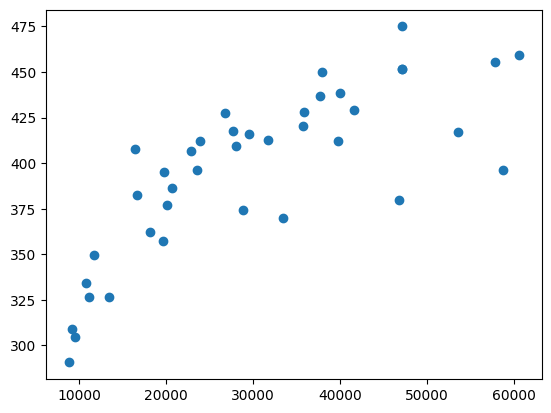

In [746]:
plt.scatter(btc_spy_slice['BTC'], btc_spy_slice['SPY'])
plt.show
corr_btc_spy = st.pearsonr(btc_spy_slice['BTC'], btc_spy_slice['SPY'])
print(f"The correlation between both factors is {round(corr_btc_spy[0],2)}")

In [747]:
corr_btc_spy

PearsonRResult(statistic=0.7779680292474651, pvalue=5.613409980852038e-09)

The correlation between both factors is 0.03


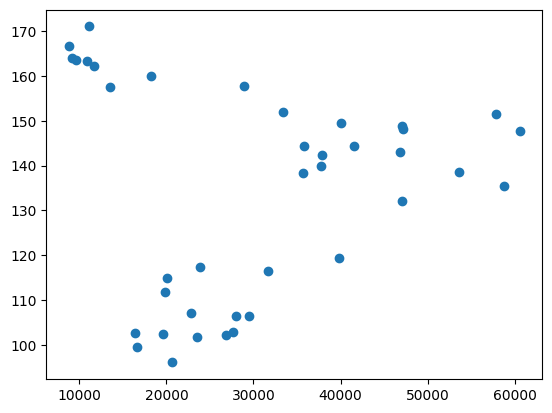

In [748]:
plt.scatter(btc_spy_slice['BTC'], btc_spy_slice['TLT'])
plt.show
corr_btc_tlt = st.pearsonr(btc_spy_slice['BTC'], btc_spy_slice['TLT'])
print(f"The correlation between both factors is {round(corr_btc_tlt[0],2)}")

In [749]:
corr_btc_tlt

PearsonRResult(statistic=0.02571222970710209, pvalue=0.876526436984919)

In [750]:
# Also run rolling correlations

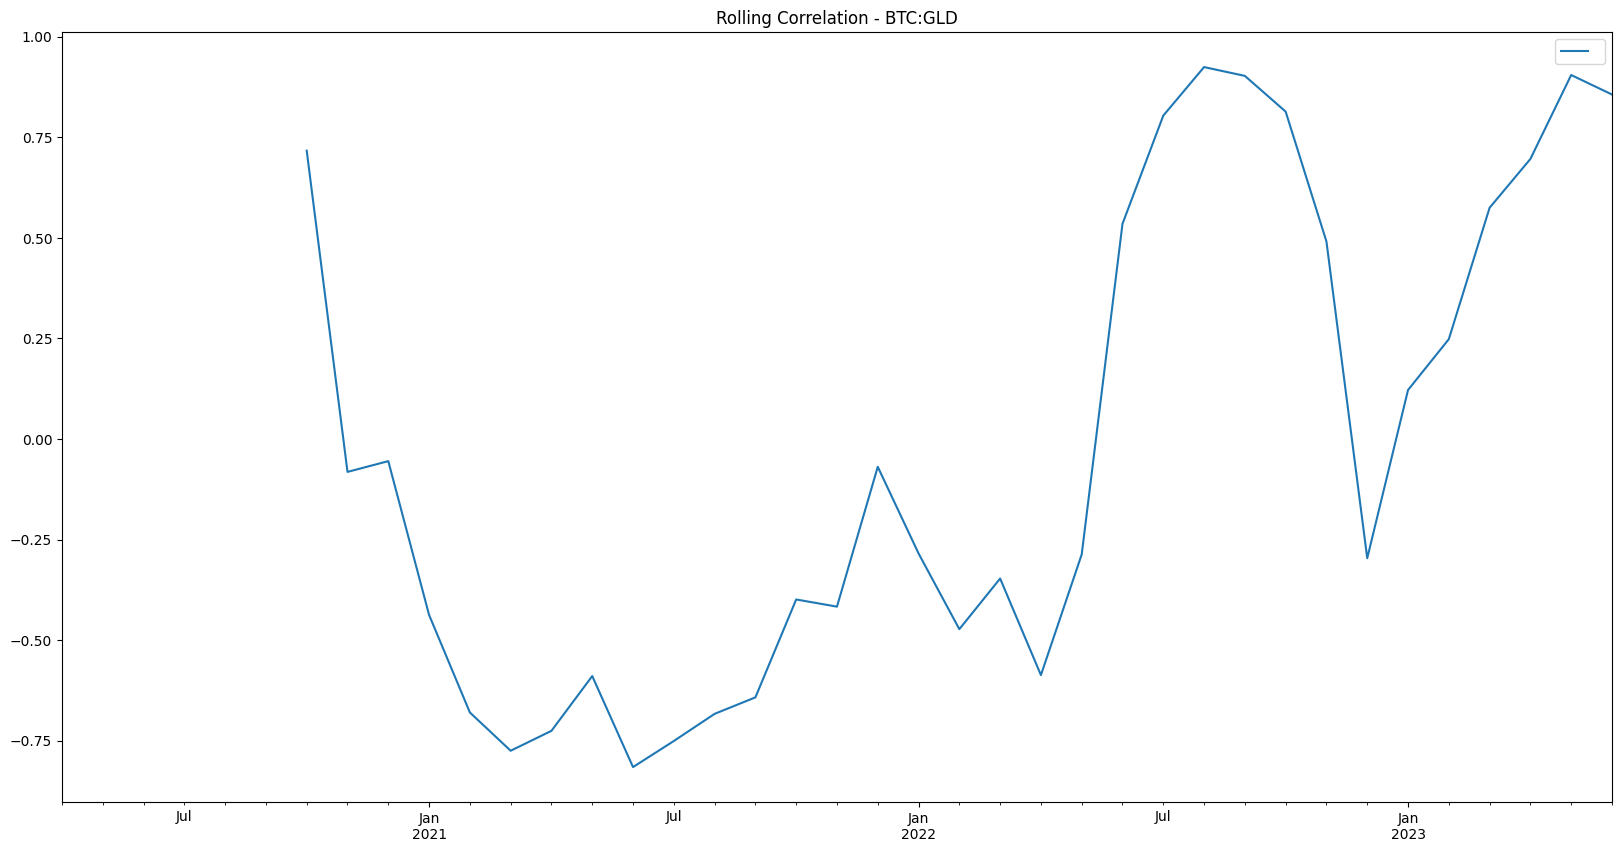

In [751]:
# Calculate the rolling standard deviation for all portfolios using a 7-day window
rolling_btc_gld = btc_spy_slice['BTC'].rolling(7).corr(btc_spy_slice['GLD']).plot(figsize=(20,10), legend=True, title="Rolling Correlation - BTC:GLD")

# Plot the rolling standard deviation
rolling_btc_gld;
# plt.savefig("Images/RollingSTD.png")

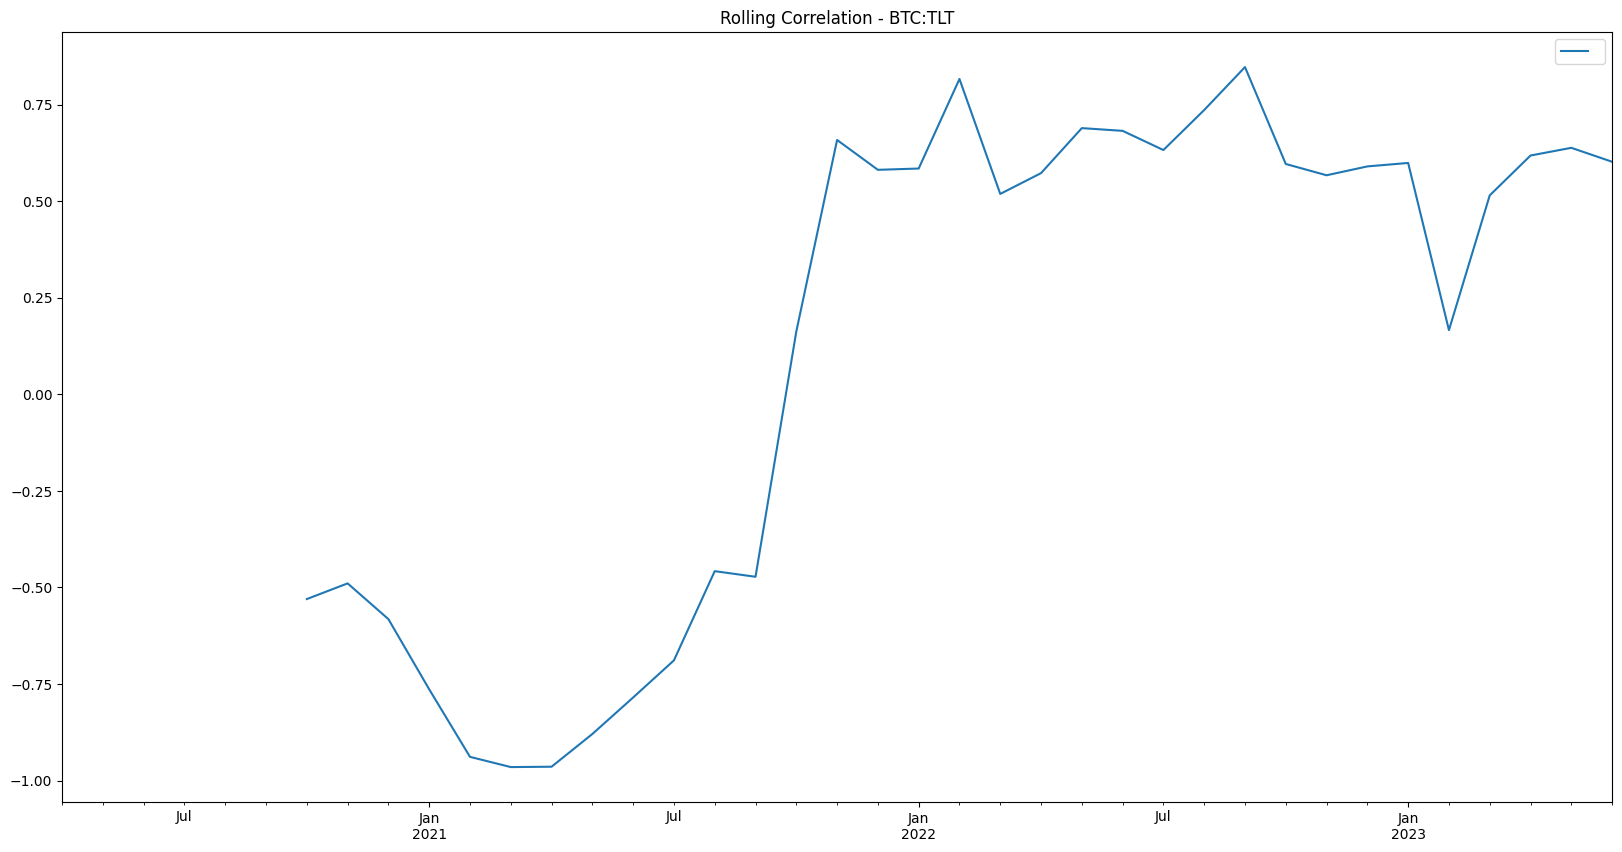

In [752]:
# Calculate the rolling standard deviation for all portfolios using a 7-day window
rolling_btc_tlt = btc_spy_slice['BTC'].rolling(7).corr(btc_spy_slice['TLT']).plot(figsize=(20,10), legend=True, title="Rolling Correlation - BTC:TLT")

# Plot the rolling standard deviation
rolling_btc_tlt;
# plt.savefig("Images/RollingSTD.png")

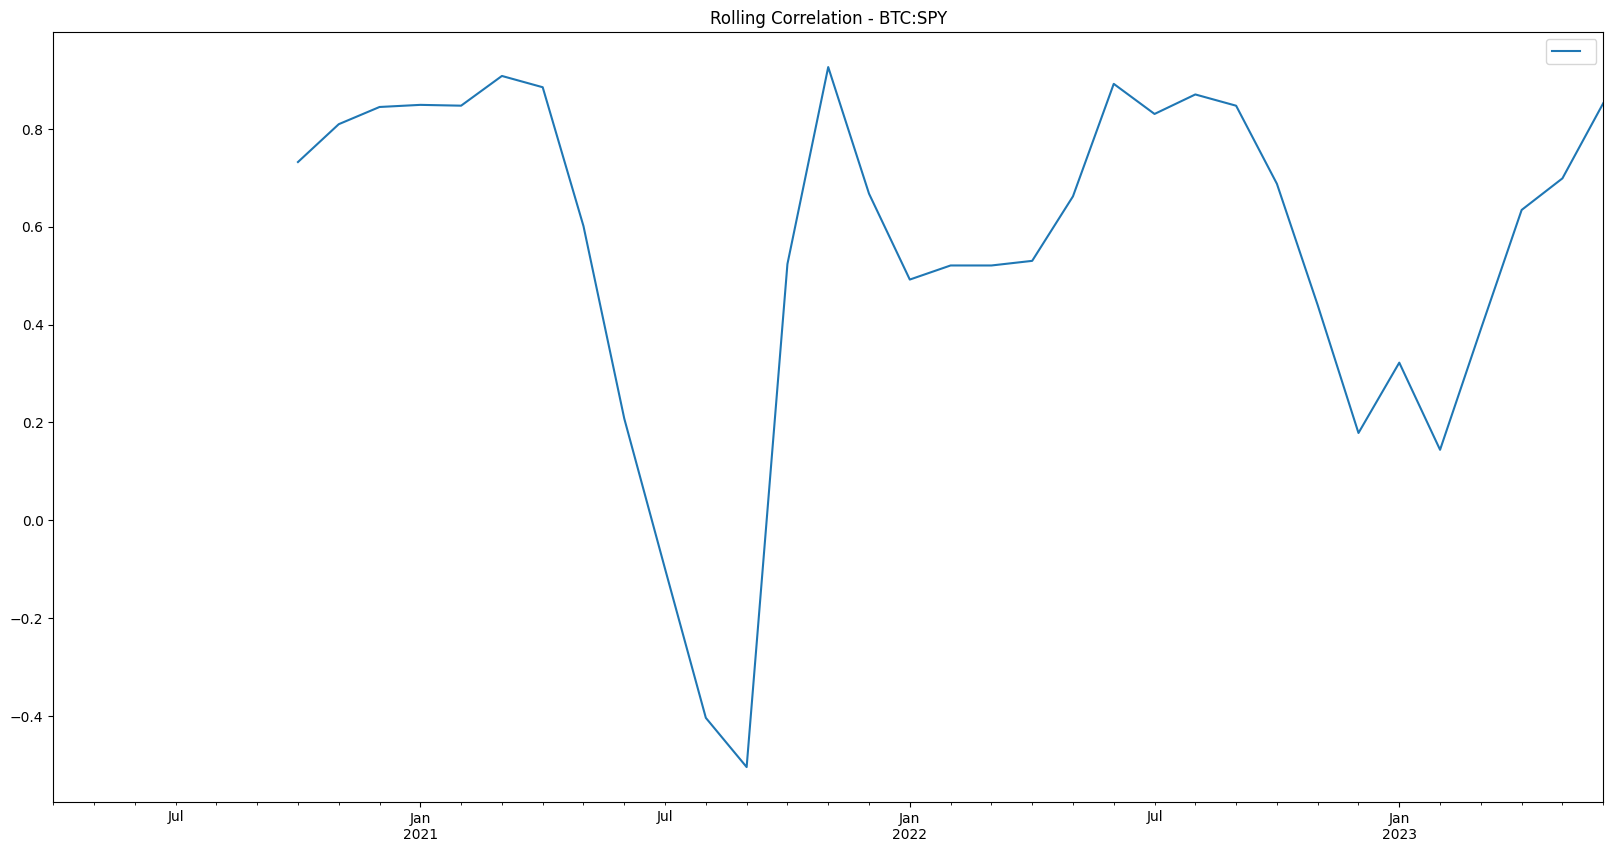

In [753]:
# Calculate the rolling standard deviation for all portfolios using a 7-day window
rolling_btc_spy = btc_spy_slice['BTC'].rolling(7).corr(btc_spy_slice['SPY']).plot(figsize=(20,10), legend=True, title="Rolling Correlation - BTC:SPY")

# Plot the rolling standard deviation
rolling_btc_spy;
# plt.savefig("Images/RollingSTD.png")

In [754]:
new_q

Value
Date                  
2010-08-18      0.0688
2010-08-19      0.0667
2010-08-20      0.0700
2010-08-21      0.0664
2010-08-22      0.0660
...                ...
2023-05-29  28082.7000
2023-05-30  27744.6600
2023-05-31  27704.0000
2023-06-01  27213.7100
2023-06-02  26814.7700

[4672 rows x 1 columns]

In [755]:
# Plotly - BTC Price - All Time
fig_newq = px.line(new_q, 
  y="Value",
#   x=btc_nov_round.index,
  title="BTC Price - All Time",
  template="simple_white",
  labels={"Value": "Price Level (USD)"},
  width=900, 
  height=800,
            )

# fig_ratio.update_xaxes(title_text='',dtick='M3', tickformat="%b\n%Y")

fig_newq.update_layout(title_x=0.5)

# fig.add_annotation( # add a text callout with arrow
#     text="92%!!!", x="2023-04-10", y=94, arrowhead=1, showarrow=True
# )

# fig.write_image("Images/plotly_btc_off_nov_low.png")

In [756]:
# Plotly - BTC Price (Log) - All Time
fig_newq_log = px.line(new_q, 
  y="Value",
#   x=btc_nov_round.index,
  title="BTC Price (Log) - All Time",
  template="simple_white",
  labels={"Value": "Price Level (USD)"},
  width=900, 
  height=800,
  log_y=True,
#   log_x=True
            )

# fig_ratio.update_xaxes(title_text='',dtick='M3', tickformat="%b\n%Y")

fig_newq_log.update_layout(title_x=0.5)

# fig.add_annotation( # add a text callout with arrow
#     text="92%!!!", x="2023-04-10", y=94, arrowhead=1, showarrow=True
# )

# fig_newq_log.write_image("Images/plotly_btc_log_all_time.png")

In [757]:
log_q = new_q.copy()
log_q

Value
Date                  
2010-08-18      0.0688
2010-08-19      0.0667
2010-08-20      0.0700
2010-08-21      0.0664
2010-08-22      0.0660
...                ...
2023-05-29  28082.7000
2023-05-30  27744.6600
2023-05-31  27704.0000
2023-06-01  27213.7100
2023-06-02  26814.7700

[4672 rows x 1 columns]

In [758]:
count_days = []
y=0

for x in log_q['Value']:
    y+=1
    count_days.append(y)

log_q['count_of_days'] = count_days
log_q

# count_days

Value  count_of_days
Date                                 
2010-08-18      0.0688              1
2010-08-19      0.0667              2
2010-08-20      0.0700              3
2010-08-21      0.0664              4
2010-08-22      0.0660              5
...                ...            ...
2023-05-29  28082.7000           4668
2023-05-30  27744.6600           4669
2023-05-31  27704.0000           4670
2023-06-01  27213.7100           4671
2023-06-02  26814.7700           4672

[4672 rows x 2 columns]

In [759]:
# Plotly - BTC Price (Log Log) - All Time
fig_newq_log_xy = px.line(log_q, 
  y="Value",
  x='count_of_days',
  title="BTC Price (Log Log) - All Time",
  template="simple_white",
  labels={"Value": "Price Level (USD)"},
  width=900, 
  height=800,
  log_y=True,
  log_x=True
            )

# fig_ratio.update_xaxes(title_text='',dtick='M3', tickformat="%b\n%Y")

fig_newq_log_xy.update_layout(title_x=0.5)

# fig.add_annotation( # add a text callout with arrow
#     text="92%!!!", x="2023-04-10", y=94, arrowhead=1, showarrow=True
# )

# fig_newq_log_xy.write_image("Images/plotly_btc_log_all_time.png")

In [760]:
# Bull and Bear - 2013 to 2016
newq_2013_slice = new_q['2013-06-01':'2016-06-01']
newq_2013_slice

Value
Date                 
2013-06-01  120.60293
2013-06-02  129.30000
2013-06-03  120.56663
2013-06-04  122.40510
2013-06-05  121.42000
...               ...
2016-05-28  522.43000
2016-05-29  526.64000
2016-05-30  525.15000
2016-05-31  531.15000
2016-06-01  531.97000

[1097 rows x 1 columns]

In [761]:
# Plotly - BTC Price - 2013 to 2016
fig_newq_2013_slice = px.line(newq_2013_slice, 
  y="Value",
#   x=btc_nov_round.index,
  title="BTC Price - 2013 to 2016",
  template="simple_white",
  labels={"Value": "Price Level (USD)"},
  width=900, 
  height=800,
            )

# fig_ratio.update_xaxes(title_text='',dtick='M3', tickformat="%b\n%Y")

fig_newq_2013_slice.update_layout(title_x=0.5)

# fig.add_annotation( # add a text callout with arrow
#     text="92%!!!", x="2023-04-10", y=94, arrowhead=1, showarrow=True
# )

# fig.write_image("Images/plotly_btc_off_nov_low.png")

In [762]:
newq_2013_slice.max()

Value    1151.0
dtype: float64

In [763]:
newq_2013_slice[newq_2013_slice['Value'] == 1151]

Value
Date              
2013-12-03  1151.0

In [764]:
# Isolating Bear Min
newq_2016_slice = new_q['2014-09-01':'2016-06-01']
newq_2016_slice

Value
Date              
2014-09-01  478.87
2014-09-02  472.76
2014-09-03  486.00
2014-09-04  474.50
2014-09-05  481.09
...            ...
2016-05-28  522.43
2016-05-29  526.64
2016-05-30  525.15
2016-05-31  531.15
2016-06-01  531.97

[640 rows x 1 columns]

In [765]:
# Plotly - BTC Price - 2014 to 2016 - Isolating Bear Min
fig_newq_2016_slice = px.line(newq_2016_slice, 
  y="Value",
#   x=btc_nov_round.index,
  title="BTC Price - 2014 to 2016",
  template="simple_white",
  labels={"Value": "Price Level (USD)"},
  width=900, 
  height=800,
            )

# fig_ratio.update_xaxes(title_text='',dtick='M3', tickformat="%b\n%Y")

fig_newq_2016_slice.update_layout(title_x=0.5)

# fig.add_annotation( # add a text callout with arrow
#     text="92%!!!", x="2023-04-10", y=94, arrowhead=1, showarrow=True
# )

# fig.write_image("Images/plotly_btc_off_nov_low.png")

In [766]:
newq_2016_slice.min()

Value    176.5
dtype: float64

In [767]:
newq_2016_slice[newq_2016_slice['Value'] == 176.5]

Value
Date             
2015-01-13  176.5

In [768]:
max_min_2015 = new_q['2013-12-03':'2015-01-13']
max_min_2015

Value
Date               
2013-12-03  1151.00
2013-12-04  1028.34
2013-12-05  1136.90
2013-12-06   727.29
2013-12-07   722.99
...             ...
2015-01-09   278.00
2015-01-10   272.25
2015-01-11   275.97
2015-01-12   230.89
2015-01-13   176.50

[407 rows x 1 columns]

In [769]:
# 2015 Max Drawdown
max_min_pct = max_min_2015.pct_change()
max_min_pct

Value
Date                
2013-12-03       NaN
2013-12-04 -0.106568
2013-12-05  0.105568
2013-12-06 -0.360287
2013-12-07 -0.005912
...              ...
2015-01-09 -0.067083
2015-01-10 -0.020683
2015-01-11  0.013664
2015-01-12 -0.163351
2015-01-13 -0.235567

[407 rows x 1 columns]

In [770]:
# 2015 Drawdown Cumprod
max_min_2015_cumprod = (1 + max_min_pct).cumprod()
# btc_prod_annotation = (btc_nov_cumprod.iloc[-1][0]*100).round().astype(int)
max_min_2015_round = round((max_min_2015_cumprod*100)-100,2)
max_min_2015_round

Value
Date             
2013-12-03    NaN
2013-12-04 -10.66
2013-12-05  -1.23
2013-12-06 -36.81
2013-12-07 -37.19
...           ...
2015-01-09 -75.85
2015-01-10 -76.35
2015-01-11 -76.02
2015-01-12 -79.94
2015-01-13 -84.67

[407 rows x 1 columns]

In [771]:
max_min_2015_round.min()

Value   -84.67
dtype: float64

In [772]:
min_2015 = max_min_2015_round[max_min_2015_round['Value'] == -84.67]
min_2015

Value
Date             
2015-01-13 -84.67

In [773]:
# Bull and Bear - 2017 to 2019
newq_2017_slice = new_q['2017-01-01':'2019-06-01']
newq_2017_slice

Value
Date               
2017-01-01   997.72
2017-01-02  1015.97
2017-01-03  1013.42
2017-01-04  1126.76
2017-01-05   994.67
...             ...
2019-05-28  8770.06
2019-05-29  8719.88
2019-05-30  8662.98
2019-05-31  8272.46
2019-06-01  8553.81

[882 rows x 1 columns]

In [774]:
newq_2017_round = round(newq_2017_slice,2)
newq_2017_round

Value
Date               
2017-01-01   997.72
2017-01-02  1015.97
2017-01-03  1013.42
2017-01-04  1126.76
2017-01-05   994.67
...             ...
2019-05-28  8770.06
2019-05-29  8719.88
2019-05-30  8662.98
2019-05-31  8272.46
2019-06-01  8553.81

[882 rows x 1 columns]

In [775]:
# Plotly - BTC Price - 2017 to 2019
fig_newq_2017_slice = px.line(newq_2017_slice, 
  y="Value",
#   x=btc_nov_round.index,
  title="BTC Price - 2017 to 2019",
  template="simple_white",
  labels={"Value": "Price Level (USD)"},
  width=900, 
  height=800,
            )

# fig_ratio.update_xaxes(title_text='',dtick='M3', tickformat="%b\n%Y")

fig_newq_2017_slice.update_layout(title_x=0.5)

# fig.add_annotation( # add a text callout with arrow
#     text="92%!!!", x="2023-04-10", y=94, arrowhead=1, showarrow=True
# )

# fig.write_image("Images/plotly_btc_off_nov_low.png")

In [776]:
newq_2017_round.max()

Value    19498.68
dtype: float64

In [777]:
newq_2017_round[newq_2017_round['Value'] == 19498.68]

Value
Date                
2017-12-16  19498.68

In [778]:
# Isolating Bear Min - 2017 to 2019
newq_2019_slice = new_q['2017-12-16':'2019-05-01']
newq_2019_slice.min()

Value    3242.42
dtype: float64

In [779]:
newq_2019_slice[newq_2019_slice['Value'] == 3242.42]

Value
Date               
2018-12-15  3242.42

In [780]:
max_min_2019 = new_q['2017-12-16':'2018-12-15']
max_min_2019

Value
Date                    
2017-12-16  19498.683333
2017-12-17  19279.900000
2017-12-18  18961.856667
2017-12-19  17737.111667
2017-12-20  17382.940000
...                  ...
2018-12-11   3426.190000
2018-12-12   3407.280000
2018-12-13   3406.762500
2018-12-14   3278.374167
2018-12-15   3242.420000

[365 rows x 1 columns]

In [781]:
max_min_2019pct = max_min_2019.pct_change()
max_min_2019pct

Value
Date                
2017-12-16       NaN
2017-12-17 -0.011220
2017-12-18 -0.016496
2017-12-19 -0.064590
2017-12-20 -0.019968
...              ...
2018-12-11 -0.027744
2018-12-12 -0.005519
2018-12-13 -0.000152
2018-12-14 -0.037686
2018-12-15 -0.010967

[365 rows x 1 columns]

In [782]:
# 2019 Drawdown Cumprod
max_min_2019_cumprod = (1 + max_min_2019pct).cumprod()
# btc_prod_annotation = (btc_nov_cumprod.iloc[-1][0]*100).round().astype(int)
max_min_2019_round = round((max_min_2019_cumprod*100)-100,2)
max_min_2019_round

Value
Date             
2017-12-16    NaN
2017-12-17  -1.12
2017-12-18  -2.75
2017-12-19  -9.03
2017-12-20 -10.85
...           ...
2018-12-11 -82.43
2018-12-12 -82.53
2018-12-13 -82.53
2018-12-14 -83.19
2018-12-15 -83.37

[365 rows x 1 columns]

In [783]:
max_min_2019_round.min()

Value   -83.37
dtype: float64

In [784]:
min_2019 = max_min_2019_round[max_min_2019_round['Value'] == -83.37]
min_2019

Value
Date             
2018-12-15 -83.37

In [785]:
# Concatenating for max drawdowns
drawdown_concat = pd.concat([min_2015, min_2019])
drawdown_concat

Value
Date             
2015-01-13 -84.67
2018-12-15 -83.37

In [786]:
# Bull and Bear - 2020 to 2021
newq_2020_slice = new_q['2021-01-01':'2023-03-01']
newq_2020_slice

Value
Date                
2021-01-01  28982.56
2021-01-02  29393.75
2021-01-03  32195.46
2021-01-04  33000.78
2021-01-05  32035.03
...              ...
2023-02-25  23192.02
2023-02-26  23176.76
2023-02-27  23563.11
2023-02-28  23497.62
2023-03-01  23128.30

[790 rows x 1 columns]

In [787]:
newq_2020_round = round(newq_2020_slice,2)
newq_2020_round

Value
Date                
2021-01-01  28982.56
2021-01-02  29393.75
2021-01-03  32195.46
2021-01-04  33000.78
2021-01-05  32035.03
...              ...
2023-02-25  23192.02
2023-02-26  23176.76
2023-02-27  23563.11
2023-02-28  23497.62
2023-03-01  23128.30

[790 rows x 1 columns]

In [788]:
# Plotly - BTC Price - 2020 to 2023
fig_newq_2020_slice = px.line(newq_2020_round, 
  y="Value",
#   x=btc_nov_round.index,
  title="BTC Price - 2020 to 2023",
  template="simple_white",
  labels={"Value": "Price Level (USD)"},
  width=900, 
  height=800,
            )

# fig_ratio.update_xaxes(title_text='',dtick='M3', tickformat="%b\n%Y")

fig_newq_2020_slice.update_layout(title_x=0.5)

# fig.add_annotation( # add a text callout with arrow
#     text="92%!!!", x="2023-04-10", y=94, arrowhead=1, showarrow=True
# )

# fig.write_image("Images/plotly_btc_off_nov_low.png")

In [789]:
newq_2020_round.max()

Value    67562.17
dtype: float64

In [790]:
newq_2020_round[newq_2020_round['Value'] == 67562.17]

Value
Date                
2021-11-09  67562.17

In [791]:
newq_2020_round.min()

Value    15759.61
dtype: float64

In [792]:
newq_2020_round[newq_2020_round['Value'] == 15759.61]

Value
Date                
2022-11-22  15759.61

In [793]:
min_max_2023 = newq_2020_round['2021-11-09':'2023-11-22']
min_max_2023

Value
Date                
2021-11-09  67562.17
2021-11-10  66954.11
2021-11-11  64976.73
2021-11-12  64838.81
2021-11-13  64254.67
...              ...
2023-02-25  23192.02
2023-02-26  23176.76
2023-02-27  23563.11
2023-02-28  23497.62
2023-03-01  23128.30

[478 rows x 1 columns]

In [794]:
min_max_2023pct = min_max_2023.pct_change()
min_max_2023pct

Value
Date                
2021-11-09       NaN
2021-11-10 -0.009000
2021-11-11 -0.029533
2021-11-12 -0.002123
2021-11-13 -0.009009
...              ...
2023-02-25 -0.031502
2023-02-26 -0.000658
2023-02-27  0.016670
2023-02-28 -0.002779
2023-03-01 -0.015717

[478 rows x 1 columns]

In [795]:
# 2023 Drawdown Cumprod
max_min_2023_cumprod = (1 + min_max_2023pct).cumprod()
# btc_prod_annotation = (btc_nov_cumprod.iloc[-1][0]*100).round().astype(int)
max_min_2023_round = round((max_min_2023_cumprod*100)-100,2)
max_min_2023_round

Value
Date             
2021-11-09    NaN
2021-11-10  -0.90
2021-11-11  -3.83
2021-11-12  -4.03
2021-11-13  -4.90
...           ...
2023-02-25 -65.67
2023-02-26 -65.70
2023-02-27 -65.12
2023-02-28 -65.22
2023-03-01 -65.77

[478 rows x 1 columns]

In [796]:
max_min_2023_round.min()

Value   -76.67
dtype: float64

In [797]:
min_2023 = max_min_2023_round[max_min_2023_round['Value'] == -76.67]
min_2023

Value
Date             
2022-11-22 -76.67

In [798]:
# Concatenating for max drawdowns
drawdown_lows = pd.concat([min_2015, min_2019,min_2023])
drawdown_lows

Value
Date             
2015-01-13 -84.67
2018-12-15 -83.37
2022-11-22 -76.67

In [799]:
# drawdown_concat.assign(color=drawdown_concat['Color'])

In [800]:
drawdown_lows['Color'] = ['2015','2018','2022']
drawdown_lows

Value Color
Date                   
2015-01-13 -84.67  2015
2018-12-15 -83.37  2018
2022-11-22 -76.67  2022

In [801]:
# drawdown_concat_drop = drawdown_concat['Value']
# drawdown_concat_drop

In [802]:
drawdown_lows.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2015-01-13 to 2022-11-22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   3 non-null      float64
 1   Color   3 non-null      object 
dtypes: float64(1), object(1)
memory usage: 72.0+ bytes


In [803]:
# drawdown_concat["Value"] = drawdown_concat["Value"].astype(str)
# drawdown_concat

In [804]:
# Comparing Plotly
fig_drawdowns = px.bar(drawdown_lows['Value']*.01,
#   y=["BTC","GLD","SPY","TLT"],
#   x=['2015-01-13','2018-12-15','2022-11-22'],
#   x=concat_three_mos.index,
#   barmode='group',
  text_auto='.0%', #show individual % values
  title="Bear Market Max Drawdowns",
  template="simple_white",
  labels={"value": "Drawdown (%)"},
  width=950, 
  height=600,
#   color_continuous_scale=[[-84.00, "red"],   [-85.00, "red"],
#                           [-83.00, "green"], [-84.00, "green"],
#                           [-76.00, "blue"],  [-77.00, "blue"]],
  color=drawdown_lows["Color"], #Identifying column with string values to associate to colors, 
                                #in this case using "year" to differentiate
  color_discrete_map={'2015':'Red', '2018':'#EE4B2B', '2022':'#EE4B2B'}, #Actual colors of bars
#   width=0.8
#   range_x=['2023-01-01','2023-04-30']
            )

fig_drawdowns.update_xaxes(title_text='')

# fig_drawdowns.update_xaxes(title_text='', dtick='M1', tickformat="%b %e \n%Y")

fig_drawdowns.update_layout(title_x=0.5,legend_title_text='Market Bottom (Year)', yaxis={
        'tickformat': '.0%' #update y axis with numbers as %
    })

fig_drawdowns.update_layout(bargap=0.5) #Create more space between bars, bars slim down automatically

# fig_box_monthly.add_annotation( # add a text callout with arrow
#     text="2013", x=2015, y=-10, arrowhead=1, showarrow=True,   
# )

fig_drawdowns.add_annotation( # add a text callout with arrow
    text="", x=.025, y=.1, arrowhead=5, showarrow=True, xref='paper', yref='paper', xanchor='left',
    yanchor='top', ax=1, ay=-375, arrowsize=2
)

# fig_drawdowns.update_traces(width=0.7)

today = dt.date.today()

# HOW TO ADD A FOOTNOTE TO BOTTOM LEFT OF PAGE
fig_drawdowns.add_annotation(
    text = (f"@jordangilmartin / {today}<br>Source: Quandl"),
    showarrow=False,
    x = 0,
    y = -0.15,
    xref='paper',
    yref='paper', 
    xanchor='left',
    yanchor='bottom',
    xshift=-1,
    yshift=-5,
#     , font=dict(size=10, color="grey")
    align="left",
    )

# fig_drawdowns.write_image("Images/bear_market_max_drawdowns.png")

In [805]:
# Grabbing SPY Data from Quandl - this only grabbed one month of data from 2017 for some reason - going to try yfinance
spy_q = quandl.get('BCIW/_INX')  # Format is: `DATABASE_CODE/DATASET_CODE`
spy_q.head()

Open     High      Low    Close        Volume
Date                                                        
2017-01-03  2251.57  2263.88  2245.13  2257.83  2.318948e+09
2017-01-04  2261.60  2272.82  2261.60  2270.75  2.097360e+09
2017-01-05  2268.18  2271.50  2260.45  2269.00  2.187190e+09
2017-01-06  2271.14  2282.10  2264.06  2276.98  1.957181e+09
2017-01-09  2273.59  2275.49  2268.90  2268.90  1.914652e+09

In [806]:
yf_sp500data = yf.download("^GSPC")
yf_sp500data.head()

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close  Volume
Date                                                                     
1927-12-30  17.660000  17.660000  17.660000  17.660000  17.660000       0
1928-01-03  17.760000  17.760000  17.760000  17.760000  17.760000       0
1928-01-04  17.719999  17.719999  17.719999  17.719999  17.719999       0
1928-01-05  17.549999  17.549999  17.549999  17.549999  17.549999       0
1928-01-06  17.660000  17.660000  17.660000  17.660000  17.660000       0

In [807]:
yf_sp500data_slice = yf_sp500data['Close']
yf_sp500data_slice

Date
1927-12-30      17.660000
1928-01-03      17.760000
1928-01-04      17.719999
1928-01-05      17.549999
1928-01-06      17.660000
                 ...     
2023-05-25    4151.279785
2023-05-26    4205.450195
2023-05-30    4205.520020
2023-05-31    4179.830078
2023-06-01    4221.020020
Name: Close, Length: 23969, dtype: float64

In [808]:
yf_sp500data_pct = yf_sp500data_slice.pct_change()
yf_sp500data_pct.head()

Date
1927-12-30         NaN
1928-01-03    0.005663
1928-01-04   -0.002252
1928-01-05   -0.009594
1928-01-06    0.006268
Name: Close, dtype: float64

In [809]:
# S&P 500 All Time Returns
spy_all_cumprod = (1 + yf_sp500data_pct).cumprod()
# btc_prod_annotation = (btc_nov_cumprod.iloc[-1][0]*100).round().astype(int)
spy_all_round = round((spy_all_cumprod*100)-100,2)
spy_all_round

Date
1927-12-30         NaN
1928-01-03        0.57
1928-01-04        0.34
1928-01-05       -0.62
1928-01-06       -0.00
                ...   
2023-05-25    23406.68
2023-05-26    23713.42
2023-05-30    23713.82
2023-05-31    23568.35
2023-06-01    23801.59
Name: Close, Length: 23969, dtype: float64

In [810]:
# S&P 500 all time returns divided by number of years - 244% per year returns?
spy_all_round['2023-04-24']/95

245.53736842105263

In [811]:
new_q.head()

Value
Date              
2010-08-18  0.0688
2010-08-19  0.0667
2010-08-20  0.0700
2010-08-21  0.0664
2010-08-22  0.0660

In [812]:
yf_sp500_2010 = yf_sp500data_slice['2010-08-18':]
yf_sp500_2010

Date
2010-08-18    1094.160034
2010-08-19    1075.630005
2010-08-20    1071.689941
2010-08-23    1067.359985
2010-08-24    1051.869995
                 ...     
2023-05-25    4151.279785
2023-05-26    4205.450195
2023-05-30    4205.520020
2023-05-31    4179.830078
2023-06-01    4221.020020
Name: Close, Length: 3219, dtype: float64

In [813]:
yf_sp500_2010pct = yf_sp500_2010.pct_change()
yf_sp500_2010pct.head()

Date
2010-08-18         NaN
2010-08-19   -0.016935
2010-08-20   -0.003663
2010-08-23   -0.004040
2010-08-24   -0.014512
Name: Close, dtype: float64

In [814]:
# SP500 daily gains
yf_sp500_greater = yf_sp500_2010pct[yf_sp500_2010pct > 0]
yf_sp500_greater.head()

Date
2010-08-25    0.003289
2010-08-27    0.016587
2010-08-31    0.000391
2010-09-01    0.029505
2010-09-02    0.009081
Name: Close, dtype: float64

In [815]:
# SP500 daily losses
yf_sp500_lesser = yf_sp500_2010pct[yf_sp500_2010pct < 0]
yf_sp500_lesser.head()

Date
2010-08-19   -0.016935
2010-08-20   -0.003663
2010-08-23   -0.004040
2010-08-24   -0.014512
2010-08-26   -0.007685
Name: Close, dtype: float64

In [816]:
yf_sp500_greater.describe()

count    1742.000000
mean        0.007181
std         0.007723
min         0.000005
25%         0.002167
50%         0.005028
75%         0.009933
max         0.093828
Name: Close, dtype: float64

In [817]:
yf_sp500_lesser.describe()

count    1475.000000
mean       -0.007431
std         0.009072
min        -0.119841
25%        -0.009703
50%        -0.004456
75%        -0.001710
max        -0.000007
Name: Close, dtype: float64

In [818]:
# Maybe compare time to recover 70% to 90% drawdowns in btc vs spy or other asset classes
# In $10k principal invested example above the current principal balance is around 42% of high as of 4/25/23

In [819]:
spy_ratio_slice = yf_sp500data_slice['2010-08-18':]
spy_ratio_slice

Date
2010-08-18    1094.160034
2010-08-19    1075.630005
2010-08-20    1071.689941
2010-08-23    1067.359985
2010-08-24    1051.869995
                 ...     
2023-05-25    4151.279785
2023-05-26    4205.450195
2023-05-30    4205.520020
2023-05-31    4179.830078
2023-06-01    4221.020020
Name: Close, Length: 3219, dtype: float64

In [820]:
btc_ratio_slice = new_q[:]
btc_ratio_slice

Value
Date                  
2010-08-18      0.0688
2010-08-19      0.0667
2010-08-20      0.0700
2010-08-21      0.0664
2010-08-22      0.0660
...                ...
2023-05-29  28082.7000
2023-05-30  27744.6600
2023-05-31  27704.0000
2023-06-01  27213.7100
2023-06-02  26814.7700

[4672 rows x 1 columns]

In [821]:
btc_ratio_all = btc_ratio_slice.resample('BM').apply(lambda x: x[-1])
btc_ratio_all.head()

Value
Date                
2010-08-31  0.064900
2010-09-30  0.061999
2010-10-29  0.191900
2010-11-30  0.280000
2010-12-31  0.299998

In [822]:
btc_dict_ratio = {'Value':'BTC'}

btc_ratio_all = btc_ratio_all.rename(columns=btc_dict_ratio)
btc_ratio_all.head()

BTC
Date                
2010-08-31  0.064900
2010-09-30  0.061999
2010-10-29  0.191900
2010-11-30  0.280000
2010-12-31  0.299998

In [823]:
spy_ratio_all = spy_ratio_slice.resample('BM').apply(lambda x: x[-1])
spy_ratio_all.head()

Date
2010-08-31    1049.329956
2010-09-30    1141.199951
2010-10-29    1183.260010
2010-11-30    1180.550049
2010-12-31    1257.640015
Freq: BM, Name: Close, dtype: float64

In [824]:
# Concatenating btc and spy
btc_spy_concat = pd.concat([btc_ratio_all, spy_ratio_all], axis=1)
btc_spy_concat.tail()

BTC        Close
Date                             
2023-02-28  23497.62  3970.149902
2023-03-31  28033.06  4109.310059
2023-04-28  29480.35  4169.479980
2023-05-31  27704.00  4179.830078
2023-06-30  26814.77  4221.020020

In [825]:
btc_spy_concat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 155 entries, 2010-08-31 to 2023-06-30
Freq: BM
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BTC     155 non-null    float64
 1   Close   155 non-null    float64
dtypes: float64(2)
memory usage: 3.6 KB


In [826]:
spy_dict_ratio = {'Close':'SPY'}

btc_spy_concat = btc_spy_concat.rename(columns=spy_dict_ratio)
btc_spy_concat.head()

BTC          SPY
Date                             
2010-08-31  0.064900  1049.329956
2010-09-30  0.061999  1141.199951
2010-10-29  0.191900  1183.260010
2010-11-30  0.280000  1180.550049
2010-12-31  0.299998  1257.640015

In [827]:
btc_spy_concat['BTC_SPY'] = btc_spy_concat['BTC']/btc_spy_concat['SPY']
btc_spy_concat.head()

BTC          SPY   BTC_SPY
Date                                       
2010-08-31  0.064900  1049.329956  0.000062
2010-09-30  0.061999  1141.199951  0.000054
2010-10-29  0.191900  1183.260010  0.000162
2010-11-30  0.280000  1180.550049  0.000237
2010-12-31  0.299998  1257.640015  0.000239

In [828]:
btc_spy_concat['SPY_BTC'] = btc_spy_concat['SPY']/btc_spy_concat['BTC']
btc_spy_concat.head()

BTC          SPY   BTC_SPY       SPY_BTC
Date                                                     
2010-08-31  0.064900  1049.329956  0.000062  16168.412266
2010-09-30  0.061999  1141.199951  0.000054  18406.747708
2010-10-29  0.191900  1183.260010  0.000162   6166.024022
2010-11-30  0.280000  1180.550049  0.000237   4216.250174
2010-12-31  0.299998  1257.640015  0.000239   4192.161330

In [829]:
# Plotly - BTC:SPY Line Chart - Longer Time Frame, 2010 to Current
fig_btc_spy_ratio = px.line(btc_spy_concat, 
  y="BTC_SPY",
#   x=btc_nov_round.index,
  title="Ratio of BTC:SPY ",
  template="simple_white",
  labels={"BTC_SPY": "BTC:SPY Ratio"},
  width=900, 
  height=800,
            )

fig_btc_spy_ratio.update_xaxes(title_text='')

fig_btc_spy_ratio.update_layout(title_x=0.5)

# fig_btc_spy_ratio.add_annotation( # add a text callout with arrow
#     text="92%!!!", x="2023-04-10", y=94, arrowhead=1, showarrow=True
# )

# fig_btc_spy_ratio.write_image("Images/plotly_btc_off_nov_low.png")

In [830]:
# Plotly - BTC:SPY Line Chart (Log) - Longer Time Frame, 2010 to Current
fig_btc_spy_ratio_log = px.line(btc_spy_concat, 
  y="BTC_SPY",
#   x=btc_nov_round.index,
  title="Ratio of BTC:SPY ",
  template="simple_white",
  labels={"BTC_SPY": "BTC:SPY Ratio"},
  width=900, 
  height=800,
  log_y=True
            )

fig_btc_spy_ratio_log.update_xaxes(title_text='')

fig_btc_spy_ratio_log.update_layout(title_x=0.5)

# fig_btc_spy_ratio_log.add_annotation( # add a text callout with arrow
#     text="92%!!!", x="2023-04-10", y=94, arrowhead=1, showarrow=True
# )

# fig_btc_spy_ratio_log.write_image("Images/plotly_btc_off_nov_low.png")

In [831]:
# Plotly - BTC:SPY Line Chart - Longer Time Frame, 2010 to Current
fig_spy_btc_ratio = px.line(btc_spy_concat, 
  y="SPY_BTC",
#   x=btc_nov_round.index,
  title="Ratio of SPY:BTC ",
  template="simple_white",
  labels={"SPY_BTC": "SPY:BTC Ratio"},
  width=900, 
  height=800,
            )

fig_spy_btc_ratio.update_xaxes(title_text='')

fig_spy_btc_ratio.update_layout(title_x=0.5)

# fig_spy_btc_ratio.add_annotation( # add a text callout with arrow
#     text="92%!!!", x="2023-04-10", y=94, arrowhead=1, showarrow=True
# )

# fig_spy_btc_ratio.write_image("Images/plotly_btc_off_nov_low.png")

In [832]:
# Plotly - BTC:SPY Line Chart - Longer Time Frame, 2010 to Current
fig_spy_btc_ratio_log = px.line(btc_spy_concat, 
  y="SPY_BTC",
#   x=btc_nov_round.index,
  title="Ratio of SPY:BTC ",
  template="simple_white",
  labels={"SPY_BTC": "SPY:BTC Ratio"},
  width=900, 
  height=800,
  log_y=True
            )

fig_spy_btc_ratio_log.update_xaxes(title_text='')

fig_spy_btc_ratio_log.update_layout(title_x=0.5)

# fig.add_annotation( # add a text callout with arrow
#     text="92%!!!", x="2023-04-10", y=94, arrowhead=1, showarrow=True
# )

# fig.write_image("Images/plotly_btc_off_nov_low.png")

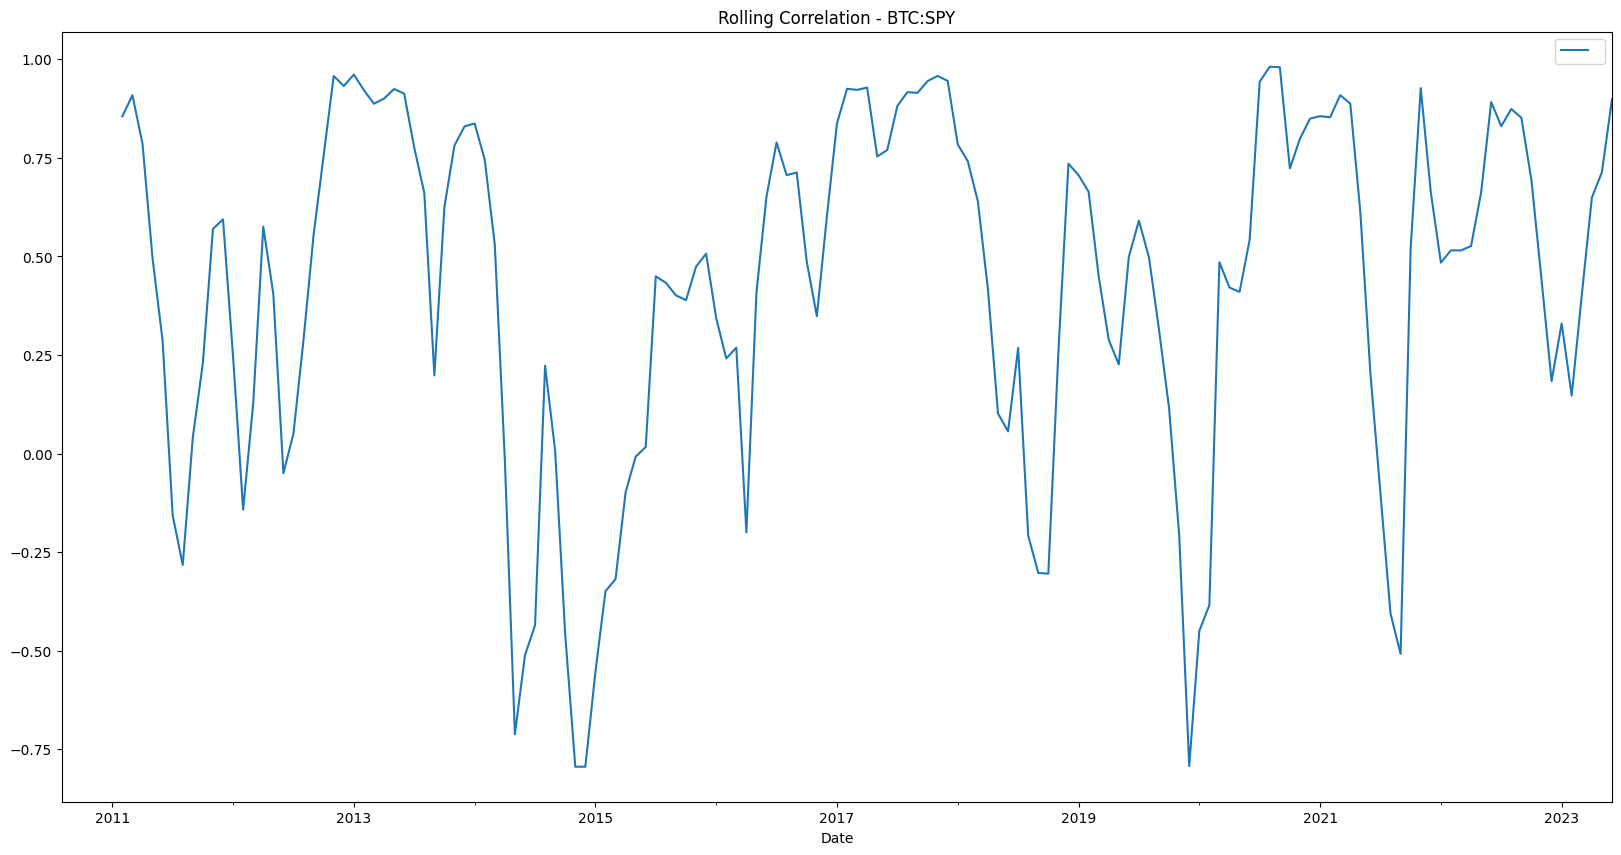

In [833]:
# Calculate the rolling standard deviation using data since 2010
rolling_btc_spy_2010 = btc_spy_concat['BTC'].rolling(7).corr(btc_spy_concat['SPY']).plot(figsize=(20,10), legend=True, title="Rolling Correlation - BTC:SPY")

# Plot the rolling standard deviation
rolling_btc_spy_2010;
# plt.savefig("Images/RollingSTD.png")

In [834]:
mc_glone_slice = data_q['2023-01-01':'2023-05-12']
mc_glone_slice

Value
Date                
2023-01-01  16526.78
2023-01-02  16613.71
2023-01-03  16671.54
2023-01-04  16669.60
2023-01-05  16850.63
...              ...
2023-05-08  28456.84
2023-05-09  27691.41
2023-05-10  27640.09
2023-05-11  27617.14
2023-05-12  26993.20

[132 rows x 1 columns]

In [835]:
mcglone_gld_loc = stock_index.loc[stock_index['symbol'] == 'GLD',:]
mcglone_gld_loc

symbol    open     high       low     close      volume  \
timestamp                                                            
2020-04-08    GLD  155.91  155.940  154.5900  154.6500   7600804.0   
2020-04-09    GLD  158.08  159.080  157.2100  158.5800  18123039.0   
2020-04-13    GLD  159.17  162.380  158.6250  161.4100  20549213.0   
2020-04-14    GLD  162.73  164.420  161.7800  162.6600  17095086.0   
2020-04-15    GLD  161.80  162.540  160.8061  162.0000  12141890.0   
...           ...     ...      ...       ...       ...         ...   
2023-05-26    GLD  181.01  181.300  180.0900  180.9200   5516975.0   
2023-05-30    GLD  181.72  182.400  181.1700  182.0400   4907114.0   
2023-05-31    GLD  182.39  183.445  182.1000  182.3200   8497893.0   
2023-06-01    GLD  182.81  184.210  182.7200  183.7600   6845211.0   
2023-06-02    GLD  183.53  183.560  182.1500  182.2099   3559320.0   

            trade_count        vwap  
timestamp                            
2020-04-08      60704.0  155.233884  
2020-04-09     140239.0  158.255634  
2020-04-13     140401.0  160.906373  
2020-04-14     146336.0  163.197557  
2020-04-15      95518.0  161.749049  
...                 ...         ...  
2023-05-26      55396.0  180.696752  
2023-05-30      48354.0  181.911211  
2023-05-31      74220.0  182.673120  
2023-06-01      56089.0  183.622741  
2023-06-02      35052.0  182.682100  

[794 rows x 8 columns]

In [836]:
mcglone_gld_loc_slice = mcglone_gld_loc['2023-01-01':'2023-05-12']
mcglone_gld_loc_slice

symbol     open     high      low   close     volume  trade_count  \
timestamp                                                                      
2023-01-03    GLD  171.320  172.090  170.020  171.06  7979721.0      55916.0   
2023-01-04    GLD  172.860  173.090  171.845  172.67  7560339.0      51507.0   
2023-01-05    GLD  170.824  171.000  169.790  170.52  4532590.0      41606.0   
2023-01-06    GLD  171.760  173.960  171.230  173.71  7869149.0      58721.0   
2023-01-09    GLD  174.510  175.035  173.881  174.10  5134804.0      39209.0   
...           ...      ...      ...      ...     ...        ...          ...   
2023-05-08    GLD  187.820  188.670  187.490  187.69  6075949.0      59786.0   
2023-05-09    GLD  188.120  189.330  188.070  189.02  7099197.0      61821.0   
2023-05-10    GLD  188.975  189.640  187.820  188.75  9392268.0      84763.0   
2023-05-11    GLD  188.440  188.810  186.860  187.13  8245523.0      77408.0   
2023-05-12    GLD  187.430  187.920  186.580  186.81  6843543.0      62577.0   

                  vwap  
timestamp               
2023-01-03  171.070617  
2023-01-04  172.534592  
2023-01-05  170.566078  
2023-01-06  173.208524  
2023-01-09  174.306650  
...                ...  
2023-05-08  188.050427  
2023-05-09  188.697672  
2023-05-10  188.750887  
2023-05-11  187.432109  
2023-05-12  187.068341  

[91 rows x 8 columns]

In [837]:
mcglone_gld_close = mcglone_gld_loc_slice['close']
mcglone_gld_close

timestamp
2023-01-03    171.06
2023-01-04    172.67
2023-01-05    170.52
2023-01-06    173.71
2023-01-09    174.10
               ...  
2023-05-08    187.69
2023-05-09    189.02
2023-05-10    188.75
2023-05-11    187.13
2023-05-12    186.81
Name: close, Length: 91, dtype: float64

In [838]:
mcglone_gld_close_pct = mcglone_gld_close.pct_change()
mcglone_gld_close_pct

timestamp
2023-01-03         NaN
2023-01-04    0.009412
2023-01-05   -0.012451
2023-01-06    0.018707
2023-01-09    0.002245
                ...   
2023-05-08    0.001227
2023-05-09    0.007086
2023-05-10   -0.001428
2023-05-11   -0.008583
2023-05-12   -0.001710
Name: close, Length: 91, dtype: float64

In [839]:
# GLD Ytd Returns
mcglone_gld_close_cumprod = (1 + mcglone_gld_close_pct).cumprod()
# btc_prod_annotation = (btc_nov_cumprod.iloc[-1][0]*100).round().astype(int)
mcglone_gld_all_round = round((mcglone_gld_close_cumprod*100)-100,2)
mcglone_gld_all_round

timestamp
2023-01-03      NaN
2023-01-04     0.94
2023-01-05    -0.32
2023-01-06     1.55
2023-01-09     1.78
              ...  
2023-05-08     9.72
2023-05-09    10.50
2023-05-10    10.34
2023-05-11     9.39
2023-05-12     9.21
Name: close, Length: 91, dtype: float64

In [840]:
mc_glone_btc_slice_pct = mc_glone_slice.pct_change()
mc_glone_btc_slice_pct

Value
Date                
2023-01-01       NaN
2023-01-02  0.005260
2023-01-03  0.003481
2023-01-04 -0.000116
2023-01-05  0.010860
...              ...
2023-05-08 -0.015450
2023-05-09 -0.026898
2023-05-10 -0.001853
2023-05-11 -0.000830
2023-05-12 -0.022592

[132 rows x 1 columns]

In [841]:
# Btc Ytd Returns
mc_glone_btc_slice_cumprod = (1 + mc_glone_btc_slice_pct).cumprod()
# btc_prod_annotation = (btc_nov_cumprod.iloc[-1][0]*100).round().astype(int)
mc_glone_btc_slice_ytd = round((mc_glone_btc_slice_cumprod*100)-100,2)
mc_glone_btc_slice_ytd

Value
Date             
2023-01-01    NaN
2023-01-02   0.53
2023-01-03   0.88
2023-01-04   0.86
2023-01-05   1.96
...           ...
2023-05-08  72.19
2023-05-09  67.55
2023-05-10  67.24
2023-05-11  67.11
2023-05-12  63.33

[132 rows x 1 columns]

In [842]:
gold_data = quandl.get("LBMA/GOLD")
gold_data

USD (AM)  USD (PM)  GBP (AM)  GBP (PM)  EURO (AM)  EURO (PM)
Date                                                                    
1968-01-02     35.18       NaN    14.641       NaN        NaN        NaN
1968-01-03     35.16       NaN    14.617       NaN        NaN        NaN
1968-01-04     35.14       NaN    14.603       NaN        NaN        NaN
1968-01-05     35.14       NaN    14.597       NaN        NaN        NaN
1968-01-08     35.14       NaN    14.586       NaN        NaN        NaN
...              ...       ...       ...       ...        ...        ...
2023-05-25   1962.30   1948.25  1585.150   1579.64    1828.08    1817.72
2023-05-26   1953.50   1947.90  1580.970   1577.02    1819.69    1816.22
2023-05-30   1949.50   1952.45  1570.320   1571.14    1818.88    1820.27
2023-05-31   1959.00   1964.40  1585.030   1588.41    1835.78    1841.23
2023-06-01   1958.75   1974.35  1576.010   1577.70    1832.21    1839.30

[14003 rows x 6 columns]

In [843]:
gold_data.columns = gold_data.columns.str.replace(' ', '')
gold_data

USD(AM)  USD(PM)   GBP(AM)  GBP(PM)  EURO(AM)  EURO(PM)
Date                                                               
1968-01-02    35.18      NaN    14.641      NaN       NaN       NaN
1968-01-03    35.16      NaN    14.617      NaN       NaN       NaN
1968-01-04    35.14      NaN    14.603      NaN       NaN       NaN
1968-01-05    35.14      NaN    14.597      NaN       NaN       NaN
1968-01-08    35.14      NaN    14.586      NaN       NaN       NaN
...             ...      ...       ...      ...       ...       ...
2023-05-25  1962.30  1948.25  1585.150  1579.64   1828.08   1817.72
2023-05-26  1953.50  1947.90  1580.970  1577.02   1819.69   1816.22
2023-05-30  1949.50  1952.45  1570.320  1571.14   1818.88   1820.27
2023-05-31  1959.00  1964.40  1585.030  1588.41   1835.78   1841.23
2023-06-01  1958.75  1974.35  1576.010  1577.70   1832.21   1839.30

[14003 rows x 6 columns]

In [844]:
gold_data_us = gold_data['USD(AM)']
gold_data_us

Date
1968-01-02      35.18
1968-01-03      35.16
1968-01-04      35.14
1968-01-05      35.14
1968-01-08      35.14
               ...   
2023-05-25    1962.30
2023-05-26    1953.50
2023-05-30    1949.50
2023-05-31    1959.00
2023-06-01    1958.75
Name: USD(AM), Length: 14003, dtype: float64

In [845]:
gold_data_us_slice = gold_data_us['2023-01-01':'2023-05-12']
gold_data_us_slice

Date
2023-01-03    1835.05
2023-01-04    1857.55
2023-01-05    1850.25
2023-01-06    1834.50
2023-01-09    1873.80
               ...   
2023-05-05    2038.90
2023-05-09    2025.60
2023-05-10    2029.60
2023-05-11    2025.75
2023-05-12    2006.65
Name: USD(AM), Length: 90, dtype: float64

In [846]:
gold_data_us_pct = gold_data_us_slice.pct_change()
gold_data_us_pct

Date
2023-01-03         NaN
2023-01-04    0.012261
2023-01-05   -0.003930
2023-01-06   -0.008512
2023-01-09    0.021423
                ...   
2023-05-05    0.001400
2023-05-09   -0.006523
2023-05-10    0.001975
2023-05-11   -0.001897
2023-05-12   -0.009429
Name: USD(AM), Length: 90, dtype: float64

In [847]:
# London Gold Ytd Returns
mc_glone_gld_london_cumprod = (1 + gold_data_us_pct).cumprod()
# btc_prod_annotation = (btc_nov_cumprod.iloc[-1][0]*100).round().astype(int)
mc_glone_gld_london_ytd = round((mc_glone_gld_london_cumprod*100)-100,2)
mc_glone_gld_london_ytd

Date
2023-01-03      NaN
2023-01-04     1.23
2023-01-05     0.83
2023-01-06    -0.03
2023-01-09     2.11
              ...  
2023-05-05    11.11
2023-05-09    10.38
2023-05-10    10.60
2023-05-11    10.39
2023-05-12     9.35
Name: USD(AM), Length: 90, dtype: float64

In [848]:
# table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

# df_wiki = table[0]
# df_wiki

In [849]:
import requests
r = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
c = r.content
dfs = pd.read_html(c)
dfs[0]

Symbol              Security             GICS Sector  \
0      MMM                    3M             Industrials   
1      AOS           A. O. Smith             Industrials   
2      ABT                Abbott             Health Care   
3     ABBV                AbbVie             Health Care   
4      ACN             Accenture  Information Technology   
..     ...                   ...                     ...   
498    YUM           Yum! Brands  Consumer Discretionary   
499   ZBRA    Zebra Technologies  Information Technology   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   
502    ZTS                Zoetis             Health Care   

                      GICS Sub-Industry    Headquarters Location  Date added  \
0              Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1                     Building Products     Milwaukee, Wisconsin  2017-07-26   
2                 Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                       Pharmaceuticals  North Chicago, Illinois  2012-12-31   
4        IT Consulting & Other Services          Dublin, Ireland  2011-07-06   
..                                  ...                      ...         ...   
498                         Restaurants     Louisville, Kentucky  1997-10-06   
499  Electronic Equipment & Instruments   Lincolnshire, Illinois  2019-12-23   
500               Health Care Equipment          Warsaw, Indiana  2001-08-07   
501                      Regional Banks     Salt Lake City, Utah  2001-06-22   
502                     Pharmaceuticals   Parsippany, New Jersey  2013-06-21   

         CIK      Founded  
0      66740         1902  
1      91142         1916  
2       1800         1888  
3    1551152  2013 (1888)  
4    1467373         1989  
..       ...          ...  
498  1041061         1997  
499   877212         1969  
500  1136869         1927  
501   109380         1873  
502  1555280         1952  

[503 rows x 8 columns]

In [850]:
wiki_data = dfs[0]
wiki_data

Symbol              Security             GICS Sector  \
0      MMM                    3M             Industrials   
1      AOS           A. O. Smith             Industrials   
2      ABT                Abbott             Health Care   
3     ABBV                AbbVie             Health Care   
4      ACN             Accenture  Information Technology   
..     ...                   ...                     ...   
498    YUM           Yum! Brands  Consumer Discretionary   
499   ZBRA    Zebra Technologies  Information Technology   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   
502    ZTS                Zoetis             Health Care   

                      GICS Sub-Industry    Headquarters Location  Date added  \
0              Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1                     Building Products     Milwaukee, Wisconsin  2017-07-26   
2                 Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                       Pharmaceuticals  North Chicago, Illinois  2012-12-31   
4        IT Consulting & Other Services          Dublin, Ireland  2011-07-06   
..                                  ...                      ...         ...   
498                         Restaurants     Louisville, Kentucky  1997-10-06   
499  Electronic Equipment & Instruments   Lincolnshire, Illinois  2019-12-23   
500               Health Care Equipment          Warsaw, Indiana  2001-08-07   
501                      Regional Banks     Salt Lake City, Utah  2001-06-22   
502                     Pharmaceuticals   Parsippany, New Jersey  2013-06-21   

         CIK      Founded  
0      66740         1902  
1      91142         1916  
2       1800         1888  
3    1551152  2013 (1888)  
4    1467373         1989  
..       ...          ...  
498  1041061         1997  
499   877212         1969  
500  1136869         1927  
501   109380         1873  
502  1555280         1952  

[503 rows x 8 columns]

In [851]:
wiki_data.isnull().sum()

Symbol                    0
Security                  0
GICS Sector               0
GICS Sub-Industry         0
Headquarters Location     0
Date added               10
CIK                       0
Founded                   0
dtype: int64

In [852]:
wiki_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             493 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB


In [853]:
wiki_data.columns = wiki_data.columns.str.replace(' ', '_')
wiki_data

Symbol              Security             GICS_Sector  \
0      MMM                    3M             Industrials   
1      AOS           A. O. Smith             Industrials   
2      ABT                Abbott             Health Care   
3     ABBV                AbbVie             Health Care   
4      ACN             Accenture  Information Technology   
..     ...                   ...                     ...   
498    YUM           Yum! Brands  Consumer Discretionary   
499   ZBRA    Zebra Technologies  Information Technology   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   
502    ZTS                Zoetis             Health Care   

                      GICS_Sub-Industry    Headquarters_Location  Date_added  \
0              Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1                     Building Products     Milwaukee, Wisconsin  2017-07-26   
2                 Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                       Pharmaceuticals  North Chicago, Illinois  2012-12-31   
4        IT Consulting & Other Services          Dublin, Ireland  2011-07-06   
..                                  ...                      ...         ...   
498                         Restaurants     Louisville, Kentucky  1997-10-06   
499  Electronic Equipment & Instruments   Lincolnshire, Illinois  2019-12-23   
500               Health Care Equipment          Warsaw, Indiana  2001-08-07   
501                      Regional Banks     Salt Lake City, Utah  2001-06-22   
502                     Pharmaceuticals   Parsippany, New Jersey  2013-06-21   

         CIK      Founded  
0      66740         1902  
1      91142         1916  
2       1800         1888  
3    1551152  2013 (1888)  
4    1467373         1989  
..       ...          ...  
498  1041061         1997  
499   877212         1969  
500  1136869         1927  
501   109380         1873  
502  1555280         1952  

[503 rows x 8 columns]

In [854]:
wiki_data_loc_nvda = wiki_data.loc[wiki_data['Symbol'] == 'NVDA',:]
wiki_data_loc_nvda

Symbol Security             GICS_Sector GICS_Sub-Industry  \
350   NVDA   Nvidia  Information Technology    Semiconductors   

       Headquarters_Location  Date_added      CIK Founded  
350  Santa Clara, California  2001-11-30  1045810    1993

In [855]:
wiki_data.iloc[416]

Symbol                                     SRE
Security                         Sempra Energy
GICS_Sector                          Utilities
GICS_Sub-Industry              Multi-Utilities
Headquarters_Location    San Diego, California
Date_added                               2001?
CIK                                    1032208
Founded                                   1998
Name: 416, dtype: object

In [856]:
for x in wiki_data['Date_added']:
    print(x)

1957-03-04
2017-07-26
1957-03-04
2012-12-31
2011-07-06
2015-08-31
1957-03-04
1997-05-05
1981-03-31
2015-07-09
1998-10-02
1999-05-28
2000-06-05
1985-04-30
2007-07-12
2016-05-13
2016-07-01
2017-03-20
2017-06-19
2013-12-02
2016-07-01
1995-07-13
2014-04-03
2006-04-03
1957-03-04
2005-11-18
2019-06-07
2017-03-20
1991-09-19
2015-03-23
1957-03-04
1976-06-30
1980-03-31
2007-11-19
2016-03-04
2005-10-03
2001-08-30
2013-09-23
1992-01-02
2008-09-30
1999-10-12
2017-06-19
1996-04-23
1997-07-28
1982-11-30
1995-03-16
2012-12-24
2022-11-01
2018-08-28
2016-05-31
2007-04-10
1983-11-30
2019-02-15
1989-12-01
1997-01-02
2007-01-10
1987-12-31
2023-05-04
2017-07-07
1984-10-31
1976-06-30
1983-09-30
1972-09-30
1972-09-30
2019-12-05
2010-02-16
1999-06-29
2020-06-22
2021-08-30
2003-11-13
2011-04-04
1995-03-31
1957-03-04
2009-11-06
2011-12-19
2006-04-03
1995-02-24
1957-03-04
2014-05-08
2018-06-18
2021-09-20
1982-10-31
2023-03-15
2007-03-02
2017-09-18
2021-03-22
2022-04-04
1957-03-04
1998-07-01
1997-05-27
2010-06-28

In [857]:
import numpy as np
wiki_loc = wiki_data.loc[wiki_data['Date_added'] == np.nan, :]
wiki_loc

Empty DataFrame
Columns: [Symbol, Security, GICS_Sector, GICS_Sub-Industry, Headquarters_Location, Date_added, CIK, Founded]
Index: []

In [858]:
wiki_data['Date_added'] = pd.to_datetime(wiki_data['Date_added'])
wiki_data.info()

ParserError: Unknown string format: 2001? present at position 416

In [859]:
snp = list(dfs[0]['Symbol'])
snp

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BG',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',

In [860]:
data_snp = yf.download(snp, start='2010-08-18')
data_snp.head()

[*********************100%***********************]  503 of 503 completed

78 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted
- SBUX: No data found for this date range, symbol may be delisted
- TMO: No data found for this date range, symbol may be delisted
- CVS: No data found for this date range, symbol may be delisted
- LHX: No data found for this date range, symbol may be delisted
- ALL: No data found for this date range, symbol may be delisted
- HSY: No data found for this date range, symbol may be delisted
- CF: No data found for this date range, symbol may be delisted
- PGR: No data found for this date range, symbol may be delisted
- NSC: No data found for this date range, symbol may be delisted
- CE: No data found for this date range, symbol may be delisted
- TECH: No data found for this date range, symbol may be delisted
- COP: No data found for this date range, symbol may be delisted
- TXT: N

Adj Close                                           \
                             A AAL        AAP      AAPL ABBV        ABC   
Date                                                                      
2010-08-18 00:00:00  19.063900 NaN  50.294106  7.681964  NaN  24.215492   
2010-08-19 00:00:00  18.481102 NaN  50.376110  7.585133  NaN  23.977119   
2010-08-20 00:00:00  18.494055 NaN  50.932011  7.577847  NaN  23.837002   
2010-08-23 00:00:00  18.105520 NaN  49.893139  7.461283  NaN  23.523792   
2010-08-24 00:00:00  17.716986 NaN  49.446606  7.283097  NaN  22.971556   

                                                           ... Volume  \
                           ABT ACGL        ACN       ADBE  ...   WYNN   
Date                                                       ...          
2010-08-18 00:00:00  18.284336  NaN  31.105095  28.100000  ...    NaN   
2010-08-19 00:00:00  17.953085  NaN  30.509035  27.690001  ...    NaN   
2010-08-20 00:00:00  17.960369  NaN  30.132565  27.920000  ...    NaN   
2010-08-23 00:00:00  18.120533  NaN  29.803169  27.820000  ...    NaN   
2010-08-24 00:00:00  18.011332  NaN  29.167889  27.930000  ...    NaN   

                                                                           \
                           XEL XOM     XRAY XYL      YUM      ZBH    ZBRA   
Date                                                                        
2010-08-18 00:00:00  3209400.0 NaN   629700 NaN  3356900  1644189  153300   
2010-08-19 00:00:00  4077500.0 NaN   843000 NaN  3746380  1880780  239000   
2010-08-20 00:00:00  3824500.0 NaN  1888200 NaN  3525907  1832679  304600   
2010-08-23 00:00:00  2393900.0 NaN  1077700 NaN  4756525  1698676  457300   
2010-08-24 00:00:00  3718800.0 NaN  1222600 NaN  4767792  3723656  110400   

                                  
                        ZION ZTS  
Date                              
2010-08-18 00:00:00  3816800 NaN  
2010-08-19 00:00:00  4593600 NaN  
2010-08-20 00:00:00  3722600 NaN  
2010-08-23 00:00:00  2801600 NaN  
2010-08-24 00:00:00  3979000 NaN  

[5 rows x 3018 columns]

In [861]:
data_snp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3220 entries, 2010-08-18 00:00:00 to 2023-06-02 00:00:00
Columns: 3018 entries, ('Adj Close', 'A') to ('Volume', 'ZTS')
dtypes: float64(2682), int64(336)
memory usage: 74.2+ MB


In [862]:
data_snp_close = data_snp['Close']
data_snp_close

A  AAL         AAP        AAPL        ABBV         ABC  \
Date                                                                          
2010-08-18   21.058655  NaN   55.189999    9.038214         NaN   29.459999   
2010-08-19   20.414879  NaN   55.279999    8.924286         NaN   29.170000   
2010-08-20   20.429186  NaN   55.889999    8.915714         NaN   28.920000   
2010-08-23   20.000000  NaN   54.750000    8.778571         NaN   28.540001   
2010-08-24   19.570814  NaN   54.259998    8.568929         NaN   27.870001   
...                ...  ...         ...         ...         ...         ...   
2023-05-26  120.419998  NaN  112.150002  175.429993  137.559998  168.410004   
2023-05-30  117.730003  NaN  112.199997  177.300003  136.440002  166.009995   
2023-05-31  115.669998  NaN   72.889999  177.250000  137.960007  170.149994   
2023-06-01  116.260002  NaN   68.029999  180.089996  133.440002  172.589996   
2023-06-02  117.779999  NaN   67.760002         NaN  135.432907  174.550003   

                   ABT  ACGL         ACN        ADBE  ...  WYNN        XEL  \
Date                                                  ...                    
2010-08-18   24.100353   NaN   39.660000   28.100000  ...   NaN  22.160000   
2010-08-19   23.663736   NaN   38.900002   27.690001  ...   NaN  21.750000   
2010-08-20   23.673332   NaN   38.419998   27.920000  ...   NaN  21.870001   
2010-08-23   23.884443   NaN   38.000000   27.820000  ...   NaN  21.959999   
2010-08-24   23.740503   NaN   37.189999   27.930000  ...   NaN  22.100000   
...                ...   ...         ...         ...  ...   ...        ...   
2023-05-26  102.870003   NaN  303.600006  415.390015  ...   NaN  64.320000   
2023-05-30  101.709999   NaN  308.429993  417.209991  ...   NaN  64.150002   
2023-05-31  102.000000   NaN  305.920013  417.790009  ...   NaN  65.290001   
2023-06-01  102.820000   NaN  305.200012  426.750000  ...   NaN  63.549999   
2023-06-02  103.388397   NaN  310.440002  436.477997  ...   NaN        NaN   

            XOM       XRAY         XYL         YUM         ZBH        ZBRA  \
Date                                                                         
2010-08-18  NaN  30.790001         NaN   30.316319   50.359222   28.299999   
2010-08-19  NaN  30.129999         NaN   30.129402   48.757282   27.830000   
2010-08-20  NaN  29.459999         NaN   30.424154   48.368931   28.080000   
2010-08-23  NaN  29.400000         NaN   30.129402   47.932037   28.410000   
2010-08-24  NaN  28.750000         NaN   29.899353   45.601940   27.830000   
...         ...        ...         ...         ...         ...         ...   
2023-05-26  NaN  36.959999   98.349998  129.860001  127.650002  264.720001   
2023-05-30  NaN  36.459999   98.589996  127.790001  126.430000  267.779999   
2023-05-31  NaN  36.119999  100.199997  128.690002  127.339996  262.570007   
2023-06-01  NaN  37.660000  102.129997  132.250000  127.360001  266.200012   
2023-06-02  NaN  38.660000  104.800003  133.755005  128.610001  278.339996   

                 ZION         ZTS  
Date                               
2010-08-18  19.990000         NaN  
2010-08-19  19.350000         NaN  
2010-08-20  19.139999         NaN  
2010-08-23  18.820000         NaN  
2010-08-24  18.320000         NaN  
...               ...         ...  
2023-05-26  28.660000  164.740005  
2023-05-30  28.910000  160.940002  
2023-05-31  27.290001  163.009995  
2023-06-01  27.670000  166.000000  
2023-06-02  29.360001  170.789993  

[3220 rows x 503 columns]

In [863]:
data_snp_close.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3220 entries, 2010-08-18 00:00:00 to 2023-06-02 00:00:00
Columns: 503 entries, A to ZTS
dtypes: float64(503)
memory usage: 12.4+ MB


In [864]:
data_snp_reset = data_snp_close.reset_index()
data_snp_reset

Date           A  AAL         AAP        AAPL        ABBV  \
0    2010-08-18   21.058655  NaN   55.189999    9.038214         NaN   
1    2010-08-19   20.414879  NaN   55.279999    8.924286         NaN   
2    2010-08-20   20.429186  NaN   55.889999    8.915714         NaN   
3    2010-08-23   20.000000  NaN   54.750000    8.778571         NaN   
4    2010-08-24   19.570814  NaN   54.259998    8.568929         NaN   
...         ...         ...  ...         ...         ...         ...   
3215 2023-05-26  120.419998  NaN  112.150002  175.429993  137.559998   
3216 2023-05-30  117.730003  NaN  112.199997  177.300003  136.440002   
3217 2023-05-31  115.669998  NaN   72.889999  177.250000  137.960007   
3218 2023-06-01  116.260002  NaN   68.029999  180.089996  133.440002   
3219 2023-06-02  117.779999  NaN   67.760002         NaN  135.432907   

             ABC         ABT  ACGL         ACN  ...  WYNN        XEL  XOM  \
0      29.459999   24.100353   NaN   39.660000  ...   NaN  22.160000  NaN   
1      29.170000   23.663736   NaN   38.900002  ...   NaN  21.750000  NaN   
2      28.920000   23.673332   NaN   38.419998  ...   NaN  21.870001  NaN   
3      28.540001   23.884443   NaN   38.000000  ...   NaN  21.959999  NaN   
4      27.870001   23.740503   NaN   37.189999  ...   NaN  22.100000  NaN   
...          ...         ...   ...         ...  ...   ...        ...  ...   
3215  168.410004  102.870003   NaN  303.600006  ...   NaN  64.320000  NaN   
3216  166.009995  101.709999   NaN  308.429993  ...   NaN  64.150002  NaN   
3217  170.149994  102.000000   NaN  305.920013  ...   NaN  65.290001  NaN   
3218  172.589996  102.820000   NaN  305.200012  ...   NaN  63.549999  NaN   
3219  174.550003  103.388397   NaN  310.440002  ...   NaN        NaN  NaN   

           XRAY         XYL         YUM         ZBH        ZBRA       ZION  \
0     30.790001         NaN   30.316319   50.359222   28.299999  19.990000   
1     30.129999         NaN   30.129402   48.757282   27.830000  19.350000   
2     29.459999         NaN   30.424154   48.368931   28.080000  19.139999   
3     29.400000         NaN   30.129402   47.932037   28.410000  18.820000   
4     28.750000         NaN   29.899353   45.601940   27.830000  18.320000   
...         ...         ...         ...         ...         ...        ...   
3215  36.959999   98.349998  129.860001  127.650002  264.720001  28.660000   
3216  36.459999   98.589996  127.790001  126.430000  267.779999  28.910000   
3217  36.119999  100.199997  128.690002  127.339996  262.570007  27.290001   
3218  37.660000  102.129997  132.250000  127.360001  266.200012  27.670000   
3219  38.660000  104.800003  133.755005  128.610001  278.339996  29.360001   

             ZTS  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
3215  164.740005  
3216  160.940002  
3217  163.009995  
3218  166.000000  
3219  170.789993  

[3220 rows x 504 columns]

In [865]:
data_snp_reset['Date'] = pd.to_datetime(data_snp_reset['Date'])
data_snp_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Columns: 504 entries, Date to ZTS
dtypes: datetime64[ns](1), float64(503)
memory usage: 12.4 MB


In [866]:
data_snp_index = data_snp_reset.set_index('Date')
data_snp_index

A  AAL         AAP        AAPL        ABBV         ABC  \
Date                                                                          
2010-08-18   21.058655  NaN   55.189999    9.038214         NaN   29.459999   
2010-08-19   20.414879  NaN   55.279999    8.924286         NaN   29.170000   
2010-08-20   20.429186  NaN   55.889999    8.915714         NaN   28.920000   
2010-08-23   20.000000  NaN   54.750000    8.778571         NaN   28.540001   
2010-08-24   19.570814  NaN   54.259998    8.568929         NaN   27.870001   
...                ...  ...         ...         ...         ...         ...   
2023-05-26  120.419998  NaN  112.150002  175.429993  137.559998  168.410004   
2023-05-30  117.730003  NaN  112.199997  177.300003  136.440002  166.009995   
2023-05-31  115.669998  NaN   72.889999  177.250000  137.960007  170.149994   
2023-06-01  116.260002  NaN   68.029999  180.089996  133.440002  172.589996   
2023-06-02  117.779999  NaN   67.760002         NaN  135.432907  174.550003   

                   ABT  ACGL         ACN        ADBE  ...  WYNN        XEL  \
Date                                                  ...                    
2010-08-18   24.100353   NaN   39.660000   28.100000  ...   NaN  22.160000   
2010-08-19   23.663736   NaN   38.900002   27.690001  ...   NaN  21.750000   
2010-08-20   23.673332   NaN   38.419998   27.920000  ...   NaN  21.870001   
2010-08-23   23.884443   NaN   38.000000   27.820000  ...   NaN  21.959999   
2010-08-24   23.740503   NaN   37.189999   27.930000  ...   NaN  22.100000   
...                ...   ...         ...         ...  ...   ...        ...   
2023-05-26  102.870003   NaN  303.600006  415.390015  ...   NaN  64.320000   
2023-05-30  101.709999   NaN  308.429993  417.209991  ...   NaN  64.150002   
2023-05-31  102.000000   NaN  305.920013  417.790009  ...   NaN  65.290001   
2023-06-01  102.820000   NaN  305.200012  426.750000  ...   NaN  63.549999   
2023-06-02  103.388397   NaN  310.440002  436.477997  ...   NaN        NaN   

            XOM       XRAY         XYL         YUM         ZBH        ZBRA  \
Date                                                                         
2010-08-18  NaN  30.790001         NaN   30.316319   50.359222   28.299999   
2010-08-19  NaN  30.129999         NaN   30.129402   48.757282   27.830000   
2010-08-20  NaN  29.459999         NaN   30.424154   48.368931   28.080000   
2010-08-23  NaN  29.400000         NaN   30.129402   47.932037   28.410000   
2010-08-24  NaN  28.750000         NaN   29.899353   45.601940   27.830000   
...         ...        ...         ...         ...         ...         ...   
2023-05-26  NaN  36.959999   98.349998  129.860001  127.650002  264.720001   
2023-05-30  NaN  36.459999   98.589996  127.790001  126.430000  267.779999   
2023-05-31  NaN  36.119999  100.199997  128.690002  127.339996  262.570007   
2023-06-01  NaN  37.660000  102.129997  132.250000  127.360001  266.200012   
2023-06-02  NaN  38.660000  104.800003  133.755005  128.610001  278.339996   

                 ZION         ZTS  
Date                               
2010-08-18  19.990000         NaN  
2010-08-19  19.350000         NaN  
2010-08-20  19.139999         NaN  
2010-08-23  18.820000         NaN  
2010-08-24  18.320000         NaN  
...               ...         ...  
2023-05-26  28.660000  164.740005  
2023-05-30  28.910000  160.940002  
2023-05-31  27.290001  163.009995  
2023-06-01  27.670000  166.000000  
2023-06-02  29.360001  170.789993  

[3220 rows x 503 columns]

In [867]:
data_snp_slice = data_snp_index['2018-04':'2023-04']
data_snp_slice

A  AAL         AAP        AAPL        ABBV         ABC  \
Date                                                                          
2018-04-02   64.430000  NaN  111.930000   41.669998   91.459999   82.669998   
2018-04-03   65.419998  NaN  111.910004   42.097500   90.589996   83.930000   
2018-04-04   65.449997  NaN  114.480003   42.902500   92.940002   86.250000   
2018-04-05   65.680000  NaN  116.389999   43.200001   92.209999   87.379997   
2018-04-06   63.650002  NaN  111.910004   42.095001   89.779999   85.410004   
...                ...  ...         ...         ...         ...         ...   
2023-04-24  138.479996  NaN  126.830002  165.330002  164.080002  167.710007   
2023-04-25  130.369995  NaN  123.779999  163.770004  164.899994  168.089996   
2023-04-26  133.119995  NaN  122.330002  163.759995  161.800003  165.490005   
2023-04-27  133.250000  NaN  124.900002  168.410004  148.869995  167.410004   
2023-04-28  135.429993  NaN  125.529999  169.679993  151.119995  166.850006   

                   ABT  ACGL         ACN        ADBE  ...  WYNN        XEL  \
Date                                                  ...                    
2018-04-02   58.209999   NaN  147.979996  212.279999  ...   NaN  44.950001   
2018-04-03   59.000000   NaN  148.789993  215.929993  ...   NaN  45.200001   
2018-04-04   59.459999   NaN  149.970001  225.050003  ...   NaN  45.209999   
2018-04-05   59.860001   NaN  151.570007  223.539993  ...   NaN  45.689999   
2018-04-06   57.570000   NaN  147.380005  218.610001  ...   NaN  45.470001   
...                ...   ...         ...         ...  ...   ...        ...   
2023-04-24  110.400002   NaN  277.250000  377.339996  ...   NaN  71.029999   
2023-04-25  109.970001   NaN  270.700012  369.589996  ...   NaN  71.180000   
2023-04-26  108.750000   NaN  271.209991  363.059998  ...   NaN  69.680000   
2023-04-27  109.500000   NaN  275.450012  371.420013  ...   NaN  70.260002   
2023-04-28  110.470001   NaN  280.290009  377.559998  ...   NaN  69.910004   

            XOM       XRAY         XYL         YUM         ZBH        ZBRA  \
Date                                                                         
2018-04-02  NaN  49.029999   75.099998   83.739998  103.300972  137.399994   
2018-04-03  NaN  49.910000   76.699997   84.110001  104.019417  139.809998   
2018-04-04  NaN  50.529999   76.760002   85.419998  104.233009  139.479996   
2018-04-05  NaN  50.090000   77.599998   86.010002  105.194176  139.179993   
2018-04-06  NaN  49.020000   75.400002   84.459999  102.116508  135.440002   
...         ...        ...         ...         ...         ...         ...   
2023-04-24  NaN  41.439999  104.540001  138.899994  138.139999  288.190002   
2023-04-25  NaN  40.970001  102.919998  137.809998  139.059998  284.100006   
2023-04-26  NaN  40.930000  100.980003  138.009995  139.080002  280.420013   
2023-04-27  NaN  41.360001  103.830002  139.800003  138.350006  284.119995   
2023-04-28  NaN  41.930000  103.839996  140.580002  138.440002  288.029999   

                 ZION         ZTS  
Date                               
2018-04-02  51.369999   81.209999  
2018-04-03  51.939999   82.870003  
2018-04-04  52.849998   82.849998  
2018-04-05  52.889999   83.519997  
2018-04-06  51.439999   80.970001  
...               ...         ...  
2023-04-24  28.270000  176.350006  
2023-04-25  26.730000  173.020004  
2023-04-26  26.389999  172.940002  
2023-04-27  26.580000  173.949997  
2023-04-28  27.860001  175.779999  

[1279 rows x 503 columns]

In [868]:
data_snp_slice.isnull().sum().sort_values(ascending=False).head(15)

LIN     1279
IFF     1279
NSC     1279
CMI     1279
GOOG    1279
CI      1279
NDAQ    1279
CF      1279
CE      1279
TECH    1279
CB      1279
MSFT    1279
HON     1279
TMO     1279
BWA     1279
dtype: int64

In [869]:
data_snp_slice[data_snp_slice.columns[data_snp_slice.isna().any()]]

AAL  ACGL  AIZ  AJG  ALL  APTV  ATO  BALL  BF.B  BK  ...  TYL  \
Date                                                             ...        
2018-04-02  NaN   NaN  NaN  NaN  NaN   NaN  NaN   NaN   NaN NaN  ...  NaN   
2018-04-03  NaN   NaN  NaN  NaN  NaN   NaN  NaN   NaN   NaN NaN  ...  NaN   
2018-04-04  NaN   NaN  NaN  NaN  NaN   NaN  NaN   NaN   NaN NaN  ...  NaN   
2018-04-05  NaN   NaN  NaN  NaN  NaN   NaN  NaN   NaN   NaN NaN  ...  NaN   
2018-04-06  NaN   NaN  NaN  NaN  NaN   NaN  NaN   NaN   NaN NaN  ...  NaN   
...         ...   ...  ...  ...  ...   ...  ...   ...   ...  ..  ...  ...   
2023-04-24  NaN   NaN  NaN  NaN  NaN   NaN  NaN   NaN   NaN NaN  ...  NaN   
2023-04-25  NaN   NaN  NaN  NaN  NaN   NaN  NaN   NaN   NaN NaN  ...  NaN   
2023-04-26  NaN   NaN  NaN  NaN  NaN   NaN  NaN   NaN   NaN NaN  ...  NaN   
2023-04-27  NaN   NaN  NaN  NaN  NaN   NaN  NaN   NaN   NaN NaN  ...  NaN   
2023-04-28  NaN   NaN  NaN  NaN  NaN   NaN  NaN   NaN   NaN NaN  ...  NaN   

            UDR  UHS  USB  VFC  WAB  WBD  WRB  WYNN  XOM  
Date                                                      
2018-04-02  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  
2018-04-03  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  
2018-04-04  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  
2018-04-05  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  
2018-04-06  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  
...         ...  ...  ...  ...  ...  ...  ...   ...  ...  
2023-04-24  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  
2023-04-25  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  
2023-04-26  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  
2023-04-27  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  
2023-04-28  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  

[1279 rows x 89 columns]

In [870]:
data_snp_slice[data_snp_slice.isna().any(axis=1)]

A  AAL         AAP        AAPL        ABBV         ABC  \
Date                                                                          
2018-04-02   64.430000  NaN  111.930000   41.669998   91.459999   82.669998   
2018-04-03   65.419998  NaN  111.910004   42.097500   90.589996   83.930000   
2018-04-04   65.449997  NaN  114.480003   42.902500   92.940002   86.250000   
2018-04-05   65.680000  NaN  116.389999   43.200001   92.209999   87.379997   
2018-04-06   63.650002  NaN  111.910004   42.095001   89.779999   85.410004   
...                ...  ...         ...         ...         ...         ...   
2023-04-24  138.479996  NaN  126.830002  165.330002  164.080002  167.710007   
2023-04-25  130.369995  NaN  123.779999  163.770004  164.899994  168.089996   
2023-04-26  133.119995  NaN  122.330002  163.759995  161.800003  165.490005   
2023-04-27  133.250000  NaN  124.900002  168.410004  148.869995  167.410004   
2023-04-28  135.429993  NaN  125.529999  169.679993  151.119995  166.850006   

                   ABT  ACGL         ACN        ADBE  ...  WYNN        XEL  \
Date                                                  ...                    
2018-04-02   58.209999   NaN  147.979996  212.279999  ...   NaN  44.950001   
2018-04-03   59.000000   NaN  148.789993  215.929993  ...   NaN  45.200001   
2018-04-04   59.459999   NaN  149.970001  225.050003  ...   NaN  45.209999   
2018-04-05   59.860001   NaN  151.570007  223.539993  ...   NaN  45.689999   
2018-04-06   57.570000   NaN  147.380005  218.610001  ...   NaN  45.470001   
...                ...   ...         ...         ...  ...   ...        ...   
2023-04-24  110.400002   NaN  277.250000  377.339996  ...   NaN  71.029999   
2023-04-25  109.970001   NaN  270.700012  369.589996  ...   NaN  71.180000   
2023-04-26  108.750000   NaN  271.209991  363.059998  ...   NaN  69.680000   
2023-04-27  109.500000   NaN  275.450012  371.420013  ...   NaN  70.260002   
2023-04-28  110.470001   NaN  280.290009  377.559998  ...   NaN  69.910004   

            XOM       XRAY         XYL         YUM         ZBH        ZBRA  \
Date                                                                         
2018-04-02  NaN  49.029999   75.099998   83.739998  103.300972  137.399994   
2018-04-03  NaN  49.910000   76.699997   84.110001  104.019417  139.809998   
2018-04-04  NaN  50.529999   76.760002   85.419998  104.233009  139.479996   
2018-04-05  NaN  50.090000   77.599998   86.010002  105.194176  139.179993   
2018-04-06  NaN  49.020000   75.400002   84.459999  102.116508  135.440002   
...         ...        ...         ...         ...         ...         ...   
2023-04-24  NaN  41.439999  104.540001  138.899994  138.139999  288.190002   
2023-04-25  NaN  40.970001  102.919998  137.809998  139.059998  284.100006   
2023-04-26  NaN  40.930000  100.980003  138.009995  139.080002  280.420013   
2023-04-27  NaN  41.360001  103.830002  139.800003  138.350006  284.119995   
2023-04-28  NaN  41.930000  103.839996  140.580002  138.440002  288.029999   

                 ZION         ZTS  
Date                               
2018-04-02  51.369999   81.209999  
2018-04-03  51.939999   82.870003  
2018-04-04  52.849998   82.849998  
2018-04-05  52.889999   83.519997  
2018-04-06  51.439999   80.970001  
...               ...         ...  
2023-04-24  28.270000  176.350006  
2023-04-25  26.730000  173.020004  
2023-04-26  26.389999  172.940002  
2023-04-27  26.580000  173.949997  
2023-04-28  27.860001  175.779999  

[1279 rows x 503 columns]

In [871]:
data_snp['Close'].tail()

A  AAL         AAP        AAPL        ABBV  \
Date                                                                       
2023-05-26 00:00:00  120.419998  NaN  112.150002  175.429993  137.559998   
2023-05-30 00:00:00  117.730003  NaN  112.199997  177.300003  136.440002   
2023-05-31 00:00:00  115.669998  NaN   72.889999  177.250000  137.960007   
2023-06-01 00:00:00  116.260002  NaN   68.029999  180.089996  133.440002   
2023-06-02 00:00:00  117.779999  NaN   67.760002         NaN  135.432907   

                            ABC         ABT  ACGL         ACN        ADBE  \
Date                                                                        
2023-05-26 00:00:00  168.410004  102.870003   NaN  303.600006  415.390015   
2023-05-30 00:00:00  166.009995  101.709999   NaN  308.429993  417.209991   
2023-05-31 00:00:00  170.149994  102.000000   NaN  305.920013  417.790009   
2023-06-01 00:00:00  172.589996  102.820000   NaN  305.200012  426.750000   
2023-06-02 00:00:00  174.550003  103.388397   NaN  310.440002  436.477997   

                     ...  WYNN        XEL  XOM       XRAY         XYL  \
Date                 ...                                                
2023-05-26 00:00:00  ...   NaN  64.320000  NaN  36.959999   98.349998   
2023-05-30 00:00:00  ...   NaN  64.150002  NaN  36.459999   98.589996   
2023-05-31 00:00:00  ...   NaN  65.290001  NaN  36.119999  100.199997   
2023-06-01 00:00:00  ...   NaN  63.549999  NaN  37.660000  102.129997   
2023-06-02 00:00:00  ...   NaN        NaN  NaN  38.660000  104.800003   

                            YUM         ZBH        ZBRA       ZION         ZTS  
Date                                                                            
2023-05-26 00:00:00  129.860001  127.650002  264.720001  28.660000  164.740005  
2023-05-30 00:00:00  127.790001  126.430000  267.779999  28.910000  160.940002  
2023-05-31 00:00:00  128.690002  127.339996  262.570007  27.290001  163.009995  
2023-06-01 00:00:00  132.250000  127.360001  266.200012  27.670000  166.000000  
2023-06-02 00:00:00  133.755005  128.610001  278.339996  29.360001  170.789993  

[5 rows x 503 columns]

In [872]:
data_snp.columns

MultiIndex([('Adj Close',    'A'),
            ('Adj Close',  'AAL'),
            ('Adj Close',  'AAP'),
            ('Adj Close', 'AAPL'),
            ('Adj Close', 'ABBV'),
            ('Adj Close',  'ABC'),
            ('Adj Close',  'ABT'),
            ('Adj Close', 'ACGL'),
            ('Adj Close',  'ACN'),
            ('Adj Close', 'ADBE'),
            ...
            (   'Volume', 'WYNN'),
            (   'Volume',  'XEL'),
            (   'Volume',  'XOM'),
            (   'Volume', 'XRAY'),
            (   'Volume',  'XYL'),
            (   'Volume',  'YUM'),
            (   'Volume',  'ZBH'),
            (   'Volume', 'ZBRA'),
            (   'Volume', 'ZION'),
            (   'Volume',  'ZTS')],
           length=3018)

In [873]:
data_snp_reset = data_snp.reset_index()
data_snp_reset
# data_snp_reset[['Date','SYF']]

Date   Adj Close                                          \
                          A AAL         AAP        AAPL        ABBV   
0    2010-08-18   19.063900 NaN   50.294106    7.681964         NaN   
1    2010-08-19   18.481102 NaN   50.376110    7.585133         NaN   
2    2010-08-20   18.494055 NaN   50.932011    7.577847         NaN   
3    2010-08-23   18.105520 NaN   49.893139    7.461283         NaN   
4    2010-08-24   17.716986 NaN   49.446606    7.283097         NaN   
...         ...         ...  ..         ...         ...         ...   
3215 2023-05-26  120.419998 NaN  112.150002  175.429993  137.559998   
3216 2023-05-30  117.730003 NaN  112.199997  177.300003  136.440002   
3217 2023-05-31  115.669998 NaN   72.889999  177.250000  137.960007   
3218 2023-06-01  116.260002 NaN   68.029999  180.089996  133.440002   
3219 2023-06-02  117.779999 NaN   67.760002         NaN  135.432907   

                                               ... Volume                 \
             ABC         ABT ACGL         ACN  ...   WYNN        XEL XOM   
0      24.215492   18.284336  NaN   31.105095  ...    NaN  3209400.0 NaN   
1      23.977119   17.953085  NaN   30.509035  ...    NaN  4077500.0 NaN   
2      23.837002   17.960369  NaN   30.132565  ...    NaN  3824500.0 NaN   
3      23.523792   18.120533  NaN   29.803169  ...    NaN  2393900.0 NaN   
4      22.971556   18.011332  NaN   29.167889  ...    NaN  3718800.0 NaN   
...          ...         ...  ...         ...  ...    ...        ...  ..   
3215  168.410004  102.870003  NaN  303.600006  ...    NaN  2954000.0 NaN   
3216  166.009995  101.709999  NaN  308.429993  ...    NaN  2339800.0 NaN   
3217  170.149994  102.000000  NaN  305.920013  ...    NaN  3553600.0 NaN   
3218  172.589996  102.820000  NaN  305.200012  ...    NaN  5573200.0 NaN   
3219  174.550003  103.388397  NaN  310.440002  ...    NaN        NaN NaN   

                                                                        
         XRAY        XYL      YUM      ZBH    ZBRA     ZION        ZTS  
0      629700        NaN  3356900  1644189  153300  3816800        NaN  
1      843000        NaN  3746380  1880780  239000  4593600        NaN  
2     1888200        NaN  3525907  1832679  304600  3722600        NaN  
3     1077700        NaN  4756525  1698676  457300  2801600        NaN  
4     1222600        NaN  4767792  3723656  110400  3979000        NaN  
...       ...        ...      ...      ...     ...      ...        ...  
3215  1655800  4632700.0  2145000  1354300  243500  3016400  1909400.0  
3216  1788800  3668600.0  1843100  1234200  271000  4164100  2185000.0  
3217  5745700  5724100.0  7448300  6918800  653500  4199300  5471200.0  
3218  2723200  2136700.0  3278000  1560000  325500  4321400  2136100.0  
3219   883461   625582.0   657544   342030  141842  2231751  1100421.0  

[3220 rows x 3019 columns]

In [874]:
snp_keys = data_snp_reset.keys()[0][0]
snp_keys

'Date'

In [875]:
ticker_list = []

for x in data_snp_reset.keys()[0:]:
    ticker_list.append(x[0])
    
ticker_list

['Date',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close

In [876]:
snp_list = ticker_list[1:]
snp_list

['Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj Close',
 'Adj 

In [877]:
data_aapl = yf.download('aapl', start='2010-08-18')
data_aapl.head()

[*********************100%***********************]  1 of 1 completed


Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-08-18  9.012857  9.095357  8.985000  9.038214   7.681964  339696000
2010-08-19  9.030000  9.052857  8.881429  8.924286   7.585133  426706000
2010-08-20  8.906786  9.068571  8.892857  8.915714   7.577847  384230000
2010-08-23  8.992500  9.000000  8.758929  8.778571   7.461283  414041600
2010-08-24  8.666786  8.678571  8.523214  8.568929   7.283100  602565600

In [878]:
data_aapl.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [879]:
data_aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3220 entries, 2010-08-18 to 2023-06-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3220 non-null   float64
 1   High       3220 non-null   float64
 2   Low        3220 non-null   float64
 3   Close      3220 non-null   float64
 4   Adj Close  3220 non-null   float64
 5   Volume     3220 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 176.1 KB


In [880]:
# def snp_price_close():
#     """pull s&p data to set up comparison of pct change over time"""
    
#     for x in snp:
        
        
    

aapl = 'aapl'

aapl_dict = {'Close':'AAPL'}

data_aapl = data_aapl.rename(columns=aapl_dict)

data_aapl_close = data_aapl['AAPL']

data_aapl_all = data_aapl_close.resample('BM').apply(lambda x: x[-1])

data_aapl_slice = data_aapl_all[:'2023-04']



data_aapl_slice

Date
2010-08-31      8.682143
2010-09-30     10.133929
2010-10-29     10.749286
2010-11-30     11.112500
2010-12-31     11.520000
                 ...    
2022-12-30    129.929993
2023-01-31    144.289993
2023-02-28    147.410004
2023-03-31    164.899994
2023-04-28    169.679993
Freq: BM, Name: AAPL, Length: 153, dtype: float64

In [881]:
data_aapl_close.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 3220 entries, 2010-08-18 to 2023-06-02
Series name: AAPL
Non-Null Count  Dtype  
--------------  -----  
3220 non-null   float64
dtypes: float64(1)
memory usage: 50.3 KB


In [882]:
data_snp_ungroup = yf.download(snp, start='2010-08-18')
data_snp_ungroup.head()

[*********************100%***********************]  503 of 503 completed

92 Failed downloads:
- TER: No data found for this date range, symbol may be delisted
- ROP: No data found for this date range, symbol may be delisted
- BMY: No data found for this date range, symbol may be delisted
- MS: No data found for this date range, symbol may be delisted
- SWK: No data found for this date range, symbol may be delisted
- PH: No data found for this date range, symbol may be delisted
- EVRG: No data found for this date range, symbol may be delisted
- GM: No data found for this date range, symbol may be delisted
- CDW: No data found for this date range, symbol may be delisted
- ZION: No data found for this date range, symbol may be delisted
- ANET: No data found for this date range, symbol may be delisted
- AON: No data found for this date range, symbol may be delisted
- LYB: No data found for this date range, symbol may be delisted
- DXC: No data found for this date range, symbol may be deli

Adj Close                                                 \
                            A       AAL        AAP      AAPL ABBV        ABC   
Date                                                                           
2010-08-18 00:00:00       NaN  9.059746  50.294090  7.681963  NaN  24.215492   
2010-08-19 00:00:00       NaN  8.663793  50.376118  7.585132  NaN  23.977121   
2010-08-20 00:00:00       NaN  8.578951  50.931999  7.577847  NaN  23.837000   
2010-08-23 00:00:00       NaN  8.380973  49.893150  7.461284  NaN  23.523790   
2010-08-24 00:00:00       NaN  8.248985  49.446598  7.283100  NaN  22.971550   

                                                                ... Volume  \
                           ABT      ACGL        ACN       ADBE  ...   WYNN   
Date                                                            ...          
2010-08-18 00:00:00  18.284334  8.743333  31.105085  28.100000  ...    NaN   
2010-08-19 00:00:00  17.953085  8.627778  30.509026  27.690001  ...    NaN   
2010-08-20 00:00:00  17.960369  8.678889  30.132566  27.920000  ...    NaN   
2010-08-23 00:00:00  18.120527  8.718889  29.803165  27.820000  ...    NaN   
2010-08-24 00:00:00  18.011330  8.640000  29.167885  27.930000  ...    NaN   

                                                                            \
                         XEL         XOM     XRAY XYL      YUM ZBH    ZBRA   
Date                                                                         
2010-08-18 00:00:00  3209400  20071500.0   629700 NaN  3356900 NaN  153300   
2010-08-19 00:00:00  4077500  21174500.0   843000 NaN  3746380 NaN  239000   
2010-08-20 00:00:00  3824500  21008800.0  1888200 NaN  3525907 NaN  304600   
2010-08-23 00:00:00  2393900  21337700.0  1077700 NaN  4756525 NaN  457300   
2010-08-24 00:00:00  3718800  25679100.0  1222600 NaN  4767792 NaN  110400   

                              
                    ZION ZTS  
Date                          
2010-08-18 00:00:00  NaN NaN  
2010-08-19 00:00:00  NaN NaN  
2010-08-20 00:00:00  NaN NaN  
2010-08-23 00:00:00  NaN NaN  
2010-08-24 00:00:00  NaN NaN  

[5 rows x 3018 columns]

In [883]:
data_nvda = yf.download('nvda', start='2010-08-18')
data_nvda.head()

[*********************100%***********************]  1 of 1 completed


Open    High     Low   Close  Adj Close     Volume
Date                                                            
2010-08-18  2.3100  2.3500  2.2950  2.3300   2.138000   35292000
2010-08-19  2.3550  2.4775  2.3425  2.4700   2.266464  161510000
2010-08-20  2.4525  2.5525  2.4500  2.4925   2.287109  130530800
2010-08-23  2.5000  2.5625  2.4475  2.4550   2.252699   74862000
2010-08-24  2.3750  2.4550  2.3700  2.4300   2.229760   64133200

In [884]:
nvda_dict = {'Close':'NVDA'}

data_nvda = data_nvda.rename(columns=nvda_dict)
data_nvda

Open        High         Low        NVDA   Adj Close  \
Date                                                                     
2010-08-18    2.310000    2.350000    2.295000    2.330000    2.138000   
2010-08-19    2.355000    2.477500    2.342500    2.470000    2.266464   
2010-08-20    2.452500    2.552500    2.450000    2.492500    2.287109   
2010-08-23    2.500000    2.562500    2.447500    2.455000    2.252699   
2010-08-24    2.375000    2.455000    2.370000    2.430000    2.229760   
...                ...         ...         ...         ...         ...   
2023-05-25  385.230011  394.799988  366.350006  379.799988  379.799988   
2023-05-26  378.899994  391.700012  375.500000  389.459991  389.459991   
2023-05-30  405.950012  419.380005  399.489990  401.109985  401.109985   
2023-05-31  394.880005  402.950012  378.220001  378.339996  378.339996   
2023-06-01  384.890015  400.500000  383.399994  397.700012  397.700012   

               Volume  
Date                   
2010-08-18   35292000  
2010-08-19  161510000  
2010-08-20  130530800  
2010-08-23   74862000  
2010-08-24   64133200  
...               ...  
2023-05-25  154391100  
2023-05-26   71439700  
2023-05-30   92340100  
2023-05-31  100258000  
2023-06-01   63479000  

[3219 rows x 6 columns]

In [937]:
data_nvda['nvda_split_adjust'] = data_nvda['NVDA']
data_nvda

Open        High         Low        NVDA   Adj Close  \
Date                                                                     
2010-08-18    2.310000    2.350000    2.295000    2.330000    2.138000   
2010-08-19    2.355000    2.477500    2.342500    2.470000    2.266464   
2010-08-20    2.452500    2.552500    2.450000    2.492500    2.287109   
2010-08-23    2.500000    2.562500    2.447500    2.455000    2.252699   
2010-08-24    2.375000    2.455000    2.370000    2.430000    2.229760   
...                ...         ...         ...         ...         ...   
2023-05-25  385.230011  394.799988  366.350006  379.799988  379.799988   
2023-05-26  378.899994  391.700012  375.500000  389.459991  389.459991   
2023-05-30  405.950012  419.380005  399.489990  401.109985  401.109985   
2023-05-31  394.880005  402.950012  378.220001  378.339996  378.339996   
2023-06-01  384.890015  400.500000  383.399994  397.700012  397.700012   

               Volume  nvda_split_adjust  
Date                                      
2010-08-18   35292000           2.330000  
2010-08-19  161510000           2.470000  
2010-08-20  130530800           2.492500  
2010-08-23   74862000           2.455000  
2010-08-24   64133200           2.430000  
...               ...                ...  
2023-05-25  154391100         379.799988  
2023-05-26   71439700         389.459991  
2023-05-30   92340100         401.109985  
2023-05-31  100258000         378.339996  
2023-06-01   63479000         397.700012  

[3219 rows x 7 columns]

In [939]:
data_nvda_close = data_nvda[['NVDA','nvda_split_adjust']]
data_nvda_close

NVDA  nvda_split_adjust
Date                                     
2010-08-18    2.330000           2.330000
2010-08-19    2.470000           2.470000
2010-08-20    2.492500           2.492500
2010-08-23    2.455000           2.455000
2010-08-24    2.430000           2.430000
...                ...                ...
2023-05-25  379.799988         379.799988
2023-05-26  389.459991         389.459991
2023-05-30  401.109985         401.109985
2023-05-31  378.339996         378.339996
2023-06-01  397.700012         397.700012

[3219 rows x 2 columns]

In [940]:
data_nvda_biz = data_nvda_close.resample('BM').apply(lambda x: x[-1])
data_nvda_biz

NVDA  nvda_split_adjust
Date                                     
2010-08-31    2.332500           2.332500
2010-09-30    2.920000           2.920000
2010-10-29    3.005000           3.005000
2010-11-30    3.402500           3.402500
2010-12-31    3.850000           3.850000
...                ...                ...
2023-02-28  232.160004         232.160004
2023-03-31  277.769989         277.769989
2023-04-28  277.489990         277.489990
2023-05-31  378.339996         378.339996
2023-06-30  397.700012         397.700012

[155 rows x 2 columns]

In [946]:
# data_nvda_biz.iloc[0]['nvda_split_adjust']/4

In [944]:
data_nvda_biz.iloc[0]['nvda_split_adjust'] = data_nvda_biz.iloc[0]['nvda_split_adjust']/4
data_nvda_biz

NVDA  nvda_split_adjust
Date                                     
2010-08-31    2.332500           0.583125
2010-09-30    2.920000           2.920000
2010-10-29    3.005000           3.005000
2010-11-30    3.402500           3.402500
2010-12-31    3.850000           3.850000
...                ...                ...
2023-02-28  232.160004         232.160004
2023-03-31  277.769989         277.769989
2023-04-28  277.489990         277.489990
2023-05-31  378.339996         378.339996
2023-06-30  397.700012         397.700012

[155 rows x 2 columns]

In [947]:
data_nvda_slice = data_nvda_biz[:]
data_nvda_slice

NVDA  nvda_split_adjust
Date                                     
2010-08-31    2.332500           0.583125
2010-09-30    2.920000           2.920000
2010-10-29    3.005000           3.005000
2010-11-30    3.402500           3.402500
2010-12-31    3.850000           3.850000
...                ...                ...
2023-02-28  232.160004         232.160004
2023-03-31  277.769989         277.769989
2023-04-28  277.489990         277.489990
2023-05-31  378.339996         378.339996
2023-06-30  397.700012         397.700012

[155 rows x 2 columns]

In [948]:
btc_ratio_all.tail()

BTC
Date                
2023-02-28  23497.62
2023-03-31  28033.06
2023-04-28  29480.35
2023-05-31  27704.00
2023-06-30  26814.77

In [949]:
# Concatenating btc and nvda
btc_nvda_concat = pd.concat([btc_ratio_all, data_nvda_slice], axis=1)
btc_nvda_concat

BTC        NVDA  nvda_split_adjust
Date                                                   
2010-08-31      0.064900    2.332500           0.583125
2010-09-30      0.061999    2.920000           2.920000
2010-10-29      0.191900    3.005000           3.005000
2010-11-30      0.280000    3.402500           3.402500
2010-12-31      0.299998    3.850000           3.850000
...                  ...         ...                ...
2023-02-28  23497.620000  232.160004         232.160004
2023-03-31  28033.060000  277.769989         277.769989
2023-04-28  29480.350000  277.489990         277.489990
2023-05-31  27704.000000  378.339996         378.339996
2023-06-30  26814.770000  397.700012         397.700012

[155 rows x 3 columns]

In [950]:
btc_nvda_concat_slice = btc_nvda_concat[:'2023-05']
btc_nvda_concat_slice

BTC        NVDA  nvda_split_adjust
Date                                                   
2010-08-31      0.064900    2.332500           0.583125
2010-09-30      0.061999    2.920000           2.920000
2010-10-29      0.191900    3.005000           3.005000
2010-11-30      0.280000    3.402500           3.402500
2010-12-31      0.299998    3.850000           3.850000
...                  ...         ...                ...
2023-01-31  22836.090000  195.369995         195.369995
2023-02-28  23497.620000  232.160004         232.160004
2023-03-31  28033.060000  277.769989         277.769989
2023-04-28  29480.350000  277.489990         277.489990
2023-05-31  27704.000000  378.339996         378.339996

[154 rows x 3 columns]

In [951]:
btc_nvda_pct = btc_nvda_concat.pct_change()
btc_nvda_pct

BTC      NVDA  nvda_split_adjust
Date                                             
2010-08-31       NaN       NaN                NaN
2010-09-30 -0.044700  0.251876           4.007503
2010-10-29  2.095211  0.029110           0.029110
2010-11-30  0.459093  0.132279           0.132279
2010-12-31  0.071421  0.131521           0.131521
...              ...       ...                ...
2023-02-28  0.028969  0.188309           0.188309
2023-03-31  0.193017  0.196459           0.196459
2023-04-28  0.051628 -0.001008          -0.001008
2023-05-31 -0.060255  0.363437           0.363437
2023-06-30 -0.032098  0.051171           0.051171

[155 rows x 3 columns]

In [952]:
# BTC NVDA cumulative returns
btc_nvda_cumprod = (1 + btc_nvda_pct).cumprod()
# btc_prod_annotation = (btc_nov_cumprod.iloc[-1][0]*100).round().astype(int)
btc_nvda_returns = round((btc_nvda_cumprod*100)-100,2)
btc_nvda_returns

BTC      NVDA  nvda_split_adjust
Date                                                
2010-08-31          NaN       NaN                NaN
2010-09-30        -4.47     25.19             400.75
2010-10-29       195.69     28.83             415.33
2010-11-30       331.43     45.87             483.49
2010-12-31       362.25     65.06             560.24
...                 ...       ...                ...
2023-02-28  36205785.98   9853.27           39713.08
2023-03-31  43194137.29  11808.68           47534.73
2023-04-28  45424168.10  11796.68           47486.71
2023-05-31  42687111.09  16120.36           64781.46
2023-06-30  41316957.01  16950.38           68101.50

[155 rows x 3 columns]

In [953]:
btc_nvda_returns_slice = btc_nvda_returns[:'2023-05']
btc_nvda_returns_slice

BTC      NVDA  nvda_split_adjust
Date                                                
2010-08-31          NaN       NaN                NaN
2010-09-30        -4.47     25.19             400.75
2010-10-29       195.69     28.83             415.33
2010-11-30       331.43     45.87             483.49
2010-12-31       362.25     65.06             560.24
...                 ...       ...                ...
2023-01-31  35186479.35   8275.99           33403.97
2023-02-28  36205785.98   9853.27           39713.08
2023-03-31  43194137.29  11808.68           47534.73
2023-04-28  45424168.10  11796.68           47486.71
2023-05-31  42687111.09  16120.36           64781.46

[154 rows x 3 columns]

In [897]:
# Plotly - BTC vs NVDA - 2010 to 5/31/2023
fig_btc_nvda = px.line(btc_nvda_concat_slice, 
  y=["BTC", "NVDA"],
#   x=btc_nov_round.index,
  title="BTC vs NVDA - 2010 to 2023",
  template="simple_white",
  labels={"value": "Price Level (USD)"},
  width=900, 
  height=800,
            )

fig_btc_nvda.update_xaxes(title_text='')

fig_btc_nvda.update_layout(title_x=0.5, legend_title_text='Tickers',)

# fig.add_annotation( # add a text callout with arrow
#     text="92%!!!", x="2023-04-10", y=94, arrowhead=1, showarrow=True
# )

# fig.write_image("Images/plotly_btc_off_nov_low.png")

In [989]:
# Plotly - BTC vs NVDA pct returns - 2010 to 2023
fig_btc_nvda_pct = px.line(btc_nvda_returns_slice, 
  y=["BTC", "NVDA"],
#   x=btc_nov_round.index,
  title="BTC vs NVDA - 2010 to 2023",
  template="simple_white",
  labels={"value": "Total Returns (%)"},
  width=900, 
  height=800,
  log_y=True
            )

fig_btc_nvda_pct.update_xaxes(title_text='', range=['2010-10-31', '2023-05-31'])

fig_btc_nvda_pct.update_layout(title_x=0.5, legend_title_text='Tickers',
#                            yaxis={
#         'tickformat': '.0%' #update y axis with numbers as %
#     }
                          )

# fig.add_annotation( # add a text callout with arrow
#     text="92%!!!", x="2023-04-10", y=94, arrowhead=1, showarrow=True
# )

fig_btc_nvda_pct.add_annotation( # add a text callout with arrow
    text="42.7M%", x="2023-05-31", y=7.7, arrowhead=1, showarrow=True
)

fig_btc_nvda_pct.add_annotation( # add a text callout with arrow
    text="16k%", x="2023-05-31", y=4.25, arrowhead=1, showarrow=True
)

today = dt.date.today()

# HOW TO ADD A FOOTNOTE TO BOTTOM LEFT OF PAGE
fig_btc_nvda_pct.add_annotation(
    text = (f"@j_conor_g / {today}<br>Source: Quandl, YFinance"),
    showarrow=False,
    x = 0,
    y = -0.10,
    xref='paper',
    yref='paper', 
    xanchor='left',
    yanchor='bottom',
    xshift=-1,
    yshift=-5,
#     , font=dict(size=10, color="grey")
    align="left",
    )


# fig_btc_nvda_pct.write_image("Images/btc_vs_nvda_2010.png")

In [990]:
# Plotly - BTC vs NVDA pct returns - 2010 to 2023 - showing split adjust to 65k%
fig_btc_nvda_pct_split = px.line(btc_nvda_returns_slice, 
  y=["BTC", "NVDA", "nvda_split_adjust"],
#   x=btc_nov_round.index,
  title="BTC vs NVDA - 2010 to 2023",
  template="simple_white",
  labels={"value": "Total Returns (%)"},
  width=900, 
  height=800,
  log_y=True
            )

fig_btc_nvda_pct_split.update_xaxes(title_text='', range=['2010-10-31', '2023-05-31'])

fig_btc_nvda_pct_split.update_layout(title_x=0.5, legend_title_text='Tickers',
#                            yaxis={
#         'tickformat': '.0%' #update y axis with numbers as %
#     }
                          )

# fig.add_annotation( # add a text callout with arrow
#     text="92%!!!", x="2023-04-10", y=94, arrowhead=1, showarrow=True
# )

fig_btc_nvda_pct_split.add_annotation( # add a text callout with arrow
    text="42.7M%", x="2023-04-01", y=7.75, arrowhead=1, showarrow=True
)

fig_btc_nvda_pct_split.add_annotation( # add a text callout with arrow
    text="65k%", x="2023-05-31", y=4.9, arrowhead=1, showarrow=True
)

fig_btc_nvda_pct_split.add_annotation( # add a text callout with arrow
    text="16k%", x="2023-05-31", y=4, arrowhead=1, showarrow=True, ax=-7, ay=30
)

today = dt.date.today()

# HOW TO ADD A FOOTNOTE TO BOTTOM LEFT OF PAGE
fig_btc_nvda_pct_split.add_annotation(
    text = (f"@j_conor_g / {today}<br>Source: Quandl, YFinance"),
    showarrow=False,
    x = 0,
    y = -0.10,
    xref='paper',
    yref='paper', 
    xanchor='left',
    yanchor='bottom',
    xshift=-1,
    yshift=-5,
#     , font=dict(size=10, color="grey")
    align="left",
    )

# fig_btc_nvda_pct_split.write_image("Images/btc_vs_nvda_2010.png")

In [993]:
data_nvda_all = yf.download('nvda')
data_nvda_all

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
1999-01-22    0.437500    0.488281    0.388021    0.410156    0.376358   
1999-01-25    0.442708    0.458333    0.410156    0.453125    0.415786   
1999-01-26    0.458333    0.467448    0.411458    0.417969    0.383527   
1999-01-27    0.419271    0.429688    0.395833    0.416667    0.382332   
1999-01-28    0.416667    0.419271    0.412760    0.415365    0.381137   
...                ...         ...         ...         ...         ...   
2023-05-25  385.230011  394.799988  366.350006  379.799988  379.799988   
2023-05-26  378.899994  391.700012  375.500000  389.459991  389.459991   
2023-05-30  405.950012  419.380005  399.489990  401.109985  401.109985   
2023-05-31  394.880005  402.950012  378.220001  378.339996  378.339996   
2023-06-01  384.890015  400.500000  383.399994  397.700012  397.700012   

               Volume  
Date                   
1999-01-22  271468800  
1999-01-25   51048000  
1999-01-26   34320000  
1999-01-27   24436800  
1999-01-28   22752000  
...               ...  
2023-05-25  154391100  
2023-05-26   71439700  
2023-05-30   92340100  
2023-05-31  100258000  
2023-06-01   63479000  

[6130 rows x 6 columns]

In [996]:
data_nvda_all.head()

Open      High       Low     Close  Adj Close     Volume
Date                                                                    
1999-01-22  0.437500  0.488281  0.388021  0.410156   0.376358  271468800
1999-01-25  0.442708  0.458333  0.410156  0.453125   0.415786   51048000
1999-01-26  0.458333  0.467448  0.411458  0.417969   0.383527   34320000
1999-01-27  0.419271  0.429688  0.395833  0.416667   0.382332   24436800
1999-01-28  0.416667  0.419271  0.412760  0.415365   0.381137   22752000

In [998]:
nvda_df = yf.Ticker('nvda')
nvda_df

yfinance.Ticker object <NVDA>

In [999]:
nvda_df.info

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

In [1001]:
nvda_df.history(period='1mo').head()

Open        High         Low       Close  \
Date                                                                        
2023-05-02 00:00:00-04:00  286.799988  288.359985  280.829987  282.100006   
2023-05-03 00:00:00-04:00  278.399994  283.670013  274.720001  278.019989   
2023-05-04 00:00:00-04:00  276.510010  278.589996  272.399994  275.619995   
2023-05-05 00:00:00-04:00  278.260010  287.549988  277.309998  286.799988   
2023-05-08 00:00:00-04:00  285.220001  292.200012  283.500000  291.510010   

                             Volume  Dividends  Stock Splits  
Date                                                          
2023-05-02 00:00:00-04:00  40273000        0.0           0.0  
2023-05-03 00:00:00-04:00  38338700        0.0           0.0  
2023-05-04 00:00:00-04:00  32185000        0.0           0.0  
2023-05-05 00:00:00-04:00  36101400        0.0           0.0  
2023-05-08 00:00:00-04:00  34497900        0.0           0.0

In [1009]:
nvda_df.news

[{'uuid': 'a7554b80-36b2-39e4-a291-b0fc7a8e7a81',
  'title': 'Why Taiwan Semi Isn’t the Stock to Play Nvidia’s AI Boom',
  'publisher': 'Barrons.com',
  'link': 'https://finance.yahoo.com/m/a7554b80-36b2-39e4-a291-b0fc7a8e7a81/why-taiwan-semi-isn%E2%80%99t-the.html',
  'providerPublishTime': 1685728860,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/RoEoJqQ6WgtEihE3Dp_JTw--~B/aD02NDA7dz0xMjgwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/Barrons.com/6f23e06c5941ef4228da9fde8e27db0e',
     'width': 1280,
     'height': 640,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/HpqSUjXuJnx_HfRBPeEVxg--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/Barrons.com/6f23e06c5941ef4228da9fde8e27db0e',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['NVDA', 'TSM']},
 {'uuid': '73cb86db-c684-3bdd-95b4-2d3f6874ce8d',
  'title': 'Summer holidays at risk as H

In [1011]:
nvda_df_list = list(nvda_df)
nvda_df_list

TypeError: 'Ticker' object is not iterable

In [ ]:
for x in nvda_df:
    print(x['title'])

In [899]:
data_nvda_slice_may = data_nvda_biz[:'2023-05']
data_nvda_slice_may

Date
2010-08-31      2.332500
2010-09-30      2.920000
2010-10-29      3.005000
2010-11-30      3.402500
2010-12-31      3.850000
                 ...    
2023-01-31    195.369995
2023-02-28    232.160004
2023-03-31    277.769989
2023-04-28    277.489990
2023-05-31    378.339996
Freq: BM, Name: NVDA, Length: 154, dtype: float64

In [900]:
# BTC through 5/31/23
btc_ratio_slice_ytd = new_q['2022-12-01':]
btc_ratio_slice_ytd

Value
Date                
2022-12-01  17170.62
2022-12-02  16971.57
2022-12-03  17091.23
2022-12-04  16894.23
2022-12-05  17117.57
...              ...
2023-05-29  28082.70
2023-05-30  27744.66
2023-05-31  27704.00
2023-06-01  27213.71
2023-06-02  26814.77

[184 rows x 1 columns]

In [901]:
btc_ratio_all_ytd = btc_ratio_slice_ytd.resample('BM').apply(lambda x: x[-1])
btc_ratio_all_ytd

Value
Date                
2022-12-30  16630.49
2023-01-31  22836.09
2023-02-28  23497.62
2023-03-31  28033.06
2023-04-28  29480.35
2023-05-31  27704.00
2023-06-30  26814.77

In [902]:
data_nvda_slice_ytd = data_nvda_biz['2022-12':'2023-05']
data_nvda_slice_ytd

Date
2022-12-30    146.139999
2023-01-31    195.369995
2023-02-28    232.160004
2023-03-31    277.769989
2023-04-28    277.489990
2023-05-31    378.339996
Freq: BM, Name: NVDA, dtype: float64

In [903]:
# Concatenating btc and nvda - ytd through 5/31/23
btc_nvda_concat_ytd = pd.concat([btc_ratio_all_ytd, data_nvda_slice_ytd], axis=1)
btc_nvda_concat_ytd

Value        NVDA
Date                            
2022-12-30  16630.49  146.139999
2023-01-31  22836.09  195.369995
2023-02-28  23497.62  232.160004
2023-03-31  28033.06  277.769989
2023-04-28  29480.35  277.489990
2023-05-31  27704.00  378.339996
2023-06-30  26814.77         NaN

In [904]:
btc_nvda_may2023_pct = btc_nvda_concat_ytd.pct_change()
btc_nvda_may2023_pct

Value      NVDA
Date                          
2022-12-30       NaN       NaN
2023-01-31  0.373146  0.336869
2023-02-28  0.028969  0.188309
2023-03-31  0.193017  0.196459
2023-04-28  0.051628 -0.001008
2023-05-31 -0.060255  0.363437
2023-06-30 -0.032098  0.000000

In [905]:
btc_nvda_may2023_dict = {'Value':'BTC'}

btc_nvda_may2023_pct = btc_nvda_may2023_pct.rename(columns=btc_nvda_may2023_dict)
btc_nvda_may2023_pct

BTC      NVDA
Date                          
2022-12-30       NaN       NaN
2023-01-31  0.373146  0.336869
2023-02-28  0.028969  0.188309
2023-03-31  0.193017  0.196459
2023-04-28  0.051628 -0.001008
2023-05-31 -0.060255  0.363437
2023-06-30 -0.032098  0.000000

In [906]:
# BTC NVDA cumulative returns - ytd through 5/31/23
btc_nvda_may2023_cumprod = (1 + btc_nvda_may2023_pct).cumprod()
# btc_prod_annotation = (btc_nov_cumprod.iloc[-1][0]*100).round().astype(int)
btc_nvda_may2023_returns = round((btc_nvda_may2023_cumprod*100)-100,2)
btc_nvda_may2023_returns

BTC    NVDA
Date                     
2022-12-30    NaN     NaN
2023-01-31  37.31   33.69
2023-02-28  41.29   58.86
2023-03-31  68.56   90.07
2023-04-28  77.27   89.88
2023-05-31  66.59  158.89
2023-06-30  61.24  158.89

In [907]:
btc_nvda_may2023_tail = btc_nvda_may2023_returns['2023-01':'2023-05']
btc_nvda_may2023_tail

BTC    NVDA
Date                     
2023-01-31  37.31   33.69
2023-02-28  41.29   58.86
2023-03-31  68.56   90.07
2023-04-28  77.27   89.88
2023-05-31  66.59  158.89

In [908]:
# Plotly - BTC vs NVDA pct returns - ytd through 5/30/23
fig_btc_nvda_concat_ytd = px.line(btc_nvda_may2023_tail/100, 
  y=["BTC", "NVDA"],
  x=['Jan 31','Feb 28','Mar 31','Apr 28','May 31'],
#   x=btc_nov_round.index,
  title="BTC vs NVDA - YTD as of 5/31/23",
  template="simple_white",
  labels={"value": "YTD Returns"},
  width=900, 
  height=800,
#   log_y=True
            )

fig_btc_nvda_concat_ytd.update_xaxes(title_text='')

fig_btc_nvda_concat_ytd.update_layout(title_x=0.5, legend_title_text='Tickers',
                           yaxis={
        'tickformat': '.0%' #update y axis with numbers as %
    }
                          )

fig_btc_nvda_concat_ytd.add_annotation( # add a text callout with arrow
    text="159%", x="May 31", y=1.6, arrowhead=1, showarrow=True
)

fig_btc_nvda_concat_ytd.add_annotation( # add a text callout with arrow
    text="67%", x="May 31", y=.68, arrowhead=1, showarrow=True
)

# fig_btc_nvda_concat_ytd.write_image("Images/btc_vs_nvda_ytd.png")

In [909]:
btc_nvda_annual = btc_nvda_concat.resample('A').apply(lambda x: x[-1])
btc_nvda_annual

BTC        NVDA  nvda_split_adjust
Date                                                   
2010-12-31      0.299998    3.850000           3.850000
2011-12-31      4.995000    3.465000           3.465000
2012-12-31     13.570000    3.065000           3.065000
2013-12-31    746.900000    4.005000           4.005000
2014-12-31    315.700000    5.012500           5.012500
2015-12-31    428.230000    8.240000           8.240000
2016-12-31    952.150000   26.684999          26.684999
2017-12-31  14214.010000   48.375000          48.375000
2018-12-31   3791.545833   33.375000          33.375000
2019-12-31   7219.600000   58.825001          58.825001
2020-12-31  28856.590000  130.550003         130.550003
2021-12-31  47132.960000  294.109985         294.109985
2022-12-31  16630.490000  146.139999         146.139999
2023-12-31  26814.770000  397.700012         397.700012

In [910]:
btc_nvda_annual_slice = btc_nvda_annual[:'2022']
btc_nvda_annual_slice

BTC        NVDA  nvda_split_adjust
Date                                                   
2010-12-31      0.299998    3.850000           3.850000
2011-12-31      4.995000    3.465000           3.465000
2012-12-31     13.570000    3.065000           3.065000
2013-12-31    746.900000    4.005000           4.005000
2014-12-31    315.700000    5.012500           5.012500
2015-12-31    428.230000    8.240000           8.240000
2016-12-31    952.150000   26.684999          26.684999
2017-12-31  14214.010000   48.375000          48.375000
2018-12-31   3791.545833   33.375000          33.375000
2019-12-31   7219.600000   58.825001          58.825001
2020-12-31  28856.590000  130.550003         130.550003
2021-12-31  47132.960000  294.109985         294.109985
2022-12-31  16630.490000  146.139999         146.139999

In [911]:
btc_nvda_three_year = btc_nvda_annual_slice['2019':'2022']
btc_nvda_three_year

BTC        NVDA  nvda_split_adjust
Date                                               
2019-12-31   7219.60   58.825001          58.825001
2020-12-31  28856.59  130.550003         130.550003
2021-12-31  47132.96  294.109985         294.109985
2022-12-31  16630.49  146.139999         146.139999

In [912]:
btc_nvda_three_pct = btc_nvda_three_year.pct_change()
btc_nvda_three_pct

BTC      NVDA  nvda_split_adjust
Date                                             
2019-12-31       NaN       NaN                NaN
2020-12-31  2.996979  1.219295           1.219295
2021-12-31  0.633352  1.252853           1.252853
2022-12-31 -0.647158 -0.503111          -0.503111

In [913]:
# BTC NVDA cumulative returns - 3 year
btc_nvda_three_cumprod = (1 + btc_nvda_three_pct).cumprod()
# btc_prod_annotation = (btc_nov_cumprod.iloc[-1][0]*100).round().astype(int)
btc_nvda_three_returns = round((btc_nvda_three_cumprod*100)-100,2)
btc_nvda_three_returns

BTC    NVDA  nvda_split_adjust
Date                                         
2019-12-31     NaN     NaN                NaN
2020-12-31  299.70  121.93             121.93
2021-12-31  552.85  399.97             399.97
2022-12-31  130.35  148.43             148.43

In [914]:
btc_nvda_five_year = btc_nvda_annual_slice['2017':'2022']
btc_nvda_five_year

BTC        NVDA  nvda_split_adjust
Date                                                   
2017-12-31  14214.010000   48.375000          48.375000
2018-12-31   3791.545833   33.375000          33.375000
2019-12-31   7219.600000   58.825001          58.825001
2020-12-31  28856.590000  130.550003         130.550003
2021-12-31  47132.960000  294.109985         294.109985
2022-12-31  16630.490000  146.139999         146.139999

In [915]:
btc_nvda_five_pct = btc_nvda_five_year.pct_change()
btc_nvda_five_pct

BTC      NVDA  nvda_split_adjust
Date                                             
2017-12-31       NaN       NaN                NaN
2018-12-31 -0.733253 -0.310078          -0.310078
2019-12-31  0.904131  0.762547           0.762547
2020-12-31  2.996979  1.219295           1.219295
2021-12-31  0.633352  1.252853           1.252853
2022-12-31 -0.647158 -0.503111          -0.503111

In [916]:
# BTC NVDA cumulative returns - 5 year
btc_nvda_five_cumprod = (1 + btc_nvda_five_pct).cumprod()
# btc_prod_annotation = (btc_nov_cumprod.iloc[-1][0]*100).round().astype(int)
btc_nvda_five_returns = round((btc_nvda_five_cumprod*100)-100,2)
btc_nvda_five_returns

BTC    NVDA  nvda_split_adjust
Date                                         
2017-12-31     NaN     NaN                NaN
2018-12-31  -73.33  -31.01             -31.01
2019-12-31  -49.21   21.60              21.60
2020-12-31  103.02  169.87             169.87
2021-12-31  231.60  507.98             507.98
2022-12-31   17.00  202.10             202.10

In [917]:
btc_nvda_concat

BTC        NVDA  nvda_split_adjust
Date                                                   
2010-08-31      0.064900    2.332500           2.332500
2010-09-30      0.061999    2.920000           2.920000
2010-10-29      0.191900    3.005000           3.005000
2010-11-30      0.280000    3.402500           3.402500
2010-12-31      0.299998    3.850000           3.850000
...                  ...         ...                ...
2023-02-28  23497.620000  232.160004         232.160004
2023-03-31  28033.060000  277.769989         277.769989
2023-04-28  29480.350000  277.489990         277.489990
2023-05-31  27704.000000  378.339996         378.339996
2023-06-30  26814.770000  397.700012         397.700012

[155 rows x 3 columns]

In [918]:
latest_quote["BTC/USD"].ask_price

27106.05

In [919]:
def btcusd():
    return latest_quote["BTC/USD"].ask_price



In [920]:
btcusd()

27106.05

In [921]:
# BTC market cap to GDP - neoBuffet Indicator

In [922]:
mydata = quandl.get("FRED/GDP", start_date="2001-12-31", end_date="2005-12-31")
mydata

Value
Date                 
2002-01-01  10783.500
2002-04-01  10887.460
2002-07-01  10984.040
2002-10-01  11061.433
2003-01-01  11174.129
2003-04-01  11312.766
2003-07-01  11566.669
2003-10-01  11772.234
2004-01-01  11923.447
2004-04-01  12112.815
2004-07-01  12305.307
2004-10-01  12527.214
2005-01-01  12767.286
2005-04-01  12922.656
2005-07-01  13142.642
2005-10-01  13324.204

In [923]:
mydata2 = quandl.get("FRED/GDP")
mydata2

Value
Date                 
1947-01-01    243.164
1947-04-01    245.968
1947-07-01    249.585
1947-10-01    259.745
1948-01-01    265.742
...               ...
2020-10-01  21477.597
2021-01-01  22038.226
2021-04-01  22740.959
2021-07-01  23202.344
2021-10-01  23992.355

[300 rows x 1 columns]

In [924]:
mydata_US = quandl.get("ODA/USA_NGDPRPPPPC")
mydata_US.head()

Value
Date                
1980-12-31  29135.98
1981-12-31  29577.30
1982-12-31  28767.38
1983-12-31  29813.85
1984-12-31  31692.73

In [925]:
mydata_median = quandl.get("FRED/MSPUS")
mydata_median.tail()

Value
Date                
2020-10-01  358700.0
2021-01-01  369800.0
2021-04-01  382600.0
2021-07-01  411200.0
2021-10-01  408100.0

In [926]:
stock_index

symbol    open      high       low    close      volume  \
timestamp                                                            
2020-04-08    GLD  155.91  155.9400  154.5900  154.650   7600804.0   
2020-04-09    GLD  158.08  159.0800  157.2100  158.580  18123039.0   
2020-04-13    GLD  159.17  162.3800  158.6250  161.410  20549213.0   
2020-04-14    GLD  162.73  164.4200  161.7800  162.660  17095086.0   
2020-04-15    GLD  161.80  162.5400  160.8061  162.000  12141890.0   
...           ...     ...       ...       ...      ...         ...   
2023-05-26    TLT  100.12  101.1733  100.0000  101.090  16855799.0   
2023-05-30    TLT  101.40  102.2400  101.2500  102.100  23129762.0   
2023-05-31    TLT  101.99  103.1800  101.8700  102.990  23787034.0   
2023-06-01    TLT  103.28  103.6300  102.6300  103.120  20737125.0   
2023-06-02    TLT  103.00  103.0650  102.2500  102.305   7671516.0   

            trade_count        vwap  
timestamp                            
2020-04-08      60704.0  155.233884  
2020-04-09     140239.0  158.255634  
2020-04-13     140401.0  160.906373  
2020-04-14     146336.0  163.197557  
2020-04-15      95518.0  161.749049  
...                 ...         ...  
2023-05-26     100182.0  100.648808  
2023-05-30     124598.0  101.850035  
2023-05-31     128768.0  102.605426  
2023-06-01     106620.0  103.068916  
2023-06-02      50357.0  102.559744  

[2382 rows x 8 columns]

In [927]:
stock_monthly = stock_index.resample('BM').apply(lambda x: x[-1])
stock_monthly.head()

symbol    open      high      low   close      volume  trade_count  \
timestamp                                                                       
2020-04-30    TLT  168.74  169.2300  166.710  166.74  11606074.0      62765.0   
2020-05-29    TLT  162.71  164.0900  162.355  163.59  14662054.0      75454.0   
2020-06-30    TLT  165.23  165.2900  163.480  163.93  14841678.0      79244.0   
2020-07-31    TLT  170.15  171.4554  169.940  171.00   8886264.0      57269.0   
2020-08-31    TLT  161.60  163.2500  161.560  162.19  11388108.0      75800.0   

                  vwap  
timestamp               
2020-04-30  167.875507  
2020-05-29  163.264590  
2020-06-30  164.132873  
2020-07-31  170.685787  
2020-08-31  162.449506

In [928]:
# run corr of fbs to btc - scatterplot?

In [929]:
# run corr of 2yr to btc?

In [930]:
btc_df

symbol  timestamp      open      high       low     close      volume  \
0     BTC/USD 2020-04-08   7314.00   7314.00   7314.00   7314.00     0.00010   
1     BTC/USD 2020-04-14   7101.50   7101.50   7100.00   7100.00     0.00020   
2     BTC/USD 2020-04-22   7118.50   7118.50   7118.50   7118.50     0.00010   
3     BTC/USD 2020-04-28   7748.50   7836.00   7748.50   7836.00     0.08400   
4     BTC/USD 2020-04-30   8829.00   8829.00   8653.00   8653.00     0.01340   
...       ...        ...       ...       ...       ...       ...         ...   
1116  BTC/USD 2023-05-29  27961.07  28069.96  27536.59  27797.49  1528.69400   
1117  BTC/USD 2023-05-30  27804.38  28071.05  27267.00  27278.28  1920.65253   
1118  BTC/USD 2023-05-31  27275.00  27350.00  26645.16  26834.79  2411.83242   
1119  BTC/USD 2023-06-01  26832.73  27170.62  26530.25  27075.75  2346.80801   
1120  BTC/USD 2023-06-02  27075.71  27232.44  26864.00  27094.12   994.00593   

      trade_count          vwap  
0             1.0   7314.000000  
1             2.0   7100.750000  
2             1.0   7118.500000  
3             2.0   7835.687500  
4             3.0   8715.805970  
...           ...           ...  
1116      49362.0  27782.634766  
1117      64873.0  27754.029141  
1118     106121.0  27055.268134  
1119      87236.0  26885.456521  
1120      41368.0  27058.288875  

[1121 rows x 9 columns]

In [931]:
# covid lows
data_lows = data_q['2020-03-01':'2020-04-01']
data_lows

Value
Date               
2020-03-01  8534.17
2020-03-02  8912.82
2020-03-03  8912.82
2020-03-04  8754.34
2020-03-05  8758.90
2020-03-06  9067.39
2020-03-07  9155.89
2020-03-08  8898.63
2020-03-09  8039.38
2020-03-10  7931.94
2020-03-11  7885.46
2020-03-12  7936.65
2020-03-13  4830.21
2020-03-14  5609.03
2020-03-15  5166.26
2020-03-16  5348.44
2020-03-17  5026.35
2020-03-18  5357.61
2020-03-19  5410.23
2020-03-20  6195.20
2020-03-21  6226.44
2020-03-22  6189.85
2020-03-23  5822.62
2020-03-24  6502.16
2020-03-25  6768.49
2020-03-26  6698.46
2020-03-27  6763.75
2020-03-28  6369.09
2020-03-29  6260.95
2020-03-30  5885.41
2020-03-31  6405.29
2020-04-01  6428.28

In [932]:
min_df = pd.DataFrame({'gld_min': [0,1,2],
                       'tlt_min': [1,2,3],
                       'spy_min': [2,3,4]})
min_df

gld_min  tlt_min  spy_min
0        0        1        2
1        1        2        3
2        2        3        4

In [933]:
# initialize data of lists.
datas = {'Name': ['Tom', 'nick', 'krish', 'jack'],
        'Age': [20, 21, 19, 18]}
  
# Create DataFrame
dfs = pd.DataFrame(datas)
  
# Print the output.
dfs

Name  Age
0    Tom   20
1   nick   21
2  krish   19
3   jack   18

In [934]:
# Month end dates plus 5/29
month_end_df = stock_df.loc[(stock_df.timestamp.dt.is_month_end) | (stock_df.timestamp.dt.day == 15), :]
month_end_df

symbol  timestamp    open      high       low   close      volume  \
4       GLD 2020-04-15  161.80  162.5400  160.8061  162.00  12141890.0   
15      GLD 2020-04-30  160.22  160.8200  158.1300  158.80  13633483.0   
26      GLD 2020-05-15  164.02  164.8000  163.0800  163.93  13918816.0   
46      GLD 2020-06-15  160.52  162.5600  160.1600  162.33   8538826.0   
57      GLD 2020-06-30  166.31  167.9906  166.1850  167.37  12762597.0   
...     ...        ...     ...       ...       ...     ...         ...   
2315    TLT 2023-02-28  100.57  101.7200  100.2800  101.71  14956342.0   
2326    TLT 2023-03-15  106.78  107.7100  105.3450  106.10  45174032.0   
2338    TLT 2023-03-31  105.35  106.5600  105.0750  106.37  22338075.0   
2368    TLT 2023-05-15  103.39  103.4700  103.1200  103.19  20096744.0   
2379    TLT 2023-05-31  101.99  103.1800  101.8700  102.99  23787034.0   

      trade_count        vwap  
4         95518.0  161.749049  
15       107884.0  159.269773  
26       103072.0  164.068763  
46        60744.0  161.585502  
57        84161.0  167.268997  
...           ...         ...  
2315     100754.0  101.091431  
2326     339908.0  106.690206  
2338     125397.0  105.921266  
2368     119974.0  103.256148  
2379     128768.0  102.605426  

[162 rows x 9 columns]

In [935]:
month_end_df.tail(33)

symbol  timestamp      open     high      low   close      volume  \
1907    TLT 2021-07-15  147.9500  148.600  147.030  148.49  18454932.0   
1940    TLT 2021-08-31  149.6700  150.090  148.500  148.83  15253807.0   
1950    TLT 2021-09-15  151.2100  151.250  149.930  150.58  11936274.0   
1961    TLT 2021-09-30  144.1000  144.515  143.650  144.32  22513240.0   
1972    TLT 2021-10-15  145.0000  145.140  144.470  145.03  11794328.0   
1993    TLT 2021-11-15  146.8900  146.960  145.220  145.48  15229963.0   
2003    TLT 2021-11-30  150.8300  152.070  150.250  151.59  31467481.0   
2014    TLT 2021-12-15  149.6139  150.790  149.130  149.25  25368709.0   
2025    TLT 2021-12-31  147.8100  149.030  147.430  148.19  13395043.0   
2045    TLT 2022-01-31  142.1800  142.950  141.960  142.39  13985524.0   
2056    TLT 2022-02-15  135.6000  135.840  134.940  134.98  18124291.0   
2064    TLT 2022-02-28  138.4300  140.045  138.320  139.87  25520768.0   
2075    TLT 2022-03-15  132.8600  133.150  131.190  131.53  17260850.0   
2087    TLT 2022-03-31  131.9800  132.670  131.660  132.08  19893042.0   
2128    TLT 2022-05-31  117.1800  117.230  115.928  116.56  28249674.0   
2139    TLT 2022-06-15  110.0850  110.990  109.030  110.84  24146569.0   
2149    TLT 2022-06-30  114.8590  115.770  114.750  114.87  25802876.0   
2159    TLT 2022-07-15  115.8400  116.820  115.600  116.14  16022586.0   
2180    TLT 2022-08-15  116.3300  116.745  115.450  115.45   9031814.0   
2192    TLT 2022-08-31  112.6900  113.340  111.575  111.88  13617930.0   
2202    TLT 2022-09-15  107.8500  108.190  107.580  107.97  10394405.0   
2213    TLT 2022-09-30  104.2700  104.860  102.225  102.45  26484990.0   
2234    TLT 2022-10-31   96.3600   96.620   95.030   96.11  23956265.0   
2245    TLT 2022-11-15   98.2500   99.300   98.110   99.23  26585624.0   
2255    TLT 2022-11-30  101.6150  102.730  101.370  102.73  21594217.0   
2266    TLT 2022-12-15  108.3900  109.120  108.160  108.32  20255470.0   
2296    TLT 2023-01-31  106.9800  107.280  105.870  107.17  13706800.0   
2307    TLT 2023-02-15  103.5500  103.950  102.495  103.05  15881281.0   
2315    TLT 2023-02-28  100.5700  101.720  100.280  101.71  14956342.0   
2326    TLT 2023-03-15  106.7800  107.710  105.345  106.10  45174032.0   
2338    TLT 2023-03-31  105.3500  106.560  105.075  106.37  22338075.0   
2368    TLT 2023-05-15  103.3900  103.470  103.120  103.19  20096744.0   
2379    TLT 2023-05-31  101.9900  103.180  101.870  102.99  23787034.0   

      trade_count        vwap  
1907      83696.0  148.104619  
1940      80103.0  148.996281  
1950      72162.0  150.558290  
1961     109556.0  144.155056  
1972      64608.0  144.873370  
1993      85769.0  145.786411  
2003     218198.0  151.399185  
2014     159167.0  149.983254  
2025      80937.0  148.211890  
2045      85292.0  142.435123  
2056      98264.0  135.321390  
2064     145092.0  139.369096  
2075     121898.0  131.956025  
2087     135009.0  132.282619  
2128     129017.0  116.706060  
2139     163693.0  109.876568  
2149     125548.0  115.303059  
2159      86522.0  116.227225  
2180      55570.0  116.024302  
2192      88542.0  112.351215  
2202      68284.0  107.872767  
2213     176869.0  103.216833  
2234     139205.0   95.885319  
2245     155459.0   98.868782  
2255     143566.0  102.184996  
2266     112012.0  108.578492  
2296      90604.0  106.551306  
2307     102691.0  103.037636  
2315     100754.0  101.091431  
2326     339908.0  106.690206  
2338     125397.0  105.921266  
2368     119974.0  103.256148  
2379     128768.0  102.605426

In [936]:
Introducing MSTR
TSLA?
BTC : SPY ratio


SyntaxError: invalid syntax (813749698.py, line 1)

In [ ]:
# Filtering for month start dates
spy_monthly = stock_df[if stock_df['timestamp'] == stock_df['timestamp'].dt.is_month_start 
                       then stock_df['timestamp'].dt.is_month_start
                      
                      
                      
                      
                      ] 
spy_monthly

In [ ]:
# Subset of SPY only
spy_df = spy_monthly.loc[(spy_monthly.symbol == 'SPY'), :]
spy_df